<a href="https://colab.research.google.com/github/Harshvardhan-10/DS203-Project/blob/main/Classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Harshvardhan-10/DS203-Project

Cloning into 'DS203-Project'...
remote: Enumerating objects: 424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 424 (delta 0), reused 0 (delta 0), pack-reused 423 (from 1)
Receiving objects: 100% (424/424), 1.02 GiB | 21.90 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (494/494), done.


In [2]:
!pip install librosa --q

# Ojha Kavi God

In [3]:
import os
import pandas as pd
import numpy as np
import librosa
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
from tqdm import tqdm

def process_csvs(directory):
    all_file_stats = []
    processed_files = []

    for filename in tqdm(os.listdir(directory)):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            try:
                df = pd.read_csv(filepath, header=None)
                processed_files.append(filename)

                # 1. Rolling mean of standard deviation of all rows
                if len(df) > 0:
                    rolling_std_mean = df.std(axis=1).rolling(window=min(200, len(df)), min_periods=1).mean().iloc[-1]
                    rolling_std_mean=np.array(rolling_std_mean)*np.array([1,1,1,1,1,1.2,1.2,1.2,1.2,1.2,1.4,1.4,1.4,1.4,1.4,1.7,1.7,1.7,2,2])
                else:
                    rolling_std_mean = 0
                    print(f"Warning: Empty dataframe for {filename}, using default value")

                # 2. Means of all rows
                means = df.mean(axis=1).values

                # 3. Range of all rows
                ranges = df.max(axis=1).values - df.min(axis=1).values

                song_length = len(df.axes[1])

                all_file_stats.append(np.concatenate([rolling_std_mean, means, ranges, [song_length]]))

            except pd.errors.EmptyDataError:
                print(f"Warning: Skipping empty file {filename}")
            # except Exception as e:
            #     print(f"Error processing {filename}: {e}")

    return np.array(all_file_stats), processed_files

In [4]:
process_csvs('DS203-Project/MFCC-files-v2')

100%|██████████| 116/116 [01:48<00:00,  1.07it/s]


(array([[1.66094601e+01, 1.66094601e+01, 1.66094601e+01, ...,
         9.25990600e+01, 8.19778590e+01, 2.81000000e+04],
        [1.73614733e+01, 1.73614733e+01, 1.73614733e+01, ...,
         9.39790570e+01, 8.89671900e+01, 2.78930000e+04],
        [1.61387375e+01, 1.61387375e+01, 1.61387375e+01, ...,
         4.41473690e+01, 5.26656260e+01, 6.78200000e+03],
        ...,
        [1.84711444e+01, 1.84711444e+01, 1.84711444e+01, ...,
         9.65331900e+01, 9.10881850e+01, 1.53210000e+04],
        [1.67539072e+01, 1.67539072e+01, 1.67539072e+01, ...,
         7.41384560e+01, 7.75431560e+01, 1.78290000e+04],
        [1.83931402e+01, 1.83931402e+01, 1.83931402e+01, ...,
         1.19113780e+02, 1.11247897e+02, 1.71410000e+04]]),
 ['52-MFCC.csv',
  '48-MFCC.csv',
  '116-MFCC.csv',
  '56-MFCC.csv',
  '93-MFCC.csv',
  '17-MFCC.csv',
  '07-MFCC.csv',
  '64-MFCC.csv',
  '51-MFCC.csv',
  '112-MFCC.csv',
  '78-MFCC.csv',
  '85-MFCC.csv',
  '106-MFCC.csv',
  '25-MFCC.csv',
  '08-MFCC.csv',
  '05-M

In [5]:
# prompt: Use kmeans to cluster all_stats_array

from sklearn.cluster import KMeans

# Assuming 'all_stats_array' is the result of process_csvs function call
all_stats_array, processed_files = process_csvs('DS203-Project/MFCC-files-v2')

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=6, random_state=0) # You can adjust the number of clusters
kmeans.fit(all_stats_array)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Print the cluster labels (optional)
print(cluster_labels)

# You can now use these cluster labels for further analysis
# For example, associating each file with its cluster label
for i, file in enumerate(processed_files):
    print(f"File: {file}, Cluster: {cluster_labels[i]}")

100%|██████████| 116/116 [01:22<00:00,  1.40it/s]

[5 5 0 3 4 0 3 3 3 3 1 4 1 4 1 4 5 0 1 4 4 1 4 2 3 2 1 2 3 0 4 1 5 1 5 5 3
 1 4 1 2 0 1 0 1 2 5 2 3 1 5 4 2 4 2 4 3 5 1 3 5 3 2 0 0 0 4 3 4 1 1 1 0 4
 0 3 3 0 0 5 2 1 4 3 5 4 1 5 1 3 0 5 2 3 0 2 3 0 2 0 2 0 5 1 5 1 4 5 1 4 3
 1 5 3 3 3]
File: 52-MFCC.csv, Cluster: 5
File: 48-MFCC.csv, Cluster: 5
File: 116-MFCC.csv, Cluster: 0
File: 56-MFCC.csv, Cluster: 3
File: 93-MFCC.csv, Cluster: 4
File: 17-MFCC.csv, Cluster: 0
File: 07-MFCC.csv, Cluster: 3
File: 64-MFCC.csv, Cluster: 3
File: 51-MFCC.csv, Cluster: 3
File: 112-MFCC.csv, Cluster: 3
File: 78-MFCC.csv, Cluster: 1
File: 85-MFCC.csv, Cluster: 4
File: 106-MFCC.csv, Cluster: 1
File: 25-MFCC.csv, Cluster: 4
File: 08-MFCC.csv, Cluster: 1
File: 05-MFCC.csv, Cluster: 4
File: 21-MFCC.csv, Cluster: 5
File: 107-MFCC.csv, Cluster: 0
File: 03-MFCC.csv, Cluster: 1
File: 04-MFCC.csv, Cluster: 4
File: 72-MFCC.csv, Cluster: 4
File: 32-MFCC.csv, Cluster: 1
File: 102-MFCC.csv, Cluster: 4
File: 34-MFCC.csv, Cluster: 2
File: 101-MFCC.csv, Cluster: 3
File: 3

In [6]:
# prompt: make a dataframe of labels, filename and file number

import pandas as pd

# Assuming predicted_labels and test_file_paths are defined from the previous code
file_numbers = [int(filename.split('-')[0]) for filename in processed_files]
df = pd.DataFrame({'label': cluster_labels, 'filename': processed_files, 'file_number': file_numbers})

df

label      filename  file_number
0        5   52-MFCC.csv           52
1        5   48-MFCC.csv           48
2        0  116-MFCC.csv          116
3        3   56-MFCC.csv           56
4        4   93-MFCC.csv           93
..     ...           ...          ...
111      1   47-MFCC.csv           47
112      5  114-MFCC.csv          114
113      3   43-MFCC.csv           43
114      3   58-MFCC.csv           58
115      3   39-MFCC.csv           39

[116 rows x 3 columns]

In [7]:
# prompt: Sort df by file number and print the labels as an array with separation \n

df_sorted = df.sort_values('file_number')
z=df_sorted['label'].values
print(*df_sorted['label'].values, sep='\n')

0
0
1
4
4
2
3
1
5
5
4
5
2
3
2
0
0
3
4
1
5
4
2
1
4
3
0
4
3
1
0
1
4
2
0
2
3
2
3
5
3
3
3
2
2
1
1
5
4
1
3
5
5
1
1
3
1
3
3
1
0
3
3
3
4
0
0
3
5
5
2
4
4
1
0
4
4
1
1
2
0
5
1
3
4
5
0
1
2
0
4
1
4
5
0
5
1
5
4
3
3
4
2
2
3
1
0
0
5
1
1
3
5
5
1
0


In [8]:
df_sorted

label      filename  file_number
43       0   01-MFCC.csv            1
78       0   02-MFCC.csv            2
18       1   03-MFCC.csv            3
19       4   04-MFCC.csv            4
15       4   05-MFCC.csv            5
..     ...           ...          ...
9        3  112-MFCC.csv          112
50       5  113-MFCC.csv          113
112      5  114-MFCC.csv          114
105      1  115-MFCC.csv          115
2        0  116-MFCC.csv          116

[116 rows x 3 columns]

In [9]:
import io
import pandas as pd
new_df = pd.read_csv(io.StringIO('''
CLUSTER ID
4
4
0
1
2
1
3
0
2
1
5
1
5
5
1
4
4
2
3
0
5
5
1
5
3
2
4
2
2
3
4
5
5
0
4
1
5
1
1
1
5
5
1
0
0
2
3
5
3
2
2
3
1
5
5
5
5
5
2
1
4
3
2
3
5
1
2
3
1
3
1
5
3
0
2
3
3
0
1
1
4
1
2
2
5
0
4
5
3
4
3
3
2
5
4
2
2
1
5
2
3
1
0
5
1
1
4
4
1
1
2
5
5
0
1
4
'''))


In [10]:
new_df['Predictions'] = df_sorted['label'].values

In [11]:
new_df

CLUSTER ID  Predictions
0             4            0
1             4            0
2             0            1
3             1            4
4             2            4
..          ...          ...
111           5            3
112           5            5
113           0            5
114           1            1
115           4            0

[116 rows x 2 columns]

In [12]:
# prompt: group the same number cluster id and then tell me the count of how many times each number occurs in the predictions list for that cluster id

import pandas as pd

# Assuming new_df is already loaded as in your provided code

# Group by 'CLUSTER ID' and count occurrences of each prediction
cluster_counts = new_df.groupby('CLUSTER ID')['Predictions'].value_counts().unstack(fill_value=0)

cluster_counts

Predictions   0  1  2  3  4  5
CLUSTER ID                    
0             0  5  4  0  0  2
1             1  5  7  3  2  8
2             2  5  0  8  3  2
3             0  3  1  5  7  2
4            15  0  0  0  0  0
5             0  6  2  7  7  4

In [13]:
print(new_df.groupby('Predictions'))

In [14]:
t=[]
for i in z:
  if i==0:
    t.append(4)
  if i==1:
    t.append(3)
  if i==2:
    t.append(5)
  if i==3:
    t.append(1)
  if i==4:
    t.append(2)
  if i==5:
    t.append(0)

print(*t, sep="\n")

4
4
3
2
2
5
1
3
0
0
2
0
5
1
5
4
4
1
2
3
0
2
5
3
2
1
4
2
1
3
4
3
2
5
4
5
1
5
1
0
1
1
1
5
5
3
3
0
2
3
1
0
0
3
3
1
3
1
1
3
4
1
1
1
2
4
4
1
0
0
5
2
2
3
4
2
2
3
3
5
4
0
3
1
2
0
4
3
5
4
2
3
2
0
4
0
3
0
2
1
1
2
5
5
1
3
4
4
0
3
3
1
0
0
3
4


In [15]:
all_stats_array.shape

(116, 61)

In [16]:
# prompt: make 3d scatter plot of features colored with its cluster labels using TSNE, make it interactive

import plotly.express as px

# Assuming 'all_stats_array', 'cluster_labels', and 'processed_files' are defined from the previous code

# Use t-SNE for dimensionality reduction
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=0) # Reduce to 3 dimensions for 3D plot
X_tsne = tsne.fit_transform(all_stats_array)


# Create a 3D scatter plot using plotly for interactivity
fig = px.scatter_3d(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    z=X_tsne[:, 2],
    color=cluster_labels,
    hover_name=processed_files,  # Show filename on hover
    title="3D Scatter Plot of Features with Cluster Labels (t-SNE)"
)

fig.update_layout(
    scene=dict(
        xaxis_title="t-SNE Component 1",
        yaxis_title="t-SNE Component 2",
        zaxis_title="t-SNE Component 3"
    )
)

fig.show()

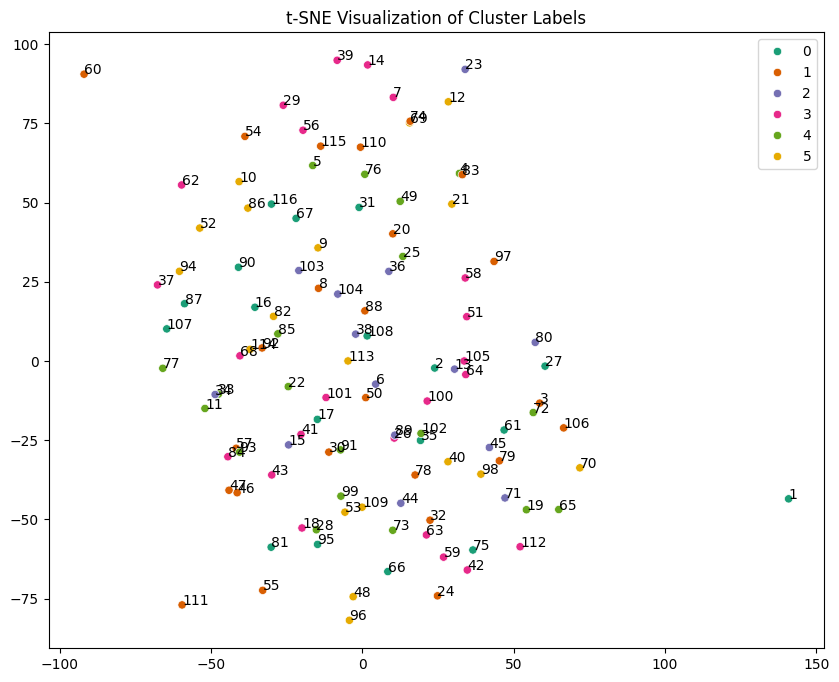

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(all_stats_array)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:,2], y=tsne_results[:, 1], hue=z, palette='Dark2')
plt.title('t-SNE Visualization of Cluster Labels')
for i in range(0,116):
    plt.annotate(i+1, (tsne_results[i, 2], tsne_results[i, 1]))
plt.show()

# True Labels

In [27]:
import io
import pandas as pd
import numpy as np
true_labels = pd.read_csv(io.StringIO('''
4
4
0
1
2
1
3
0
2
1
5
1
5
5
1
4
4
2
3
0
5
5
1
5
3
2
4
2
2
3
4
5
5
0
4
1
5
1
1
1
5
5
1
0
0
2
3
5
3
2
2
3
1
5
5
5
5
5
2
1
4
3
2
3
5
1
2
3
1
3
1
5
3
0
2
3
3
0
1
1
4
1
2
2
5
0
4
5
3
4
3
3
2
5
4
2
2
1
5
2
3
1
0
5
1
1
4
4
1
1
2
5
5
0
1
4
'''), header=None)

true_labels = np.array(true_labels[0].astype(int))
print(true_labels)

[4 4 0 1 2 1 3 0 2 1 5 1 5 5 1 4 4 2 3 0 5 5 1 5 3 2 4 2 2 3 4 5 5 0 4 1 5
 1 1 1 5 5 1 0 0 2 3 5 3 2 2 3 1 5 5 5 5 5 2 1 4 3 2 3 5 1 2 3 1 3 1 5 3 0
 2 3 3 0 1 1 4 1 2 2 5 0 4 5 3 4 3 3 2 5 4 2 2 1 5 2 3 1 0 5 1 1 4 4 1 1 2
 5 5 0 1 4]


# First Attempt, This attempt takes only Best Model and the predicts on it

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import glob
import os
from sklearn.decomposition import PCA
from tqdm import tqdm

def extract_mfcc_features(mfcc_data):
    """
    Extract statistical features from MFCC coefficients
    """
    features = []

    # Statistical features for each MFCC coefficient
    for i in range(20):  # 20 MFCC coefficients
        coef_data = mfcc_data.iloc[i]

        # Basic statistics
        mean = np.mean(coef_data)
        std = np.std(coef_data)
        minimum = np.min(coef_data)
        maximum = np.max(coef_data)

        # Quartiles and IQR
        q25 = np.percentile(coef_data, 25)
        q75 = np.percentile(coef_data, 75)
        iqr = q75 - q25

        # Shape statistics
        skewness = pd.Series(coef_data).skew()
        kurtosis = pd.Series(coef_data).kurtosis()

        # Zero crossing rate
        zero_crossings = np.sum(np.diff(np.signbit(coef_data).astype(int)) != 0)

        # RMS energy
        rms = np.sqrt(np.mean(np.square(coef_data)))

        song_len = len(df.axes[1])

        features.extend([
            mean, std, minimum, maximum,
            q25, q75, iqr,
            skewness, kurtosis,
            zero_crossings, rms, song_len
        ])

    return features

def create_feature_names():
    """
    Create feature names for the extracted features
    """
    base_features = [
        'mean', 'std', 'min', 'max',
        'q25', 'q75', 'iqr',
        'skewness', 'kurtosis',
        'zero_crossings', 'rms'
    ]

    feature_names = []
    for i in range(20):
        feature_names.extend([f'mfcc{i+1}_{feat}' for feat in base_features])

    features_names.extend(['song_length'])

    return feature_names

def load_and_process_data(csv_path, mode='test'):
    """
    Load and process a single MFCC CSV file
    """
    try:
        if mode == 'train':
          mfcc_data = pd.read_csv(csv_path)
        else:
          mfcc_data = pd.read_csv(csv_path, header=None)
        features = extract_mfcc_features(mfcc_data)
        return features
    except Exception as e:
        print(f"Error processing {csv_path}: {str(e)}")
        return None

In [29]:
def prepare_training_data(metadata_csv):
    """
    Prepare training data from metadata CSV
    """
    # Read metadata
    metadata = pd.read_csv(metadata_csv)

    # Process each file and extract features
    X = []
    y = []

    for idx, row in tqdm(metadata.iterrows(), total=len(metadata)):
        features = load_and_process_data('DS203-Project/' + row['pathname'], 'train')
        if features is not None:
            X.append(features)
            y.append(row['label'])

    # feature_names = create_feature_names()
    X = pd.DataFrame(X)

    return X, y

def train_and_evaluate_models(X, y):
    """
    Train and evaluate multiple classification models
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # pca = PCA(n_components=0.95)
    # X_train_scaled = pca.fit_transform(X_train_scaled)
    X_test_scaled = scaler.transform(X_test)


    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42),
        'LogisticRegression': LogisticRegression(random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }

    best_model = None
    best_score = 0

    # Train and evaluate each model
    for name, model in tqdm(models.items()):
        print(f"\nTraining {name}...\n")

        # Train the model
        model.fit(X_train_scaled, y_train)

        # Cross-validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
        print(f"Cross-validation scores: {cv_scores}")
        print(f"Average CV score: {cv_scores.mean():.4f}")

        # Test set evaluation
        y_pred = model.predict(X_test_scaled)
        score = model.score(X_test_scaled, y_test)
        print(f"Test set accuracy: {score:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Update best model if necessary
        if score > best_score:
            best_score = score
            best_model = (name, model, scaler)

        create_tsne_visualization(X_test_scaled, y_pred, y_test)


    return best_model

def predict_new_files(model, scaler, input_folder):
    """
    Predict categories for new files
    """
    predictions = {}
    X_scaled = []

    # Get all MFCC CSV files in the input folder
    mfcc_files = glob.glob(os.path.join(input_folder, "*-MFCC.csv"))
    mfcc_files = sorted(mfcc_files, key=lambda x: int(x.split('/')[-1].split('-')[0]))

    # Process each file and extract features
    X = []
    # y = []

    for file_path in tqdm(mfcc_files):
        features = load_and_process_data(file_path)
        if features is not None:
            X.append(features)

    # feature_names = create_feature_names()
    # X = pd.DataFrame(X, columns=feature_names)
    X = pd.DataFrame(X)

    X_scaled = scaler.transform(X)

    predictions = model.predict(X_scaled)
    file_names = [os.path.basename(file_path) for file_path in mfcc_files]

    create_tsne_visualization(X_scaled, predictions, true_labels)

    # Create a dictionary with file names as keys and predicted categories as values
    predictions = {file_name: category for file_name, category in zip(file_names, predictions)}

    return predictions

In [30]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


def create_tsne_visualization(features, predicted_labels, true_labels=None, perplexity=30):
    """
    Create t-SNE visualization of the features, colored by predicted and true labels

    Parameters:
    features: numpy array of features
    predicted_labels: array of predicted labels
    true_labels: array of true labels (optional)
    perplexity: perplexity parameter for t-SNE
    """
    perplexity = 30 if len(features)>300 else 10
    # Create t-SNE embedding
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(features)

    # Create color palette
    colors = sns.color_palette("husl", 6)

    # Set up the figure
    if true_labels is not None:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    else:
        fig, ax1 = plt.subplots(figsize=(10, 8))

    # Plot predicted labels
    scatter1 = ax1.scatter(tsne_results[:, 0], tsne_results[:, 1],
                          c=[colors[int(label)] for label in predicted_labels],
                          alpha=0.6)
    ax1.set_title('Predicted Labels')

    # Create legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                 markerfacecolor=colors[i], label=label, markersize=10)
                      for i, label in enumerate(['Michael Jackson', 'Asha Bhosle',
                                              'Kishore Kumar', 'Lavni',
                                              'National Anthem', 'Bhav Geet'])]
    ax1.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    # If true labels are provided, create second plot
    if true_labels is not None:
        scatter2 = ax2.scatter(tsne_results[:, 0], tsne_results[:, 1],
                             c=[colors[int(label)] for label in true_labels],
                             alpha=0.6)
        ax2.set_title('True Labels')
        ax2.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()

def evaluate_predictions(true_labels, predicted_labels):
    """
    Evaluate the predictions against true labels
    """
    # Convert labels to strings if they aren't already
    true_labels = [str(label) for label in true_labels]
    predicted_labels = [str(label) for label in predicted_labels]

    # Calculate and print accuracy
    accuracy = np.mean(np.array(true_labels) == np.array(predicted_labels))
    print(f"Overall Accuracy: {accuracy:.4f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels,
                              target_names=['Michael Jackson', 'Asha Bhosle',
                                          'Kishore Kumar', 'Lavni',
                                          'National Anthem', 'Bhav Geet']))

    # Create confusion matrix visualization
    plt.figure(figsize=(10, 8))
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['MJ', 'AB', 'KK', 'Lavni', 'NA', 'BG'],
                yticklabels=['MJ', 'AB', 'KK', 'Lavni', 'NA', 'BG'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Loading and processing training data...


100%|██████████| 127/127 [01:31<00:00,  1.39it/s]



Training and evaluating models...


  0%|          | 0/5 [00:00<?, ?it/s]


Training Random Forest...

Cross-validation scores: [0.81818182 0.81818182 0.68181818 0.80952381 0.66666667]
Average CV score: 0.7589
Test set accuracy: 0.5769

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.20      0.50      0.29         2
           2       0.75      0.75      0.75         4
           3       0.33      0.20      0.25         5
           4       0.60      0.75      0.67         4
           5       0.50      0.40      0.44         5

    accuracy                           0.58        26
   macro avg       0.56      0.57      0.55        26
weighted avg       0.61      0.58      0.58        26



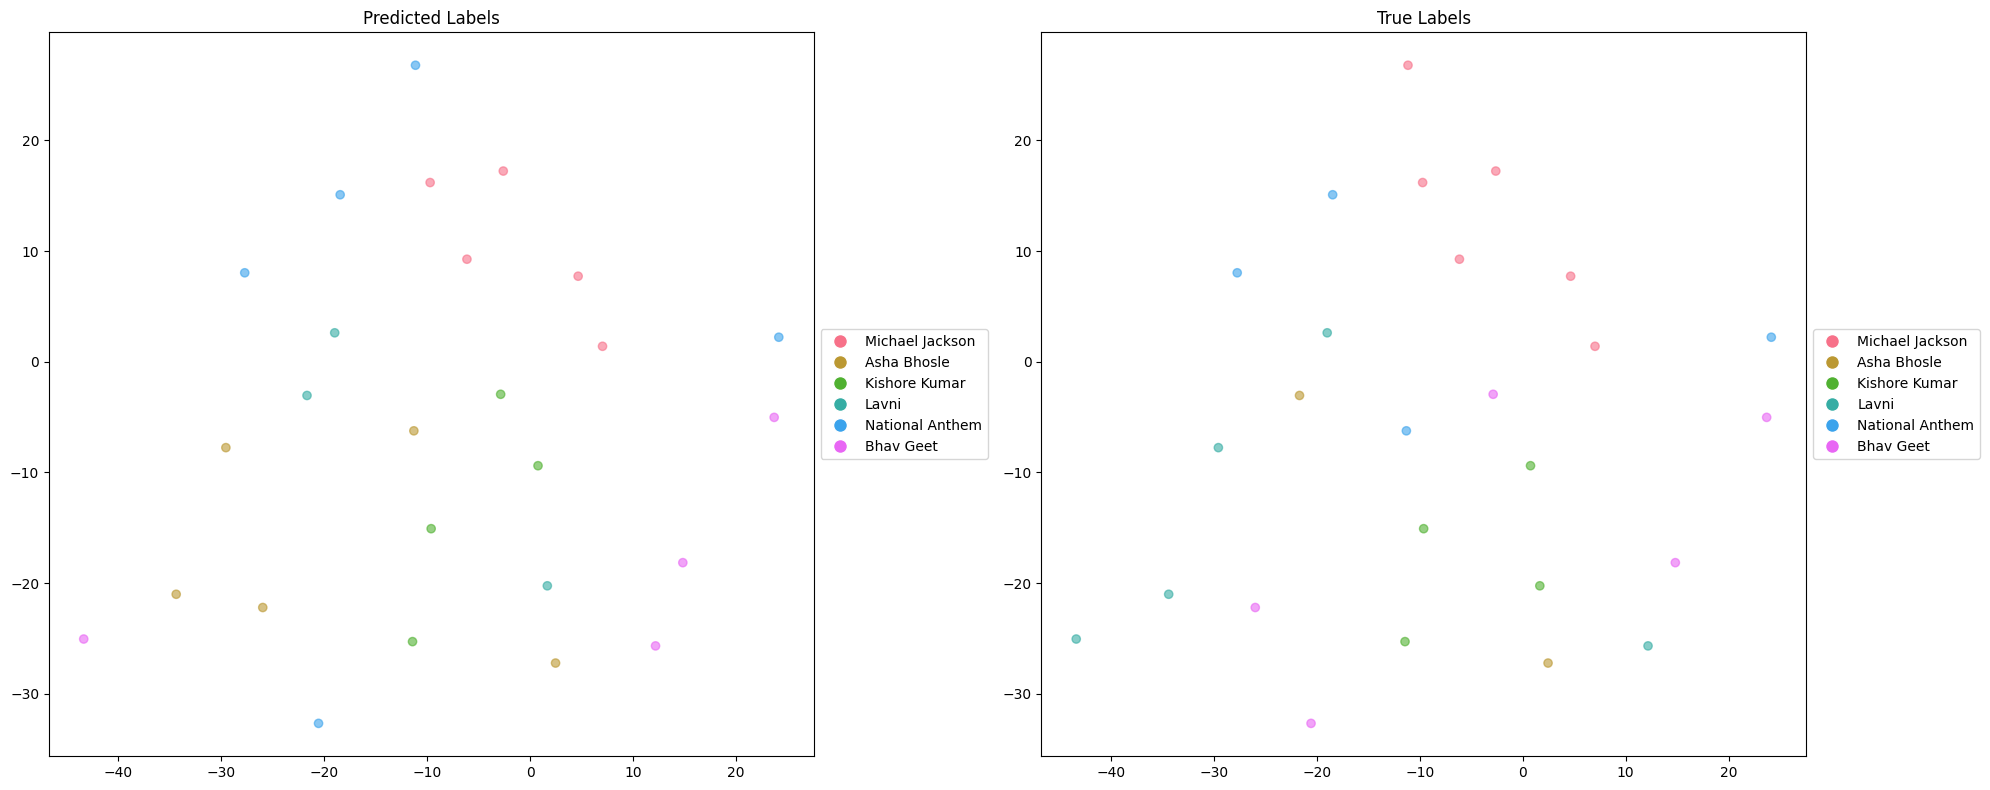

 20%|██        | 1/5 [00:02<00:11,  2.86s/it]


Training Gradient Boosting...

Cross-validation scores: [0.68181818 0.72727273 0.5        0.76190476 0.66666667]
Average CV score: 0.6675
Test set accuracy: 0.5385

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.00      0.00      0.00         2
           2       0.75      0.75      0.75         4
           3       0.43      0.60      0.50         5
           4       0.75      0.75      0.75         4
           5       0.43      0.60      0.50         5

    accuracy                           0.54        26
   macro avg       0.56      0.51      0.50        26
weighted avg       0.63      0.54      0.54        26



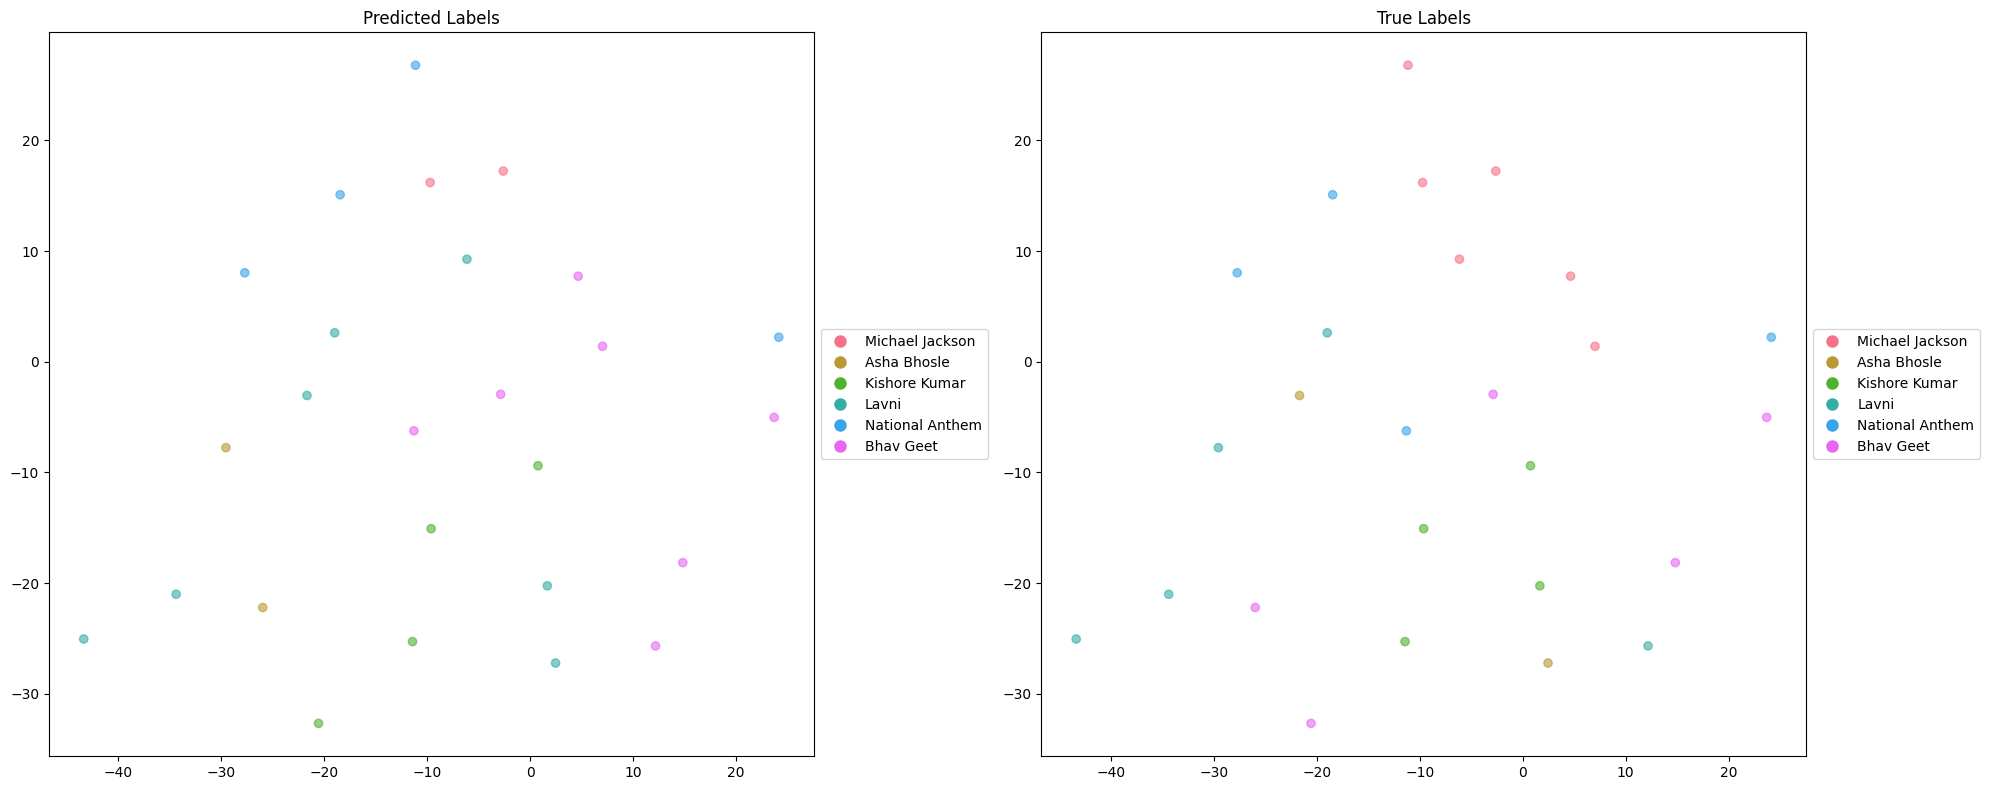

 40%|████      | 2/5 [00:35<01:01, 20.54s/it]


Training SVM...

Cross-validation scores: [0.86363636 0.72727273 0.59090909 0.71428571 0.71428571]
Average CV score: 0.7221
Test set accuracy: 0.6154

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.17      0.50      0.25         2
           2       0.60      0.75      0.67         4
           3       0.50      0.20      0.29         5
           4       0.67      1.00      0.80         4
           5       1.00      0.40      0.57         5

    accuracy                           0.62        26
   macro avg       0.66      0.61      0.58        26
weighted avg       0.73      0.62      0.62        26



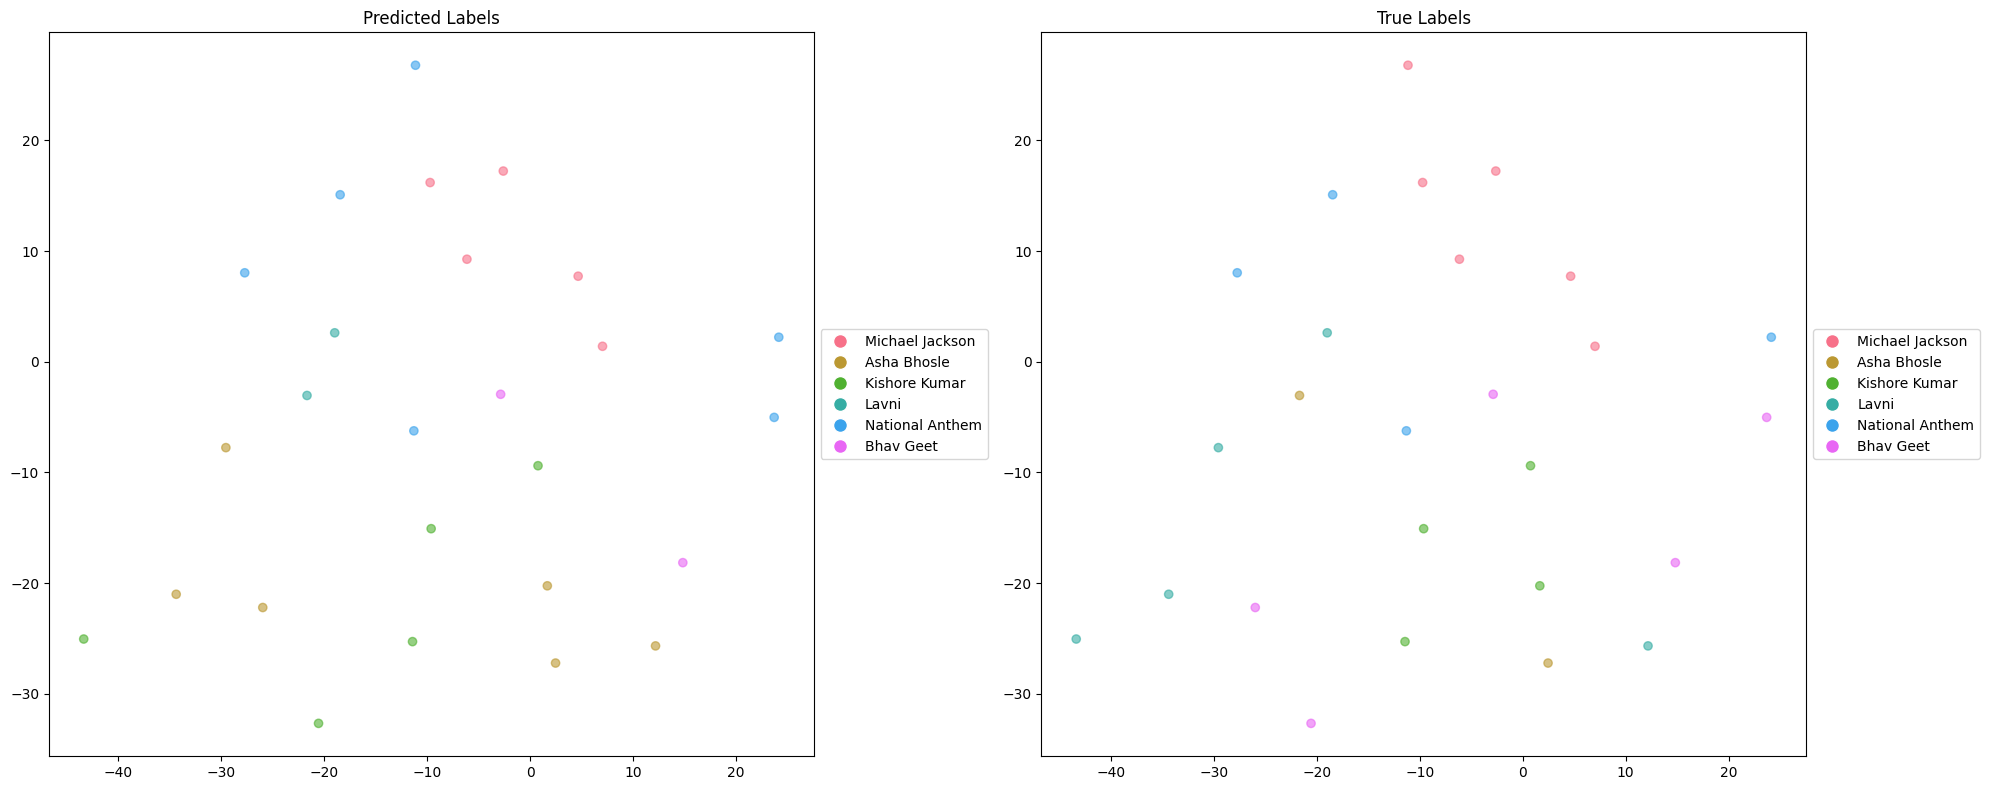

 60%|██████    | 3/5 [00:36<00:23, 11.54s/it]


Training LogisticRegression...

Cross-validation scores: [0.90909091 0.68181818 0.54545455 0.85714286 0.80952381]
Average CV score: 0.7606
Test set accuracy: 0.7692

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.25      0.50      0.33         2
           2       0.75      0.75      0.75         4
           3       0.60      0.60      0.60         5
           4       1.00      1.00      1.00         4
           5       1.00      0.60      0.75         5

    accuracy                           0.77        26
   macro avg       0.77      0.74      0.74        26
weighted avg       0.83      0.77      0.79        26



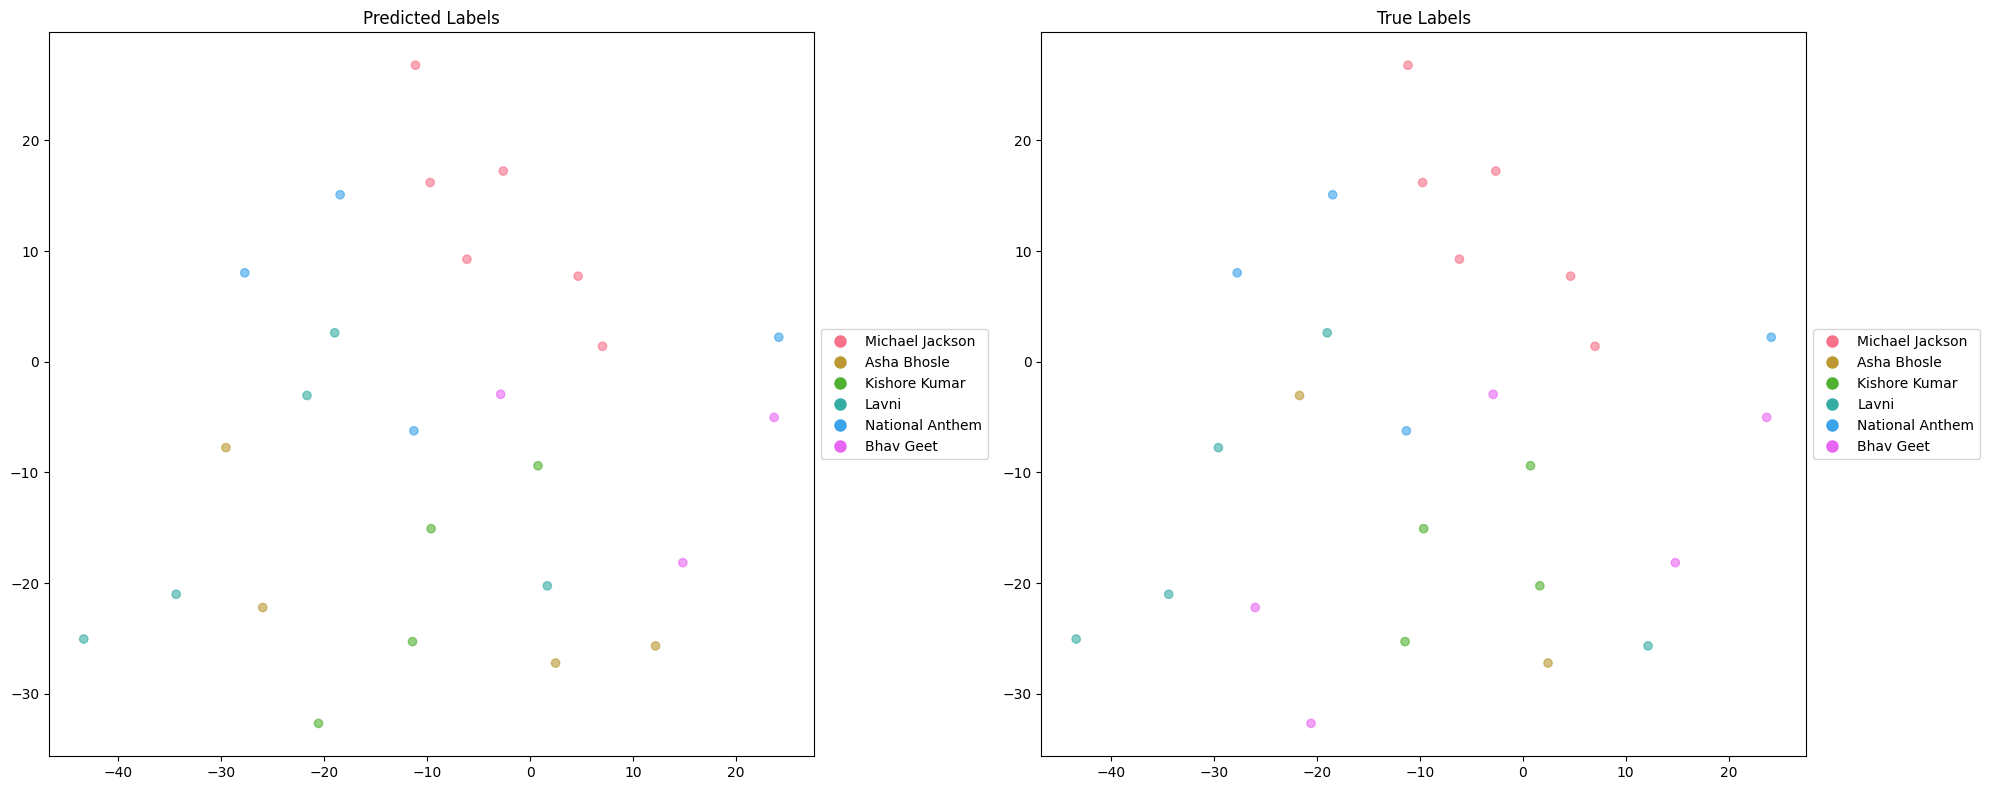

 80%|████████  | 4/5 [00:37<00:07,  7.33s/it]


Training KNN...

Cross-validation scores: [0.86363636 0.54545455 0.36363636 0.57142857 0.38095238]
Average CV score: 0.5450
Test set accuracy: 0.6538

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.20      0.50      0.29         2
           2       0.75      0.75      0.75         4
           3       0.50      0.60      0.55         5
           4       1.00      0.25      0.40         4
           5       1.00      0.60      0.75         5

    accuracy                           0.65        26
   macro avg       0.72      0.62      0.61        26
weighted avg       0.77      0.65      0.66        26



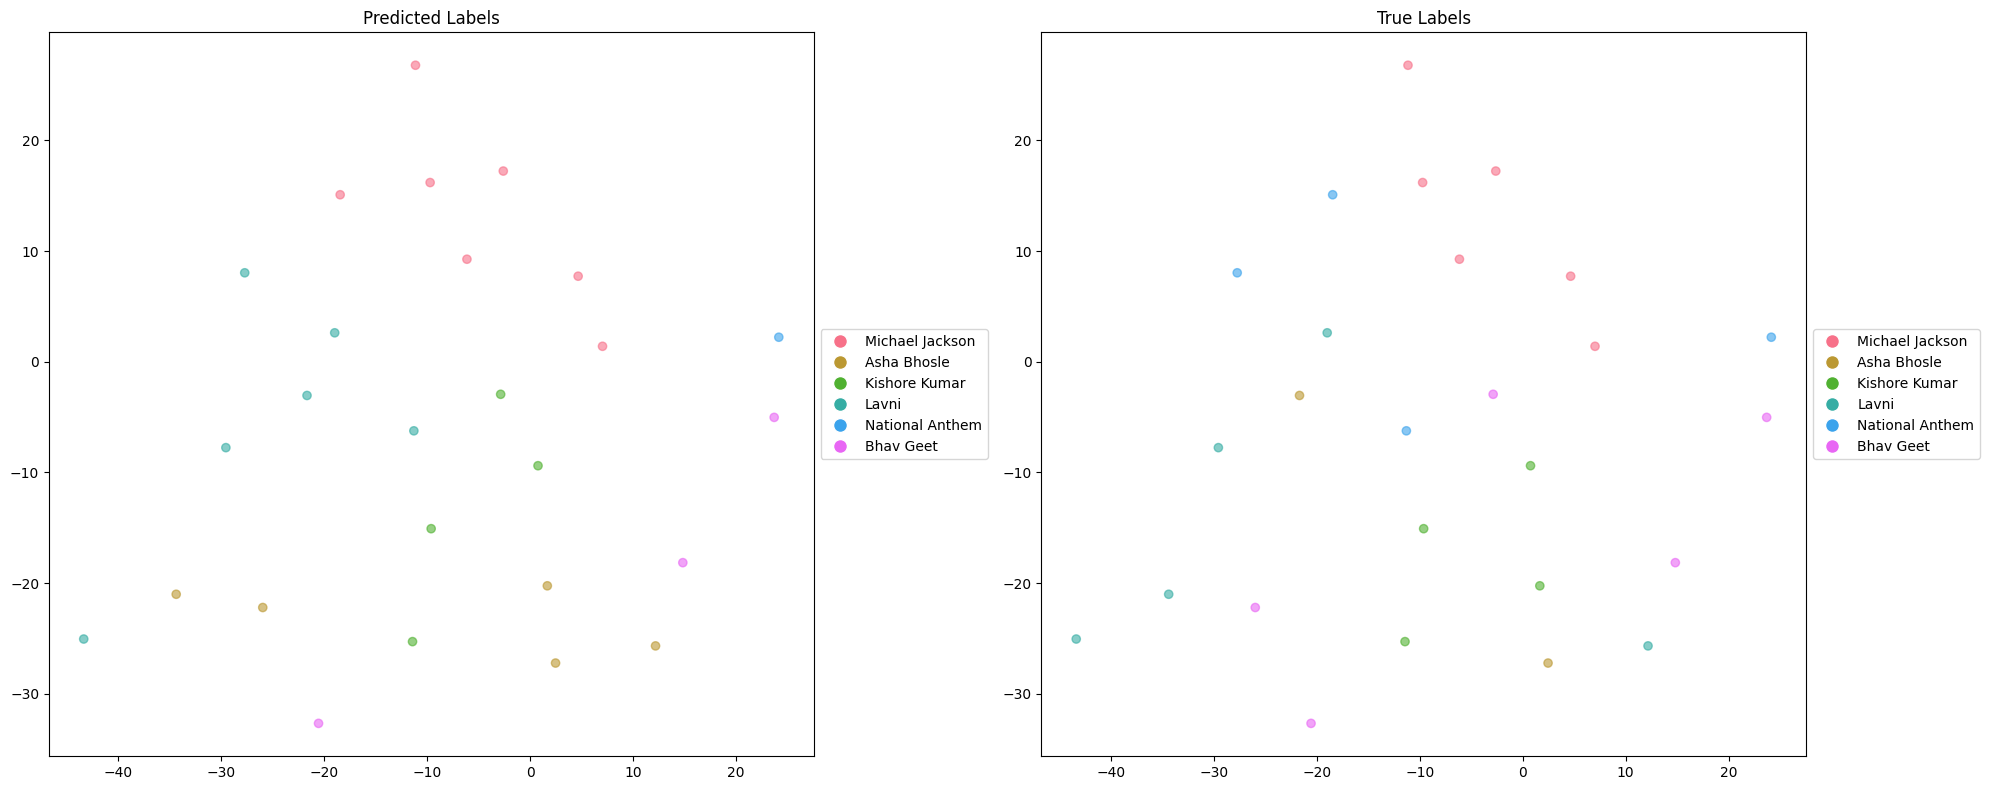

100%|██████████| 5/5 [00:38<00:00,  7.66s/it]



Best model: LogisticRegression

Making predictions on new files...


100%|██████████| 116/116 [01:29<00:00,  1.30it/s]


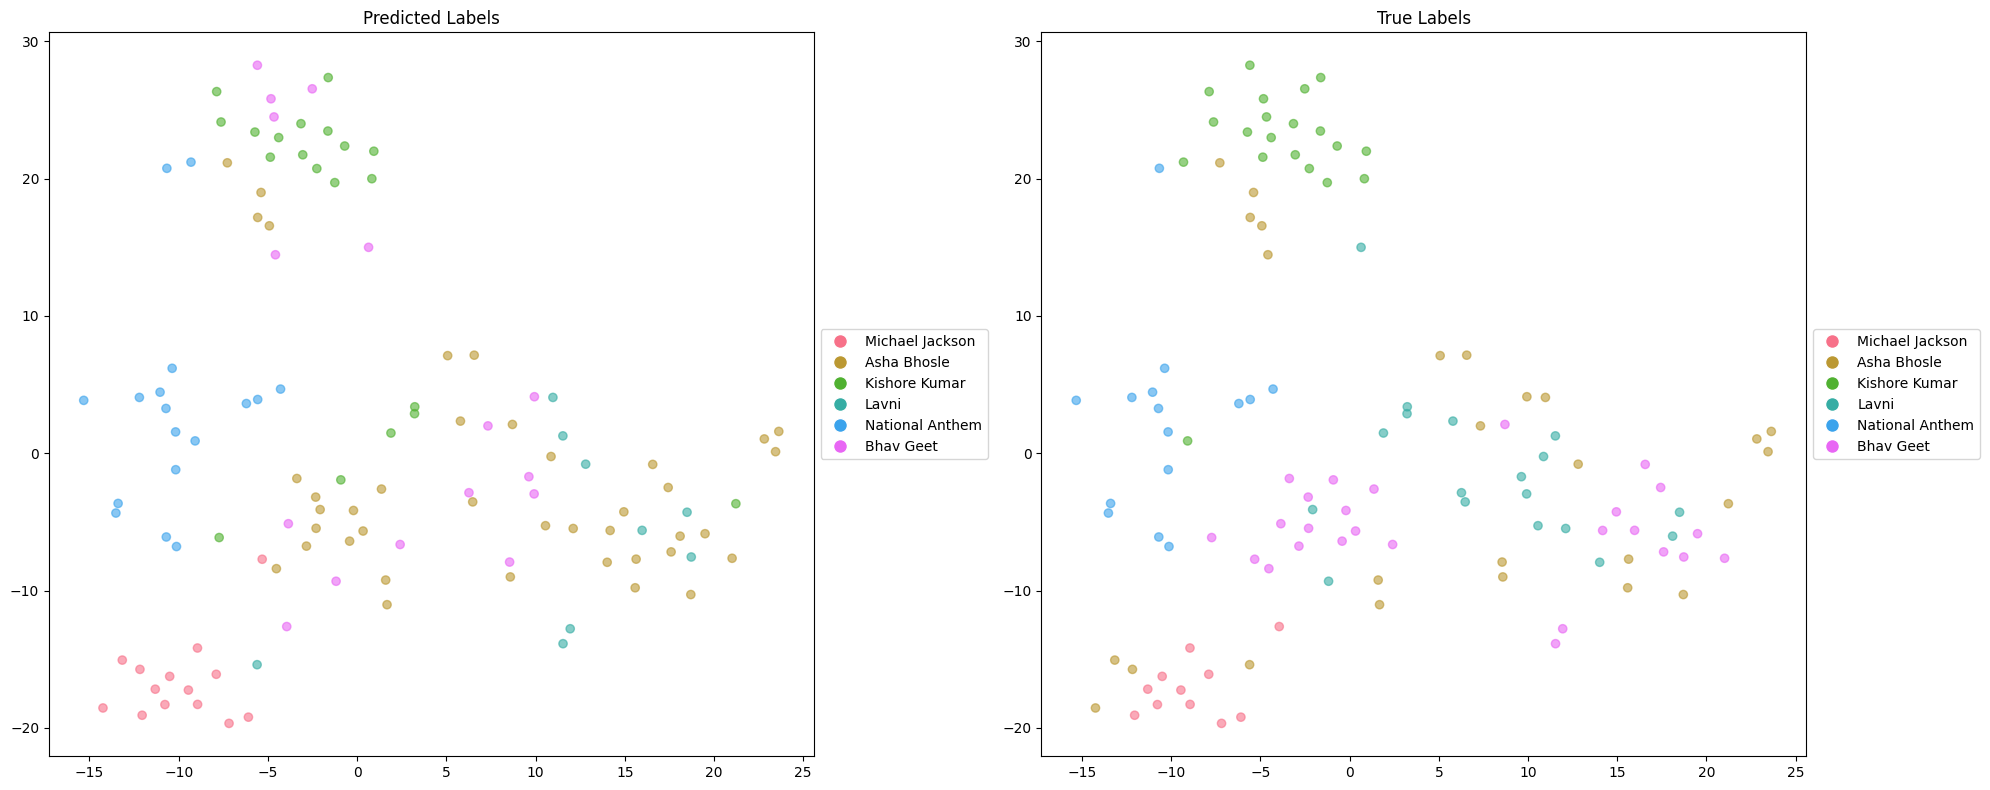

Overall Accuracy: 0.5000

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       0.71      0.91      0.80        11
    Asha Bhosle       0.38      0.58      0.45        26
  Kishore Kumar       0.70      0.70      0.70        20
          Lavni       0.22      0.11      0.15        18
National Anthem       0.88      1.00      0.94        15
      Bhav Geet       0.12      0.08      0.10        26

       accuracy                           0.50       116
      macro avg       0.50      0.56      0.52       116
   weighted avg       0.45      0.50      0.46       116



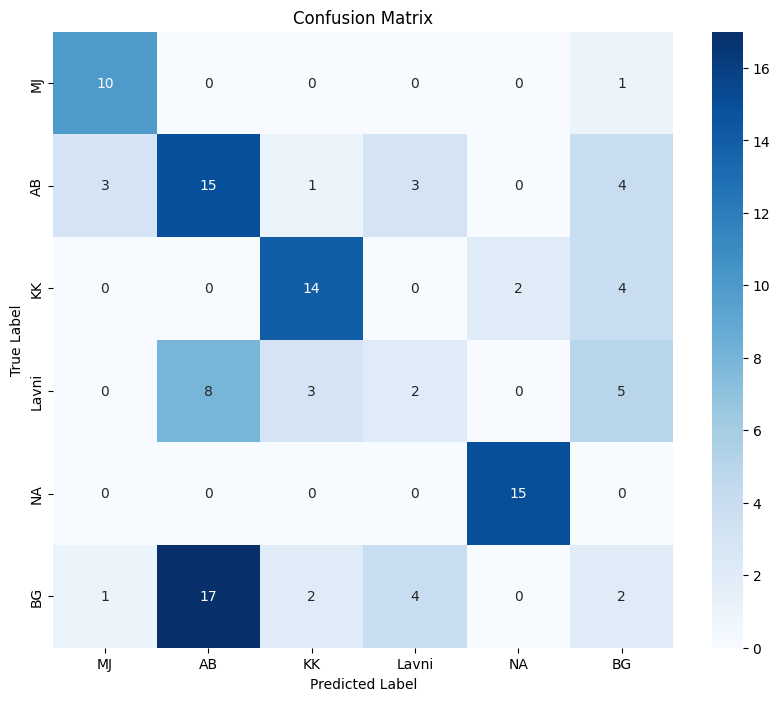

In [31]:

# Main execution function
def main(metadata_csv, prediction_folder):
    """
    Main execution function
    """
    print("Loading and processing training data...")
    X, y = prepare_training_data(metadata_csv)

    print("\nTraining and evaluating models...")
    best_model_name, best_model, scaler = train_and_evaluate_models(X, y)

    print(f"\nBest model: {best_model_name}")

    print("\nMaking predictions on new files...")
    predictions = predict_new_files(best_model, scaler, prediction_folder)

    # # Save predictions to CSV
    predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=['predicted_category'])
    predictions_df.index.name = 'file_name'
    # predictions_df.to_csv('predictions.csv')

    # print("\nPredictions have been saved to 'predictions.csv'")

    # For visualization

    predicted_labels = predictions_df['predicted_category'].values

    # For evaluation
    evaluate_predictions(true_labels, predicted_labels)
    return predictions_df


# Usage example:
if __name__ == "__main__":
    metadata_csv = "DS203-Project/songs/songs_summary.csv"  # CSV with training data paths and labels
    prediction_folder = "DS203-Project/MFCC-files-v2"  # Folder containing files to predict
    predictions = main(metadata_csv, prediction_folder)


# Attempt 2, Taking output of all models and then looking at which is the best

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import glob
import os
from sklearn.decomposition import PCA
from tqdm import tqdm

# weights = [1,1,1,1,1,1.2,1.2,1.2,1.2,1.2,1.4,1.4,1.4,1.4,1.4,1.7,1.7,1.7,2,2]
def extract_mfcc_features(mfcc_data):
    """
    Extract statistical features from MFCC coefficients
    """
    features = []
    starting_position = np.random.randint(mfcc_data.shape[1] - 2580)
    # mfcc_data = mfcc_data[:, starting_position:starting_position+2580]
    # Statistical features for each MFCC coefficient
    # weights = np.array([1,1,1,1,1,1.2,1.2,1.2,1.2,1.2,1.4,1.4,1.4,1.4,1.4,1.7,1.7,1.7,2,2])
    mfcc_data = mfcc_data
    for i in range(20):  # 20 MFCC coefficients
        coef_data = mfcc_data[i][2000:(len(mfcc_data[i])-2580)]
        # coef_data = coef_data * weights[i]
        # Basic statistics
        mean = np.mean(coef_data)
        std = np.std(coef_data)
        minimum = np.min(coef_data)
        maximum = np.max(coef_data)

        # Quartiles and IQR
        q25 = np.percentile(coef_data, 25)
        q75 = np.percentile(coef_data, 75)
        iqr = q75 - q25

        # # Spectral Entropy
        # hist, _ = np.histogram(coef_data, bins=10, density=True)  # Adjust bins as needed
        # spectral_entropy_value = entropy(hist + 1e-10)  # Add small value to avoid log(0)

        # Shape statistics
        skewness = pd.Series(coef_data).skew()
        kurtosis = pd.Series(coef_data).kurtosis()

        # Zero crossing rate
        zero_crossings = np.sum(np.diff(np.signbit(coef_data).astype(int)) != 0)

        # RMS energy
        rms = np.sqrt(np.mean(np.square(coef_data)))


        features.extend([
            mean, std, minimum, maximum,
            q25, q75, iqr,
            skewness, kurtosis,
            zero_crossings, rms
        ])

    # song_len = mfcc_data.shape[1]
    # features.append(song_len)

    return features

def create_feature_names():
    """
    Create feature names for the extracted features
    """
    base_features = [
        'mean', 'std', 'min', 'max',
        'q25', 'q75', 'iqr',
        'skewness', 'kurtosis',
        'zero_crossings', 'rms'
    ]

    feature_names = []
    for i in range(20):
        feature_names.extend([f'mfcc{i+1}_{feat}' for feat in base_features])
    feature_names.append('song_length')

    return feature_names

def load_and_process_data(csv_path, mode='test'):
    """
    Load and process a single MFCC CSV file
    """
    try:
        if mode == 'train':
          mfcc_data = np.loadtxt(csv_path, delimiter = ',', skiprows=1)
        else:
          mfcc_data = np.loadtxt(csv_path, delimiter=',')
        # features = extract_mfcc_features(mfcc_data)
        features = extract_new_features(mfcc_data)
        return features
    except Exception as e:
        print(f"Error processing {csv_path}: {str(e)}")
        return None

In [47]:
def prepare_training_data(metadata_csv):
    """
    Prepare training data from metadata CSV
    """
    # Read metadata
    metadata = pd.read_csv(metadata_csv)

    # Process each file and extract features
    X = []
    y = []

    for idx, row in tqdm(metadata.iterrows(), total=len(metadata)):
        features = load_and_process_data('DS203-Project/' + row['pathname'], 'train')
        if features is not None:
            X.append(features)
            y.append(row['label'])

    # feature_names = create_feature_names()
    # X = pd.DataFrame(X, columns=feature_names)
    X = pd.DataFrame(X)

    return X, y

def train_and_evaluate_models(X, y):
    """
    Train and evaluate multiple classification models
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Handle class imbalance using SMOTE
    # smote = SMOTE(random_state=42)
    # X_train, y_train = smote.fit_resample(X_train, y_train)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # pca = PCA(n_components=0.95)
    # X_train_scaled = pca.fit_transform(X_train_scaled)
    X_test_scaled = scaler.transform(X_test)


    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42),
        'LogisticRegression': LogisticRegression(random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=6),
        'XGB': XGBClassifier(random_state=42)
    }

    best_model = None
    best_score = 0

    fitted_models = {}

    # Train and evaluate each model
    for name, model in tqdm(models.items()):
        print(f"\nTraining {name}...\n")

        # Train the model
        model.fit(X_train_scaled, y_train)

        # Cross-validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
        print(f"Cross-validation scores: {cv_scores}")
        print(f"Average CV score: {cv_scores.mean():.4f}")

        # Test set evaluation
        y_pred = model.predict(X_test_scaled)
        score = model.score(X_test_scaled, y_test)
        print(f"Test set accuracy: {score:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        fitted_models[name] = (name, model, scaler)
        # Update best model if necessary
        if score > best_score:
            best_score = score
            best_model = (name, model, scaler)

        create_tsne_visualization(X_test_scaled, y_pred, y_test)

    return fitted_models

def load_predicting_files(input_folder):
    X_scaled = []

    # Get all MFCC CSV files in the input folder
    mfcc_files = glob.glob(os.path.join(input_folder, "*-MFCC.csv"))
    mfcc_files = sorted(mfcc_files, key=lambda x: int(x.split('/')[-1].split('-')[0]))

    # Process each file and extract features
    X = []
    # y = []

    for file_path in tqdm(mfcc_files):
        features = load_and_process_data(file_path)
        if features is not None:
            X.append(features)

    # feature_names = create_feature_names()
    # X = pd.DataFrame(X, columns=feature_names)
    X = pd.DataFrame(X)

    return X, mfcc_files

def predict_new_files(model, scaler, X, mfcc_files):
    """
    Predict categories for new files
    """
    X_scaled = scaler.transform(X)
    predictions = {}
    # X_scaled = []

    predictions = model.predict(X_scaled)
    file_names = [os.path.basename(file_path) for file_path in mfcc_files]

    create_tsne_visualization(X_scaled, predictions, true_labels)

    # Create a dictionary with file names as keys and predicted categories as values
    predictions = {file_name: category for file_name, category in zip(file_names, predictions)}

    return predictions

In [57]:
from scipy.stats import entropy
from scipy.signal import find_peaks

def extract_new_features(mfcc_data):
    """
    Extract statistical features from MFCC coefficients

    """

    # Initialize lists to store the computed features for each coefficient
    means = []
    variances = []
    ranges = []
    spectral_entropies = []
    zcrs = []
    third_moment = []
    peak_frequencies = []
    qrs = []

    # Calculate features for each MFCC coefficient
    for i in range(20):
        # Extract the i-th MFCC coefficient across all frames
        coeff_data = mfcc_data[i][2000:(len(mfcc_data[i])-2580)]

        # Mean
        mean_value = np.mean(coeff_data)
        means.append(mean_value)

        # Variance
        variance_value = np.var(coeff_data)
        variances.append(variance_value)

        # q25 = np.percentile(coeff_data, 25)
        # q75 = np.percentile(coeff_data, 75)

        # qrs.append(q75)
        # qrs.append(q25)

        # Range (max - min)
        range_value = np.ptp(coeff_data)  # ptp gives the range of values
        ranges.append(range_value)

        # Spectral Entropy
        hist, _ = np.histogram(coeff_data, bins=10, density=True)  # Adjust bins as needed
        spectral_entropy_value = entropy(hist + 1e-10)  # Add small value to avoid log(0)
        spectral_entropies.append(spectral_entropy_value)

        # Zero-Crossing Rate (ZCR)
        zcr_value = np.mean(np.diff(np.sign(coeff_data)) != 0)
        zcrs.append(zcr_value)

        # Peak Frequency (index of max peak in the coefficient data)
        peaks, _ = find_peaks(coeff_data)
        if len(peaks) > 0:
            peak_freq = peaks[np.argmax(coeff_data[peaks])]
        else:
            peak_freq = np.nan  # No peak found
        peak_frequencies.append(peak_freq)
    song_length = mfcc_data.shape[1]
    # features = np.concatenate([means, variances, ranges, skew, kurtosis, zcrs, rms, [song_length]])
    features = np.concatenate([means, variances, ranges, spectral_entropies, third_moment, zcrs, peak_frequencies])

    return features

In [58]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


def create_tsne_visualization(features, predicted_labels, true_labels=None, perplexity=30):
    """
    Create t-SNE visualization of the features, colored by predicted and true labels

    Parameters:
    features: numpy array of features
    predicted_labels: array of predicted labels
    true_labels: array of true labels (optional)
    perplexity: perplexity parameter for t-SNE
    """
    perplexity = 30 if len(features)>30 else 10
    # Create t-SNE embedding
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(features)

    # Create color palette
    colors = sns.color_palette("husl", 6)

    # Set up the figure
    if true_labels is not None:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    else:
        fig, ax1 = plt.subplots(figsize=(10, 8))

    # Plot predicted labels
    scatter1 = ax1.scatter(tsne_results[:, 0], tsne_results[:, 1],
                          c=[colors[int(label)] for label in predicted_labels],
                          alpha=0.6)
    ax1.set_title('Predicted Labels')

    # Create legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                 markerfacecolor=colors[i], label=label, markersize=10)
                      for i, label in enumerate(['Michael Jackson', 'Asha Bhosle',
                                              'Kishore Kumar', 'Lavni',
                                              'National Anthem', 'Bhav Geet'])]
    ax1.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    # If true labels are provided, create second plot
    if true_labels is not None:
        scatter2 = ax2.scatter(tsne_results[:, 0], tsne_results[:, 1],
                             c=[colors[int(label)] for label in true_labels],
                             alpha=0.6)
        ax2.set_title('True Labels')
        ax2.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    for i, point in enumerate(tsne_results):
        ax1.annotate(i+1, (point[0], point[1]))
        if true_labels is not None:
            ax2.annotate(i+1, (point[0], point[1]))

    plt.tight_layout()
    plt.show()

def evaluate_predictions(true_labels, predicted_labels):
    """
    Evaluate the predictions against true labels
    """
    # Convert labels to strings if they aren't already
    true_labels = [str(label) for label in true_labels]
    predicted_labels = [str(label) for label in predicted_labels]

    # Calculate and print accuracy
    accuracy = np.mean(np.array(true_labels) == np.array(predicted_labels))
    print(f"Overall Accuracy: {accuracy:.4f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels,
                              target_names=['Michael Jackson', 'Asha Bhosle',
                                          'Kishore Kumar', 'Lavni',
                                          'National Anthem', 'Bhav Geet']))

    # Create confusion matrix visualization
    plt.figure(figsize=(10, 8))
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['MJ', 'AB', 'KK', 'Lavni', 'NA', 'BG'],
                yticklabels=['MJ', 'AB', 'KK', 'Lavni', 'NA', 'BG'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Loading and processing training data...


100%|██████████| 127/127 [00:11<00:00, 10.66it/s]



Training and evaluating models...


  0%|          | 0/6 [00:00<?, ?it/s]


Training Random Forest...

Cross-validation scores: [0.76190476 0.8        0.8        0.85       0.55      ]
Average CV score: 0.7524
Test set accuracy: 0.6538

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.20      0.50      0.29         2
           2       1.00      0.75      0.86         4
           3       0.33      0.20      0.25         5
           4       0.75      0.75      0.75         4
           5       0.67      0.80      0.73         5

    accuracy                           0.65        26
   macro avg       0.66      0.64      0.63        26
weighted avg       0.71      0.65      0.67        26



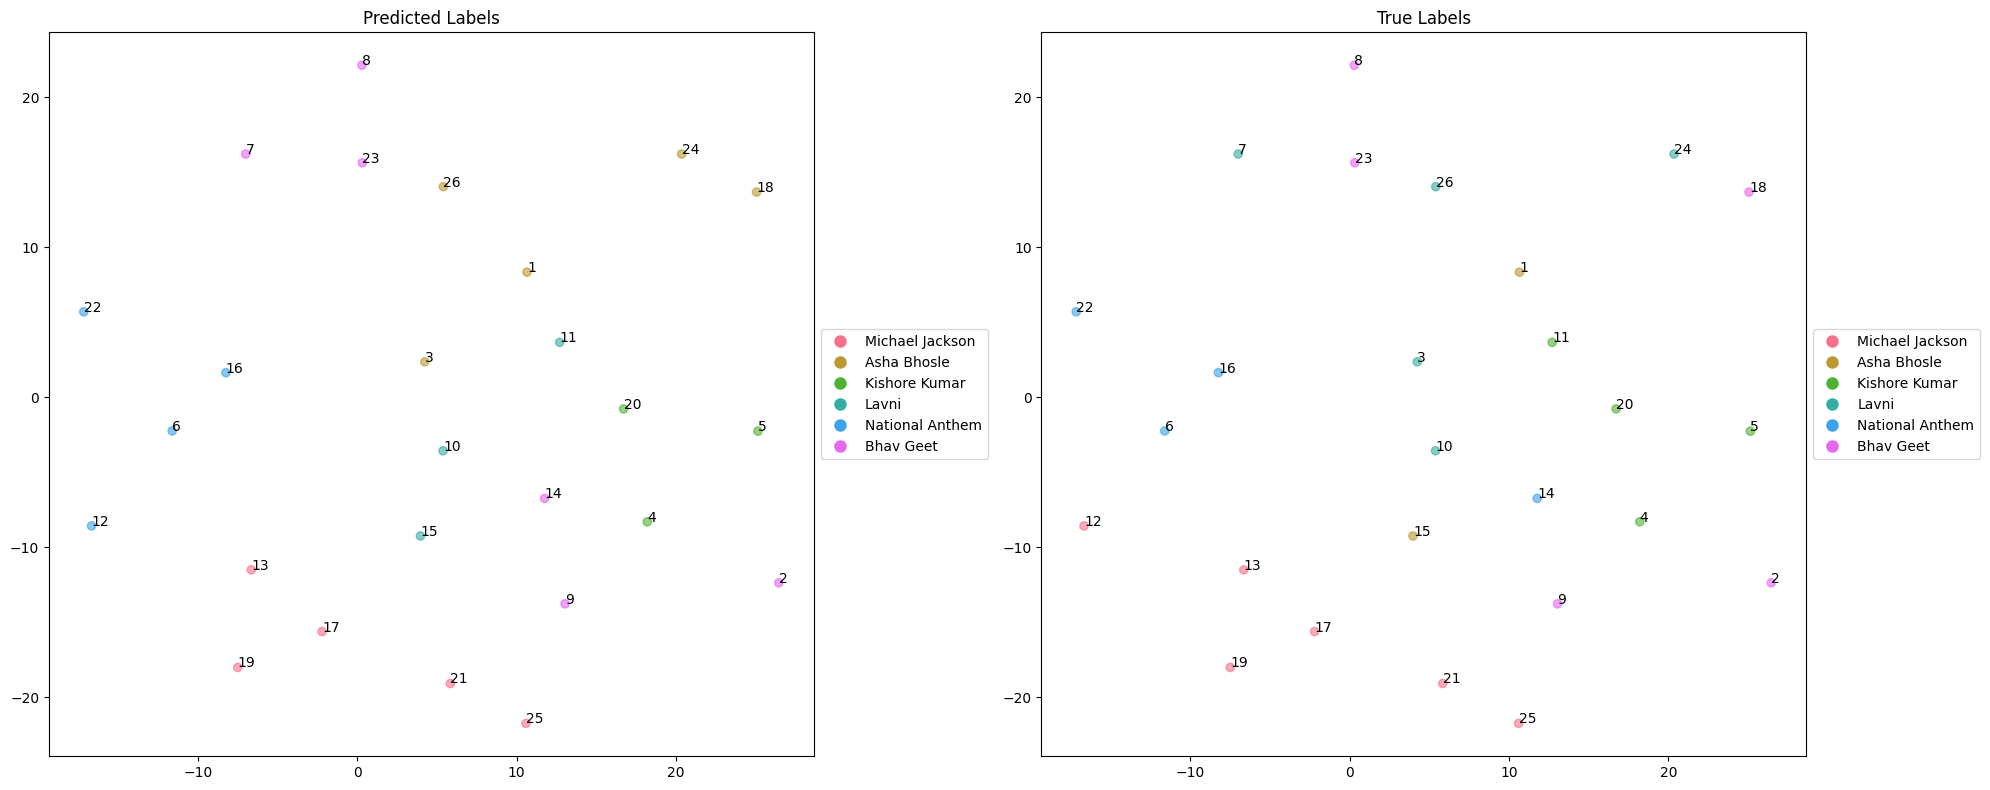

 17%|█▋        | 1/6 [00:02<00:10,  2.04s/it]


Training Gradient Boosting...

Cross-validation scores: [0.66666667 0.65       0.5        0.55       0.4       ]
Average CV score: 0.5533
Test set accuracy: 0.5385

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.20      0.50      0.29         2
           2       0.75      0.75      0.75         4
           3       0.25      0.20      0.22         5
           4       0.75      0.75      0.75         4
           5       0.57      0.80      0.67         5

    accuracy                           0.54        26
   macro avg       0.59      0.56      0.53        26
weighted avg       0.63      0.54      0.54        26



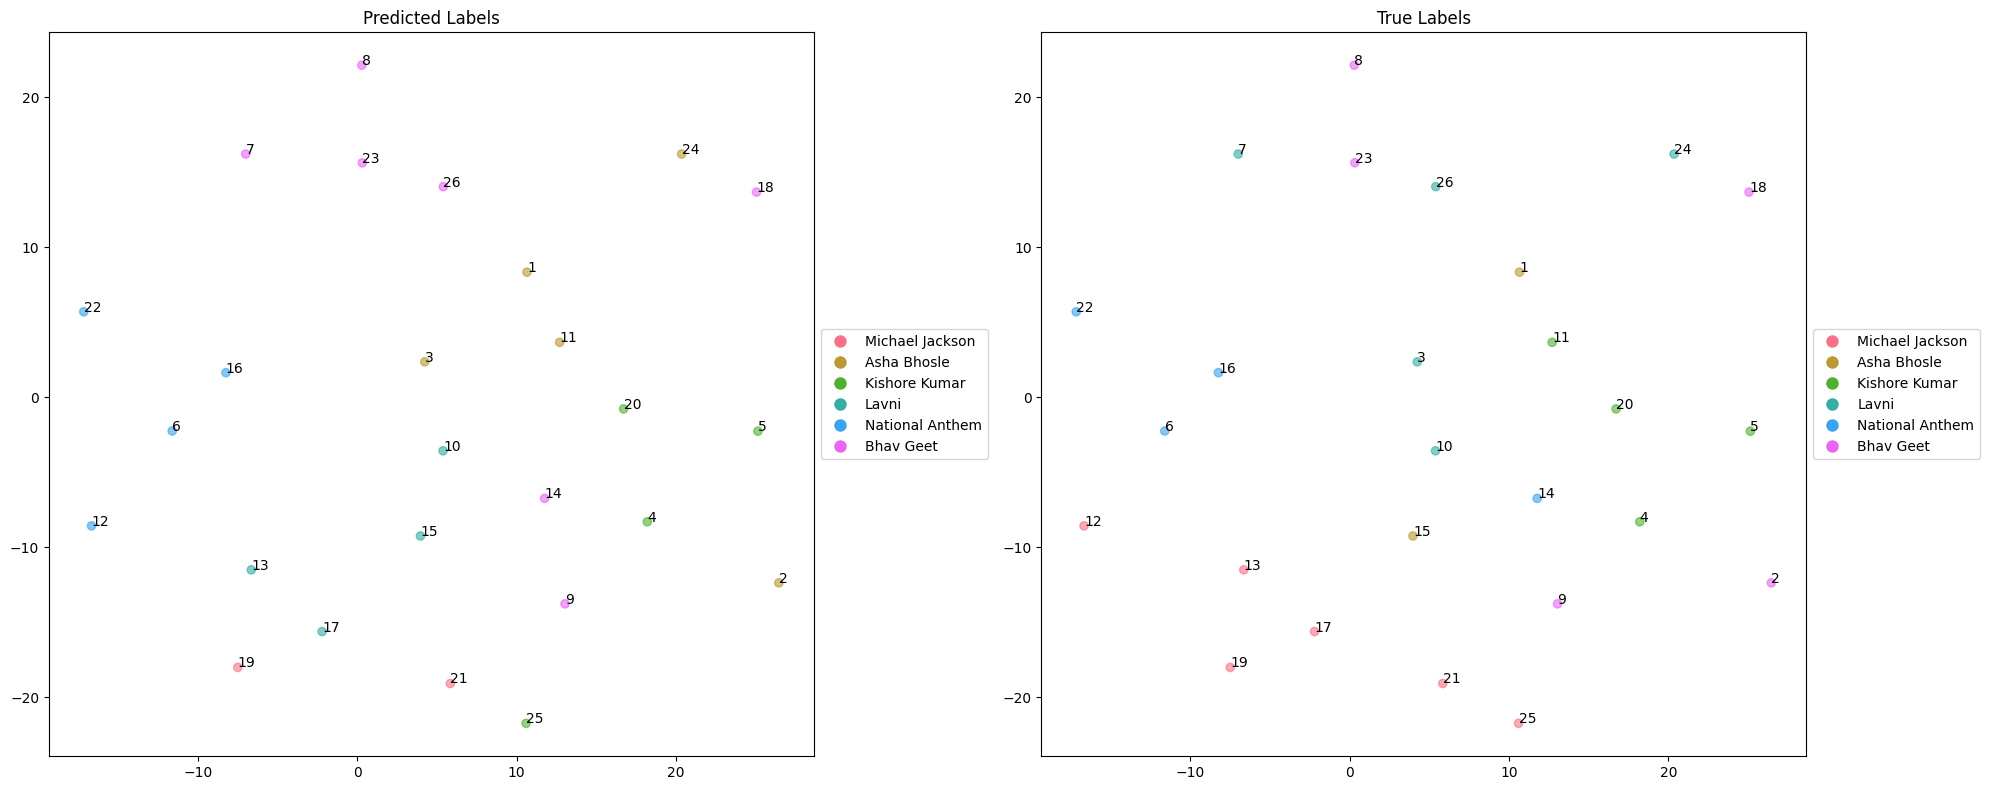

 33%|███▎      | 2/6 [00:22<00:52, 13.12s/it]


Training SVM...

Cross-validation scores: [0.85714286 0.85       0.7        0.7        0.5       ]
Average CV score: 0.7214
Test set accuracy: 0.6538

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.17      0.50      0.25         2
           2       0.75      0.75      0.75         4
           3       0.50      0.20      0.29         5
           4       1.00      0.75      0.86         4
           5       0.60      0.60      0.60         5

    accuracy                           0.65        26
   macro avg       0.67      0.63      0.62        26
weighted avg       0.72      0.65      0.67        26



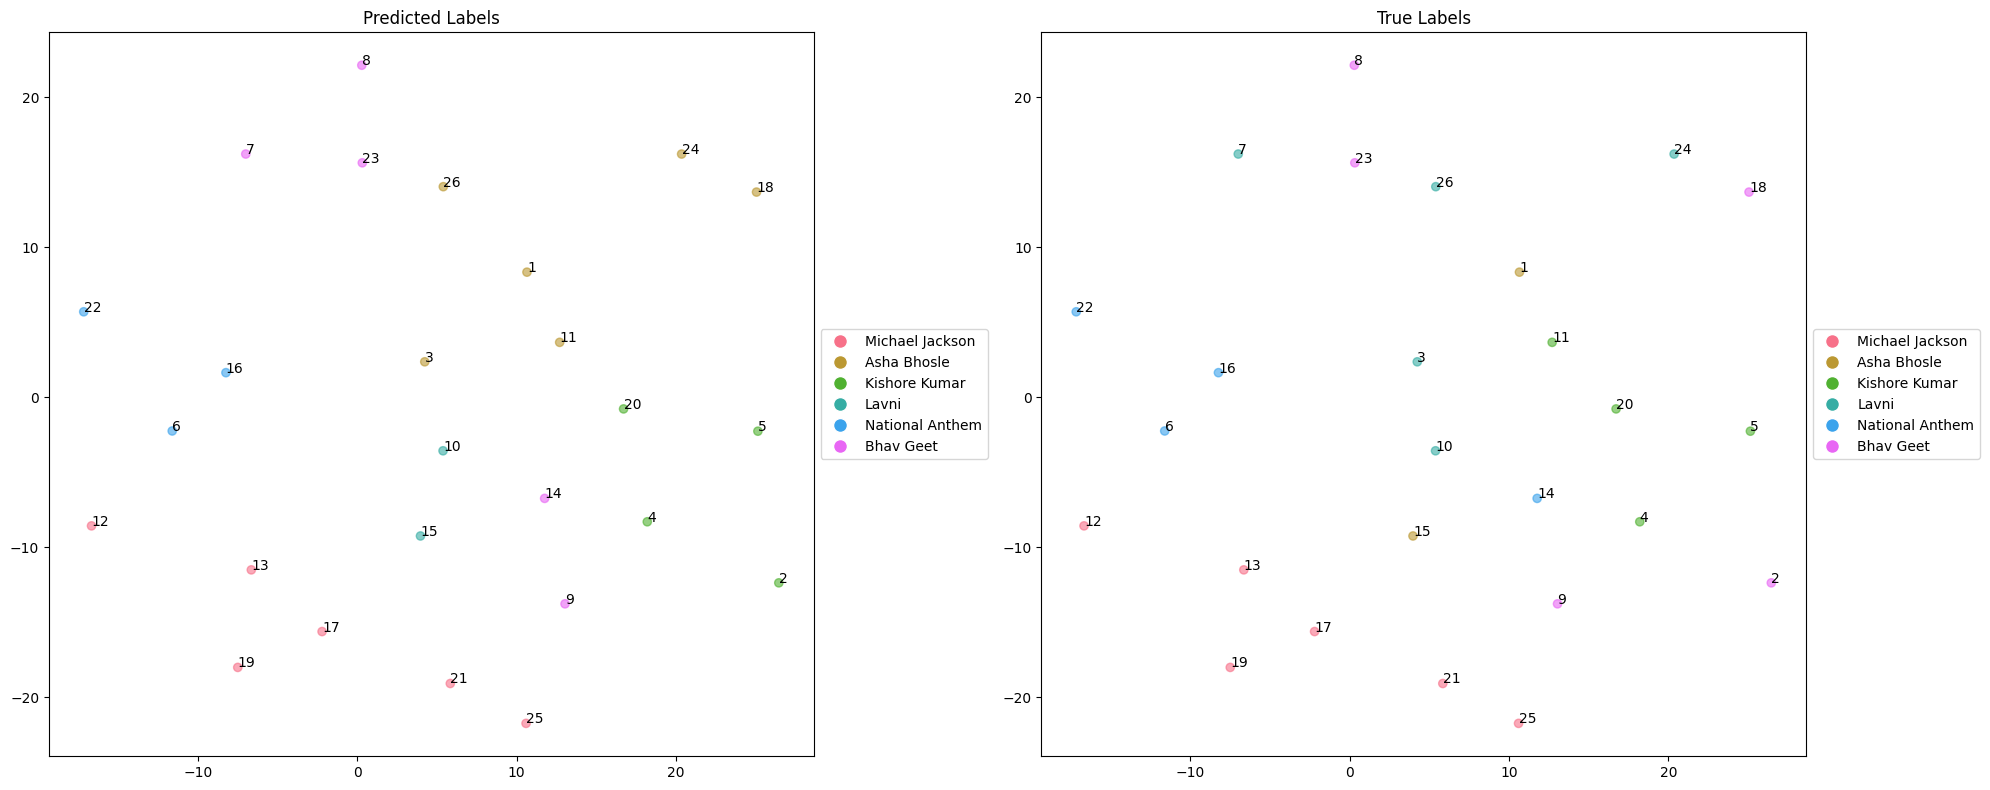

 50%|█████     | 3/6 [00:24<00:23,  7.83s/it]


Training LogisticRegression...

Cross-validation scores: [0.85714286 0.75       0.6        0.75       0.5       ]
Average CV score: 0.6914
Test set accuracy: 0.6154

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         2
           2       0.75      0.75      0.75         4
           3       0.33      0.20      0.25         5
           4       1.00      0.75      0.86         4
           5       0.50      0.60      0.55         5

    accuracy                           0.62        26
   macro avg       0.57      0.55      0.55        26
weighted avg       0.63      0.62      0.61        26



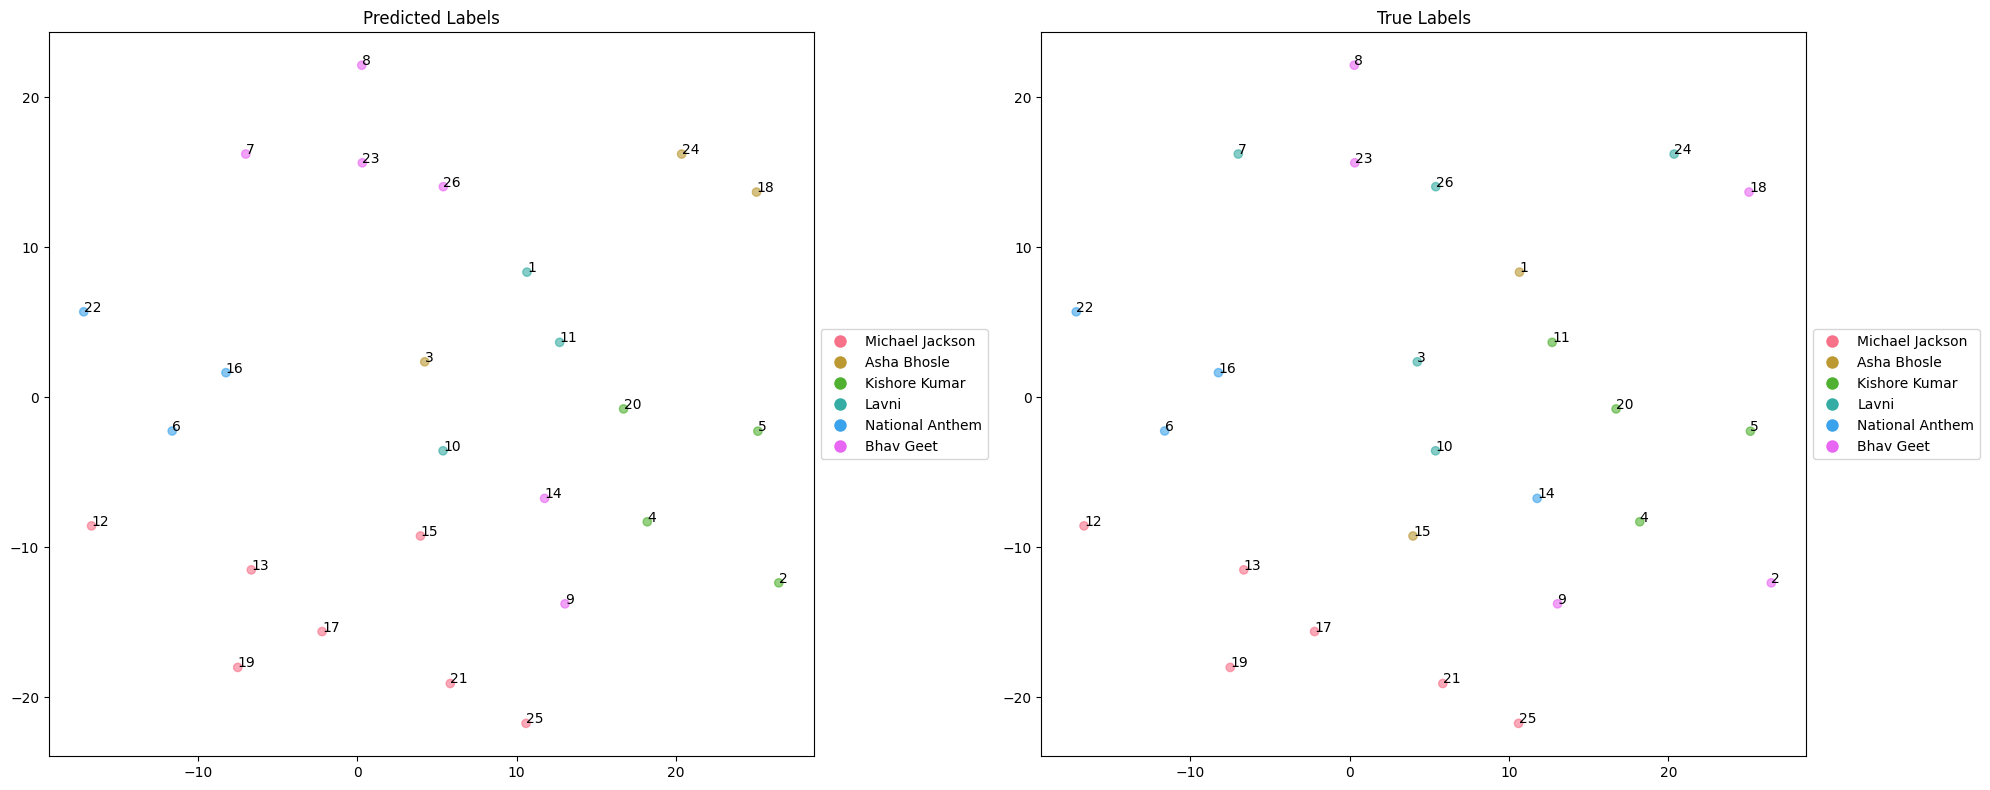

 67%|██████▋   | 4/6 [00:26<00:10,  5.39s/it]


Training KNN...

Cross-validation scores: [0.80952381 0.8        0.7        0.8        0.45      ]
Average CV score: 0.7119
Test set accuracy: 0.6154

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.20      0.50      0.29         2
           2       0.50      0.75      0.60         4
           3       1.00      0.40      0.57         5
           4       0.75      0.75      0.75         4
           5       1.00      0.20      0.33         5

    accuracy                           0.62        26
   macro avg       0.70      0.60      0.57        26
weighted avg       0.77      0.62      0.60        26



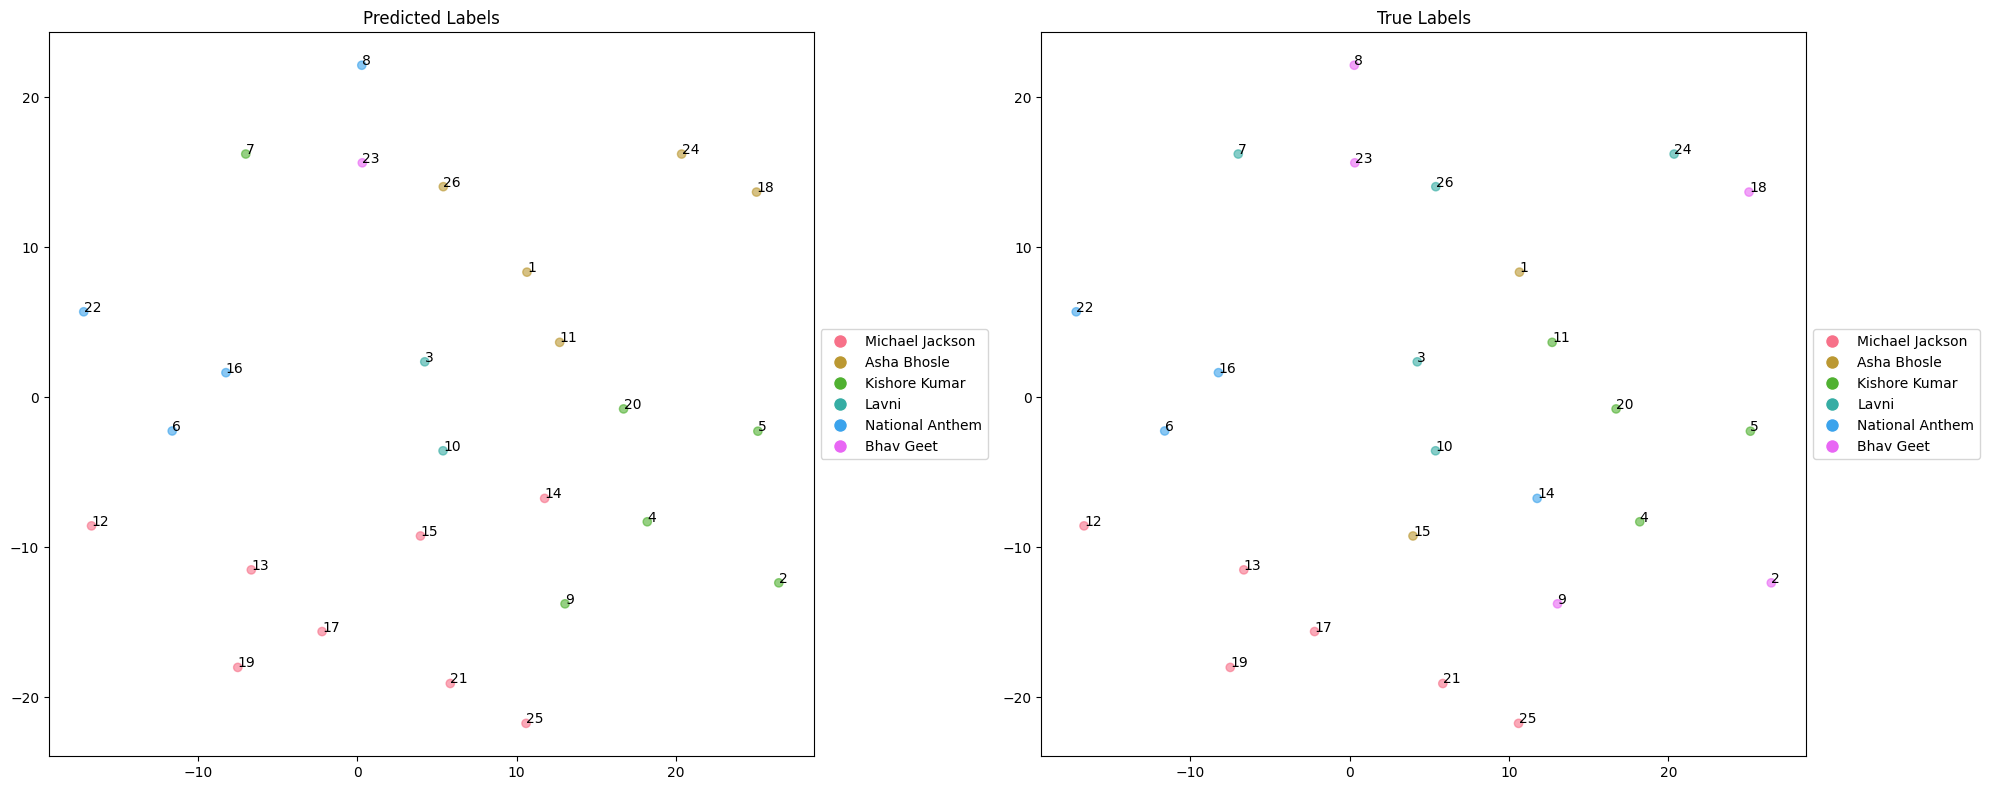

 83%|████████▎ | 5/6 [00:27<00:03,  3.80s/it]


Training XGB...

Cross-validation scores: [0.9047619 0.8       0.65      0.65      0.4      ]
Average CV score: 0.6810
Test set accuracy: 0.6538

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.20      0.50      0.29         2
           2       1.00      0.75      0.86         4
           3       0.50      0.40      0.44         5
           4       0.80      1.00      0.89         4
           5       0.75      0.60      0.67         5

    accuracy                           0.65        26
   macro avg       0.67      0.65      0.65        26
weighted avg       0.72      0.65      0.67        26



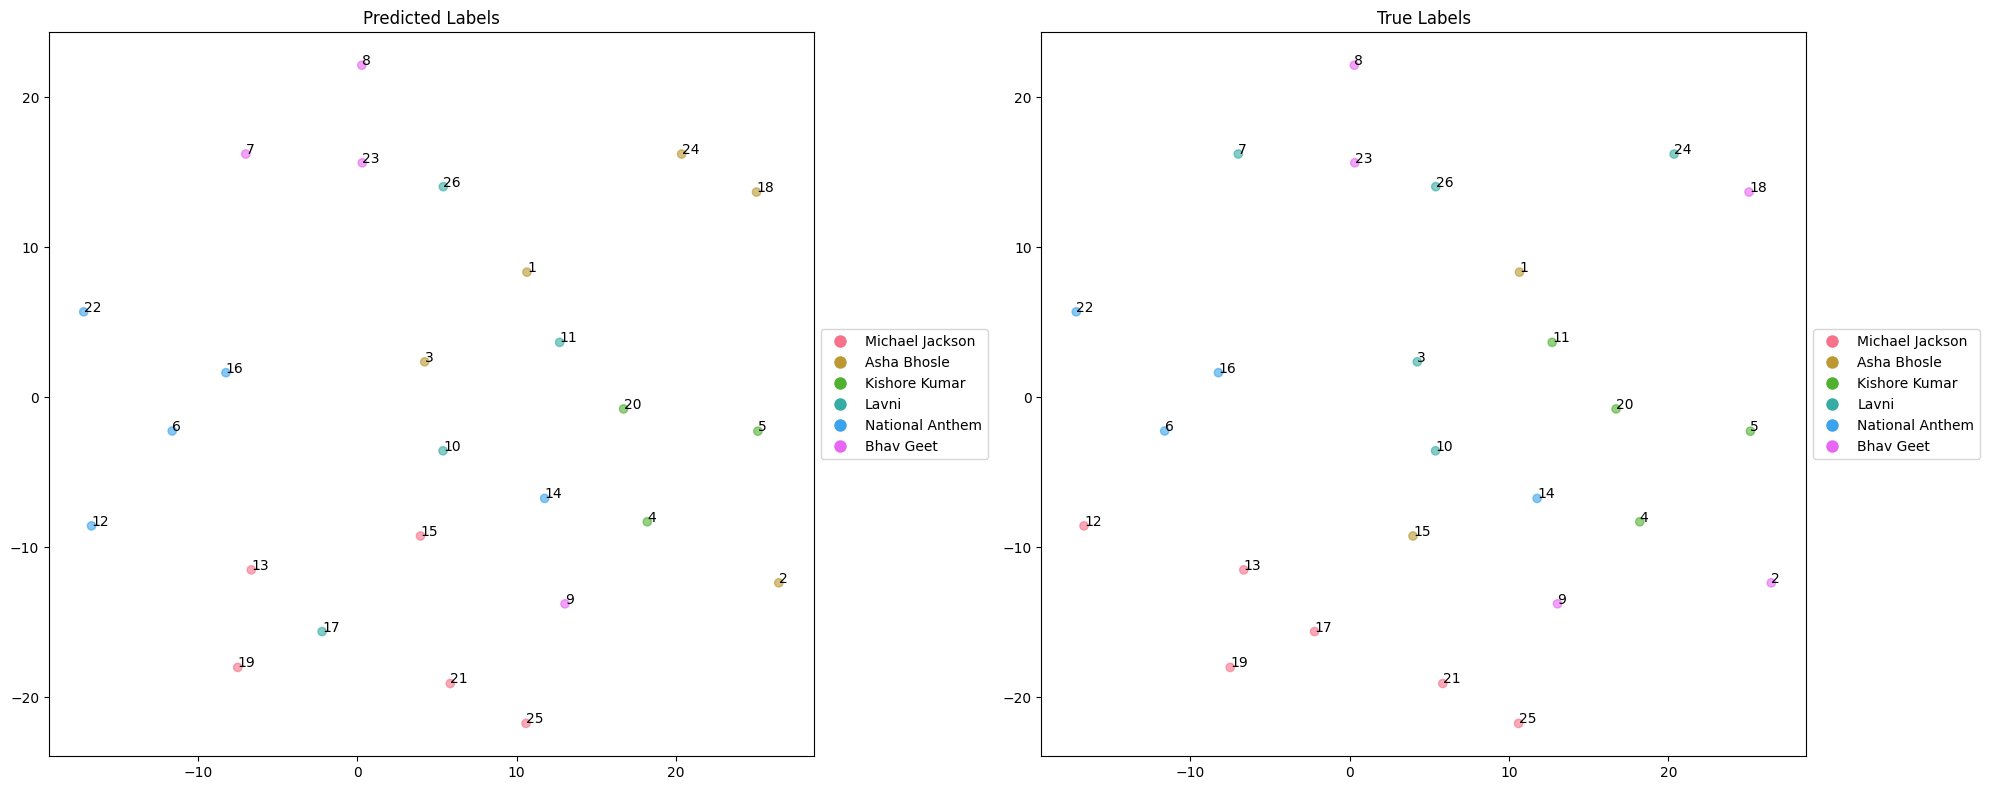

100%|██████████| 6/6 [00:29<00:00,  4.89s/it]



 Loading Files to be Predicted


100%|██████████| 116/116 [00:11<00:00,  9.99it/s]



Making predictions on new files...

Random Forest:


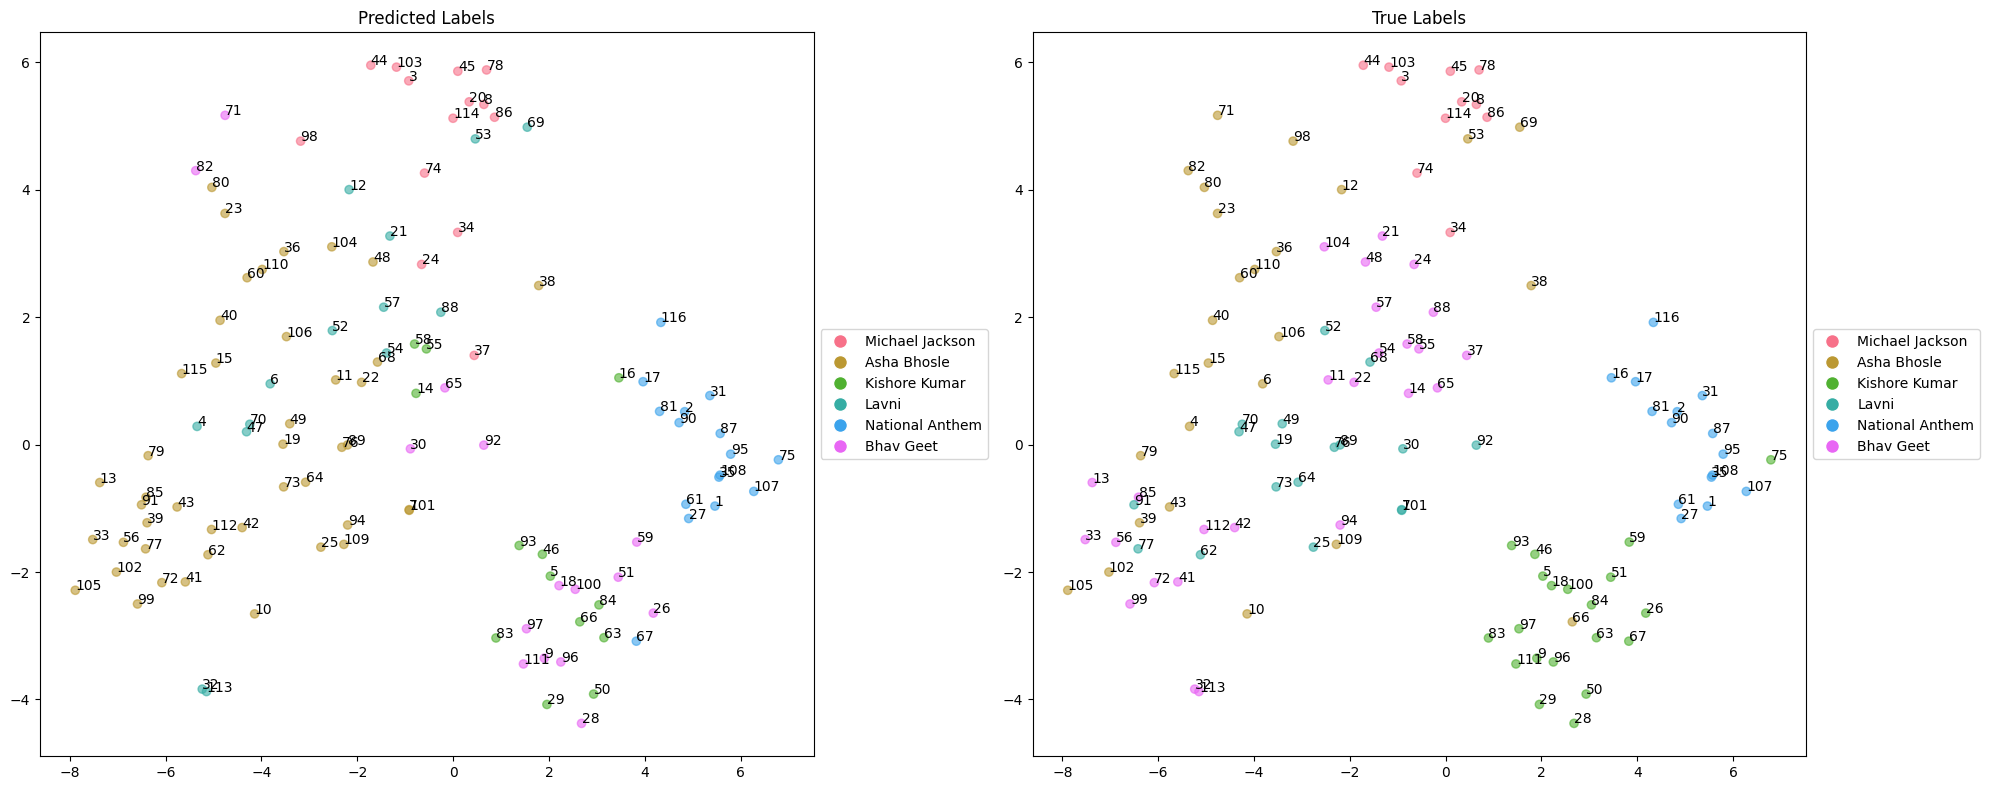

Overall Accuracy: 0.4655

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       0.79      1.00      0.88        11
    Asha Bhosle       0.39      0.65      0.49        26
  Kishore Kumar       0.62      0.40      0.48        20
          Lavni       0.21      0.17      0.19        18
National Anthem       0.88      0.93      0.90        15
      Bhav Geet       0.07      0.04      0.05        26

       accuracy                           0.47       116
      macro avg       0.49      0.53      0.50       116
   weighted avg       0.43      0.47      0.43       116



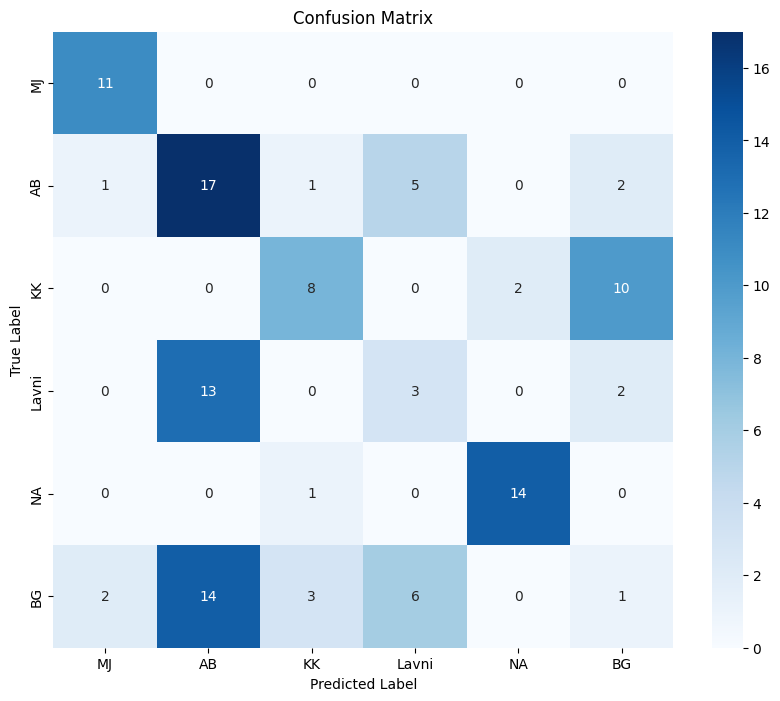


Gradient Boosting:


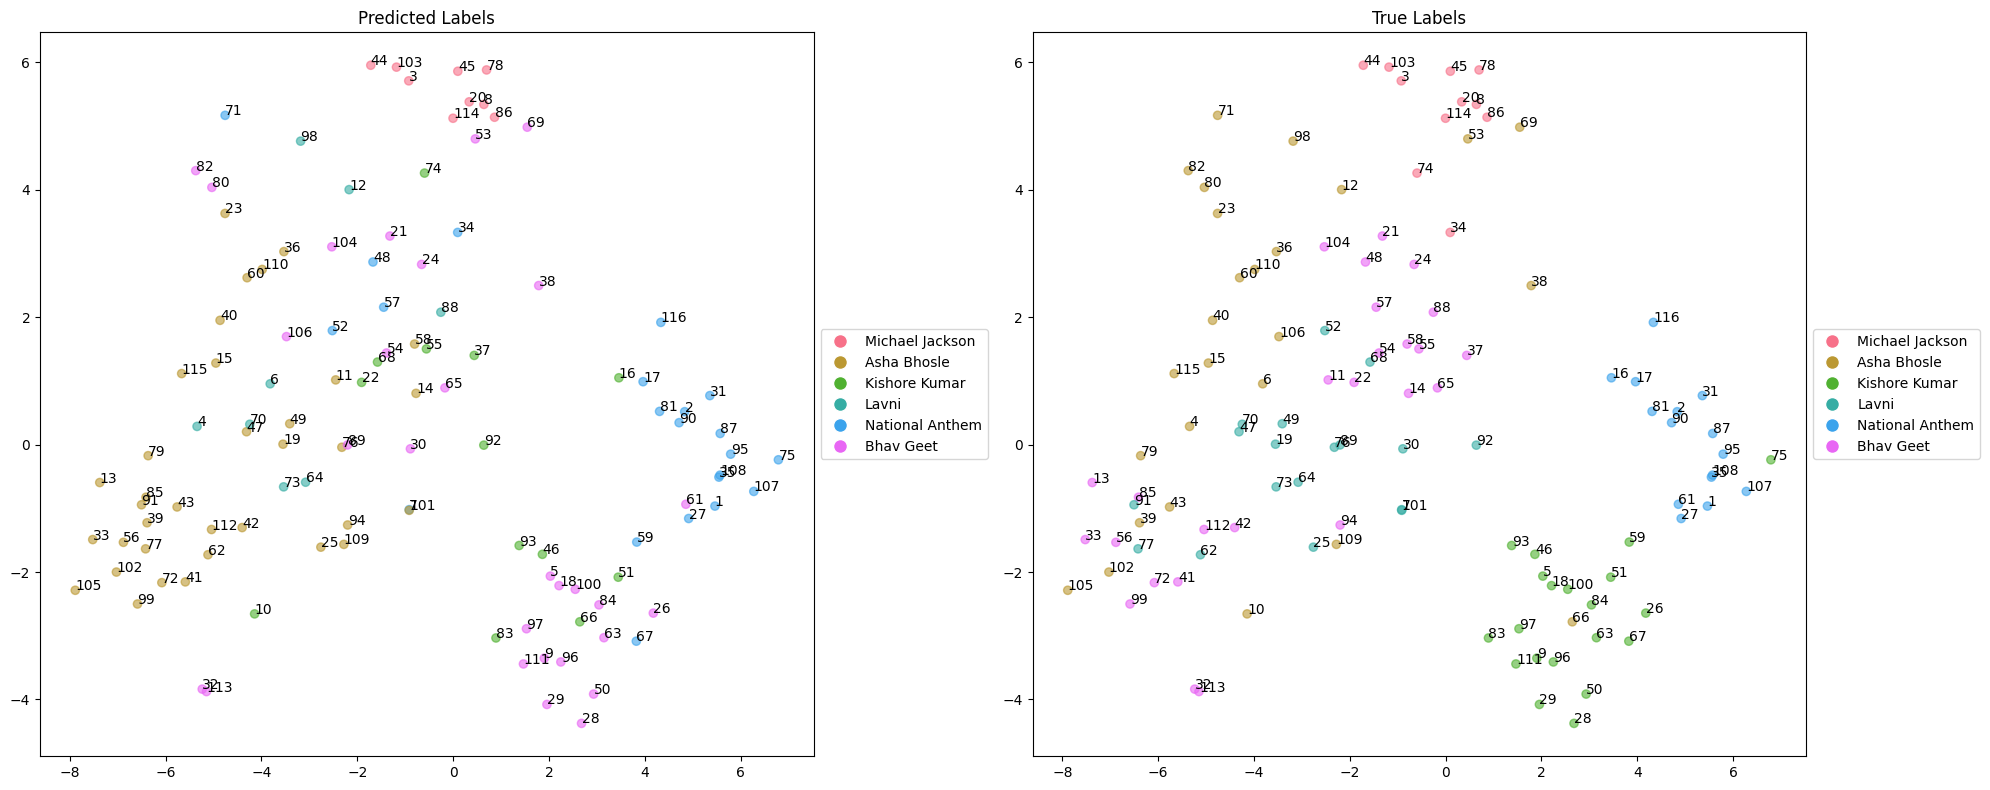

Overall Accuracy: 0.4224

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       1.00      0.82      0.90        11
    Asha Bhosle       0.37      0.50      0.43        26
  Kishore Kumar       0.31      0.20      0.24        20
          Lavni       0.38      0.17      0.23        18
National Anthem       0.59      0.87      0.70        15
      Bhav Geet       0.24      0.27      0.25        26

       accuracy                           0.42       116
      macro avg       0.48      0.47      0.46       116
   weighted avg       0.42      0.42      0.41       116



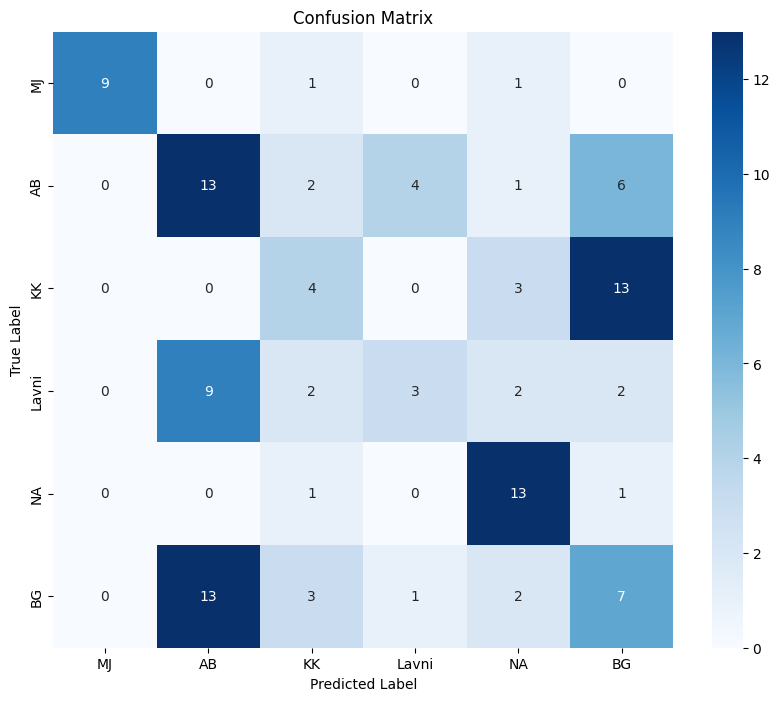


SVM:


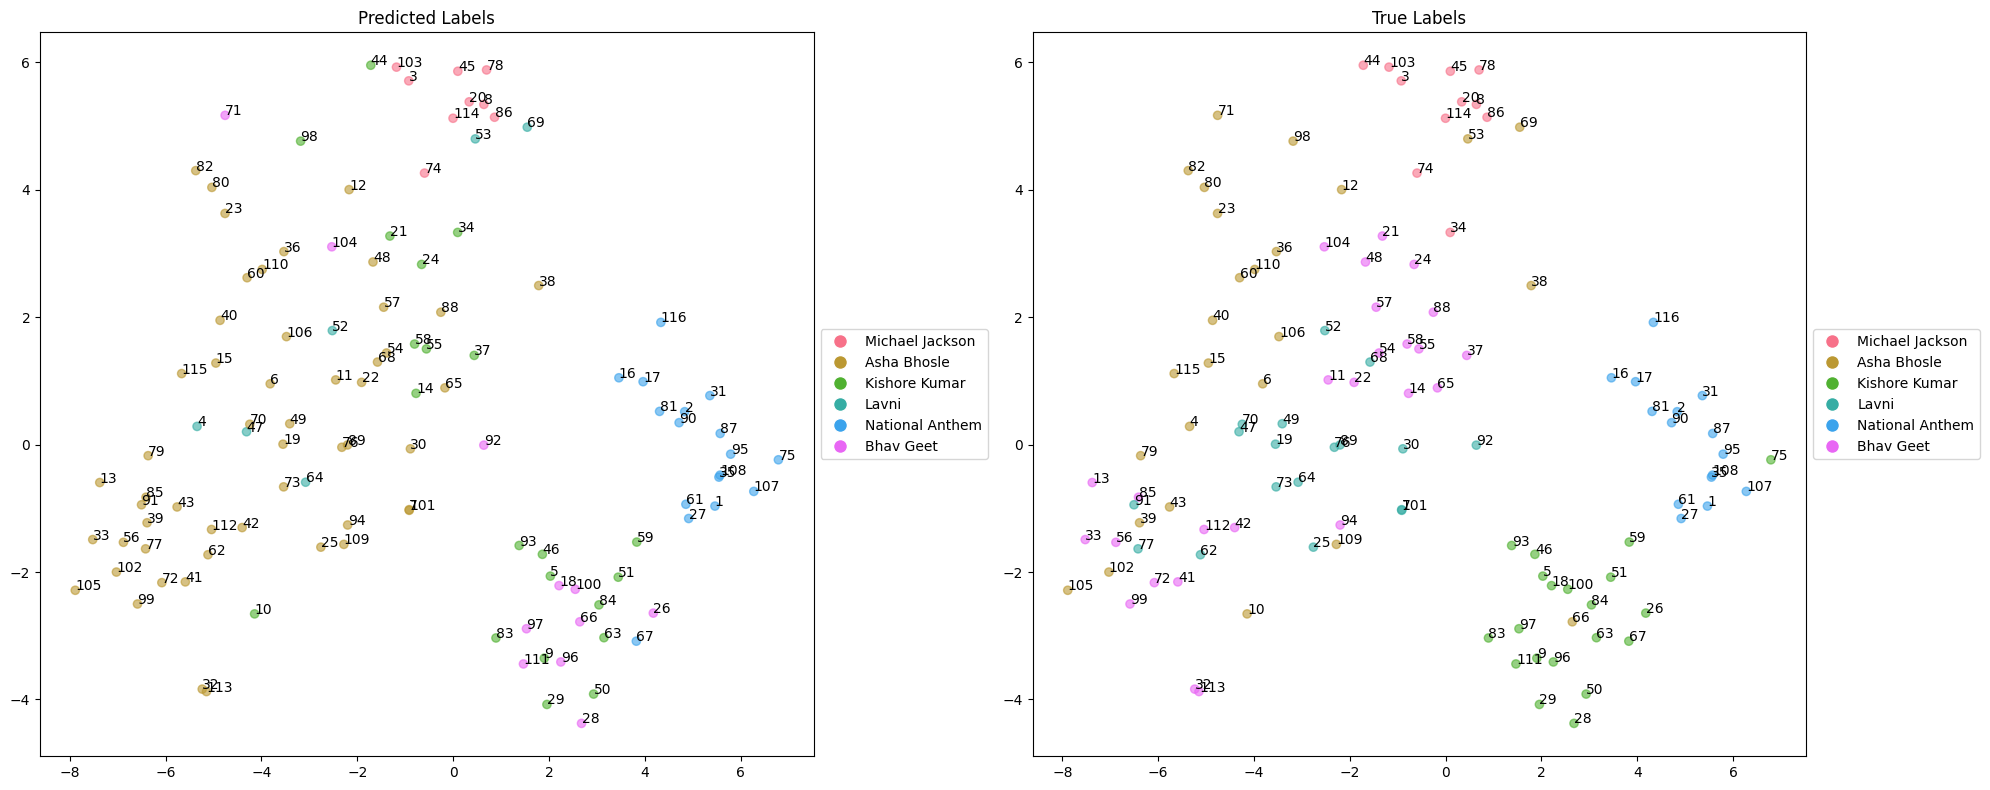

Overall Accuracy: 0.5000

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       1.00      0.82      0.90        11
    Asha Bhosle       0.37      0.73      0.49        26
  Kishore Kumar       0.52      0.55      0.54        20
          Lavni       0.50      0.17      0.25        18
National Anthem       0.88      1.00      0.94        15
      Bhav Geet       0.09      0.04      0.05        26

       accuracy                           0.50       116
      macro avg       0.56      0.55      0.53       116
   weighted avg       0.48      0.50      0.46       116



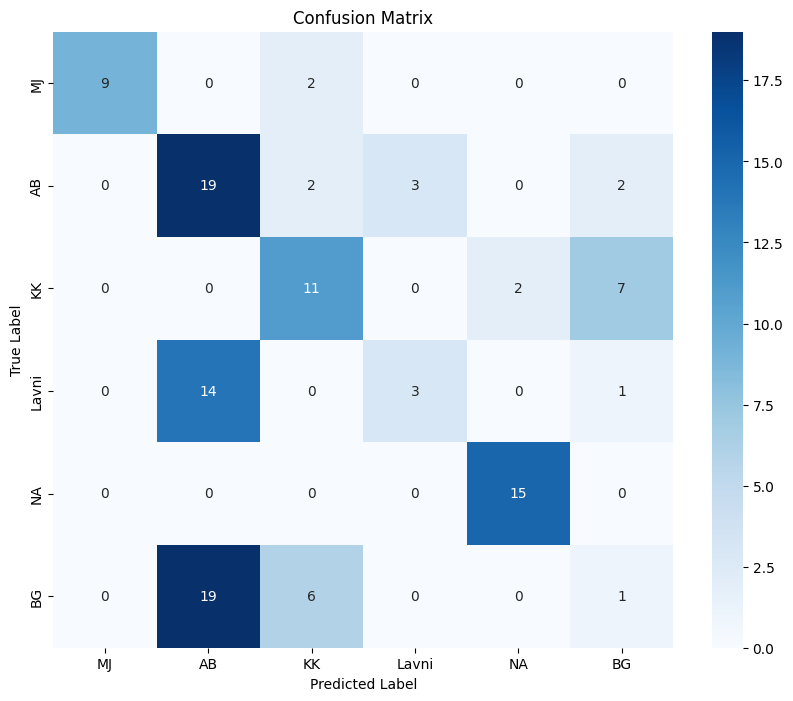


LogisticRegression:


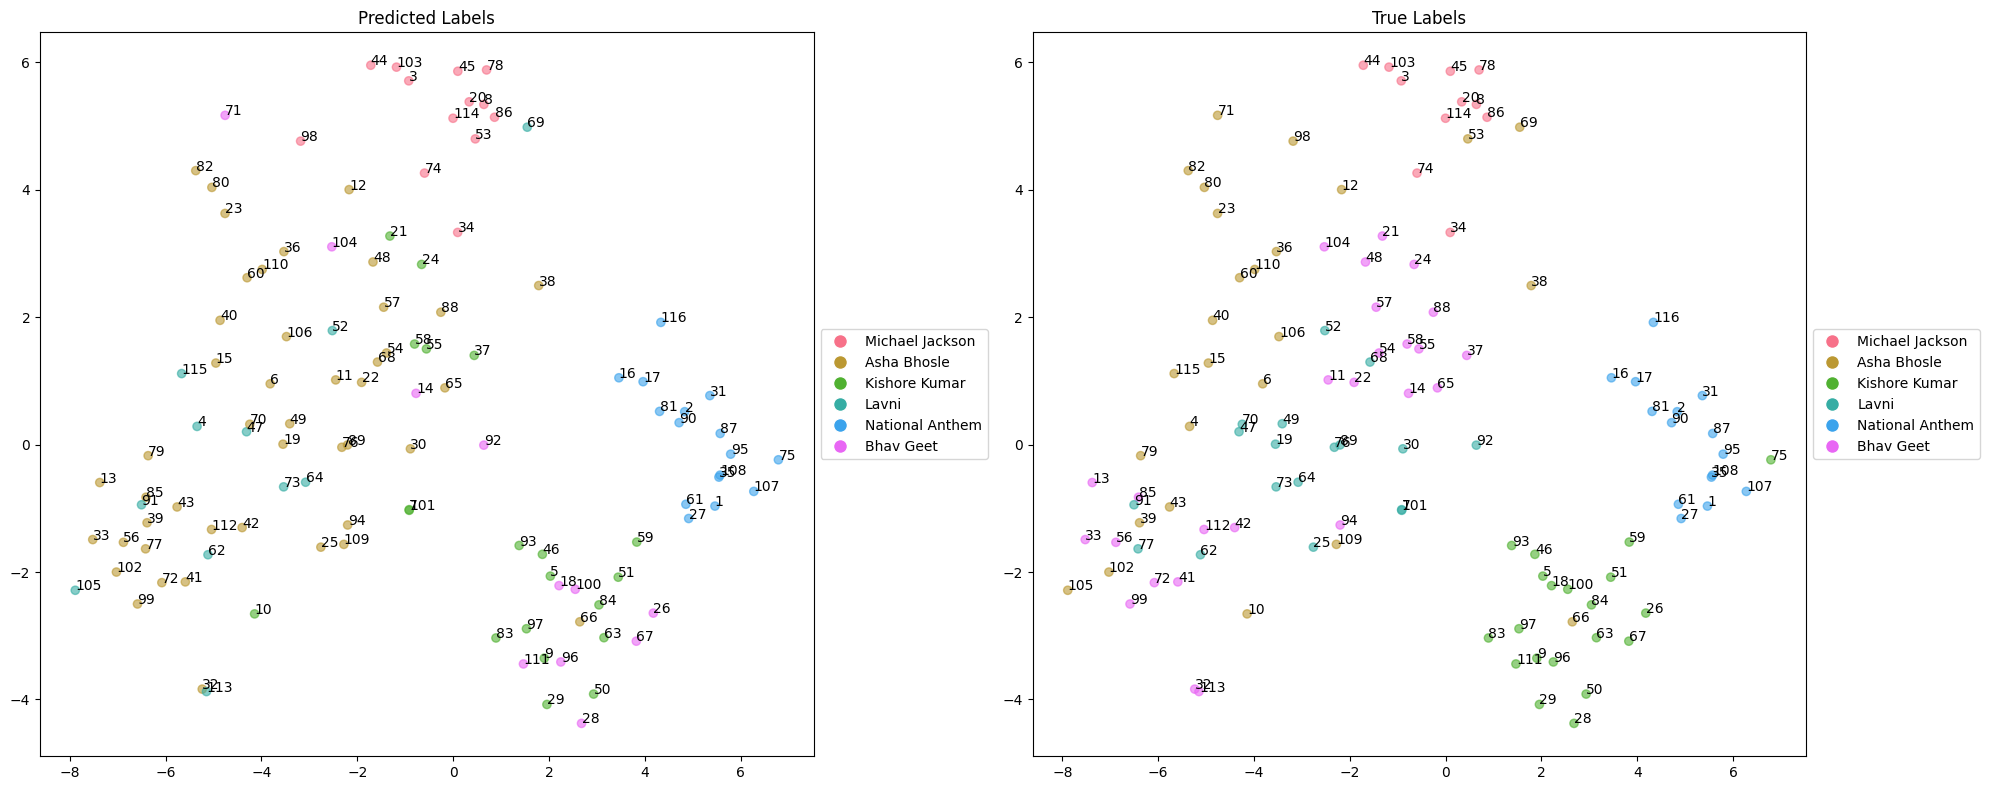

Overall Accuracy: 0.5517

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       0.85      1.00      0.92        11
    Asha Bhosle       0.40      0.69      0.51        26
  Kishore Kumar       0.60      0.60      0.60        20
          Lavni       0.55      0.33      0.41        18
National Anthem       0.94      1.00      0.97        15
      Bhav Geet       0.18      0.08      0.11        26

       accuracy                           0.55       116
      macro avg       0.59      0.62      0.59       116
   weighted avg       0.52      0.55      0.52       116



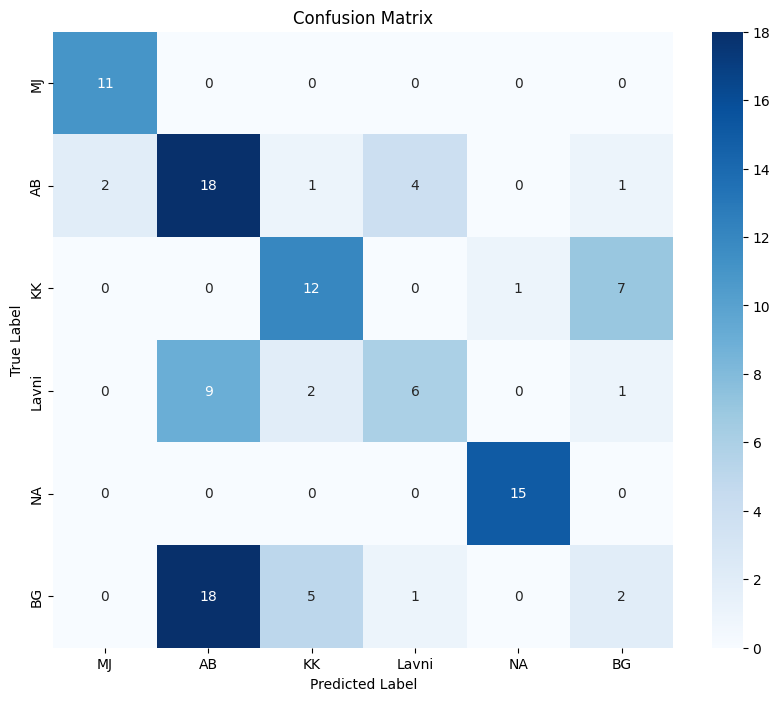


KNN:


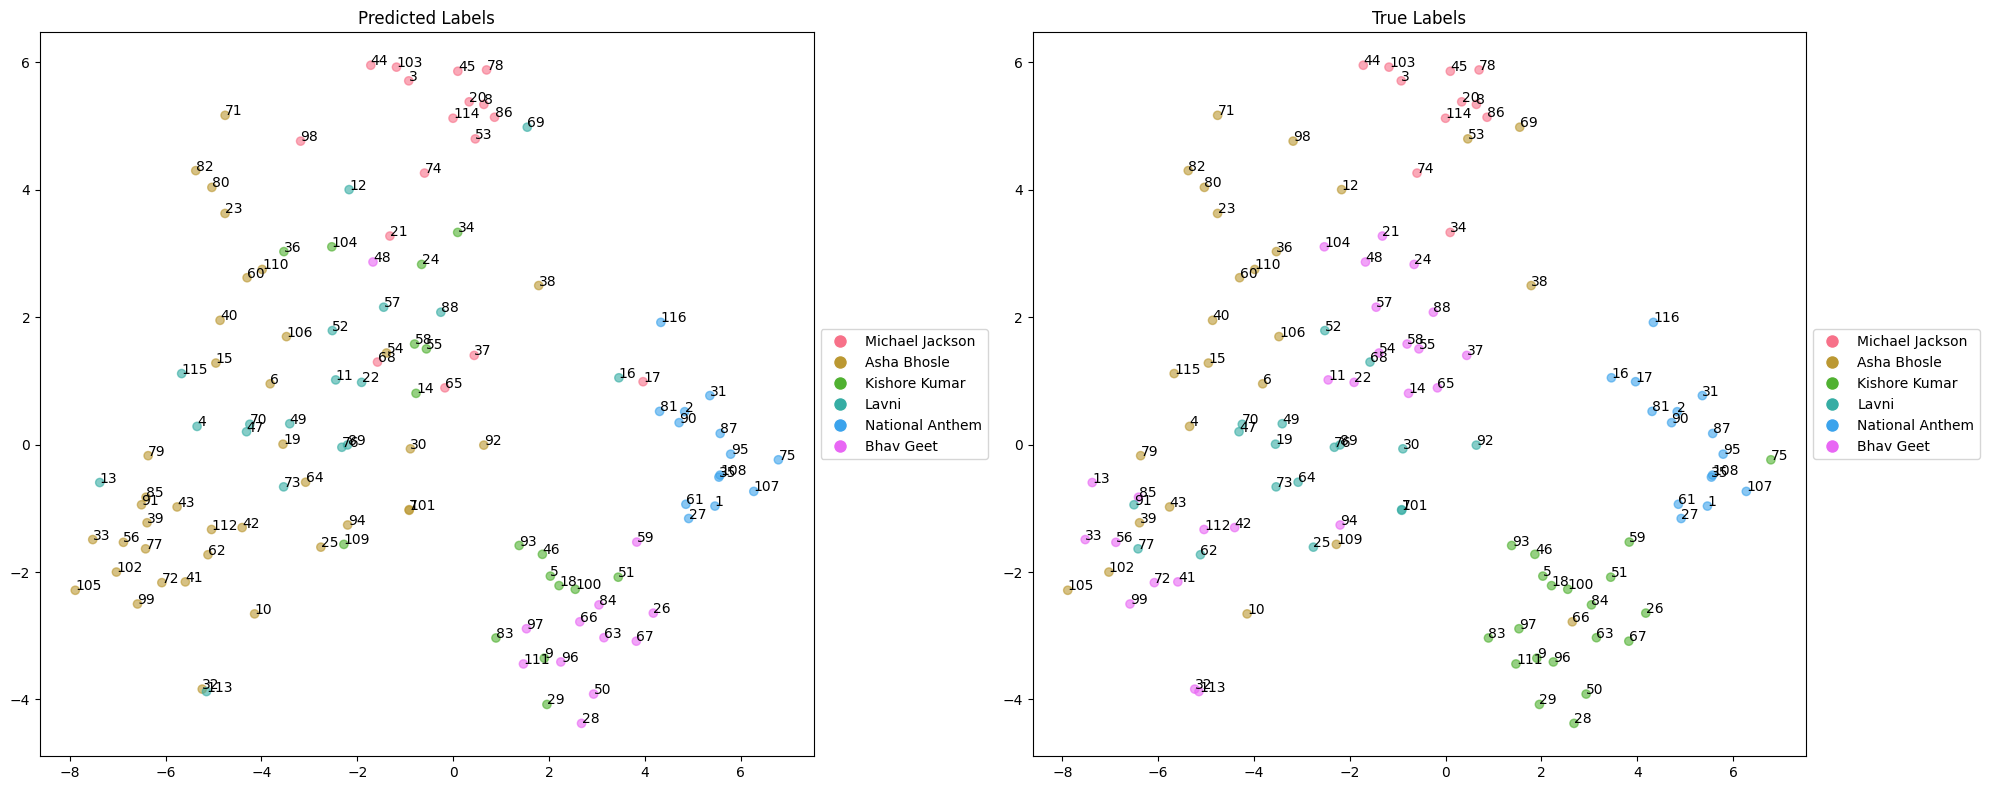

Overall Accuracy: 0.4914

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       0.59      0.91      0.71        11
    Asha Bhosle       0.45      0.65      0.53        26
  Kishore Kumar       0.53      0.45      0.49        20
          Lavni       0.39      0.39      0.39        18
National Anthem       0.93      0.87      0.90        15
      Bhav Geet       0.08      0.04      0.05        26

       accuracy                           0.49       116
      macro avg       0.49      0.55      0.51       116
   weighted avg       0.45      0.49      0.46       116



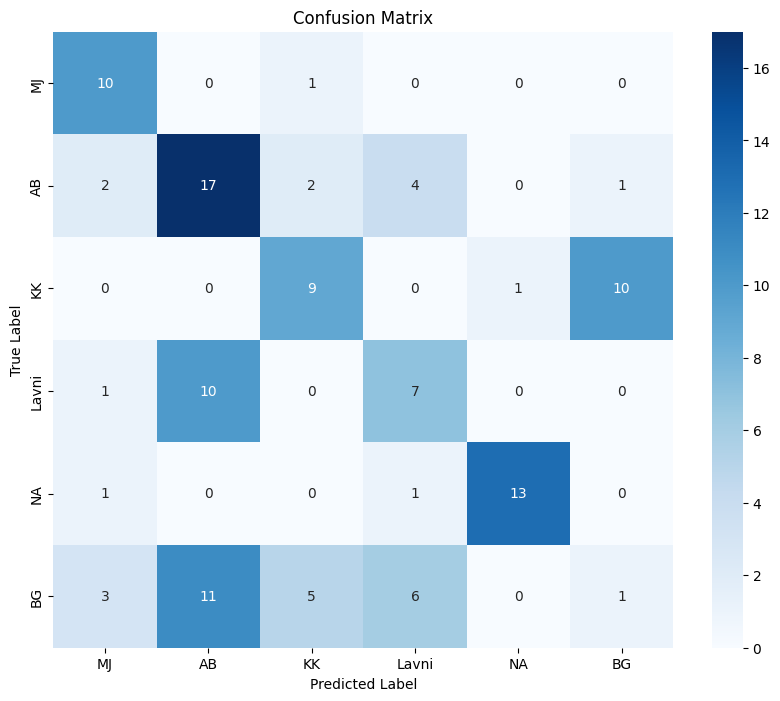


XGB:


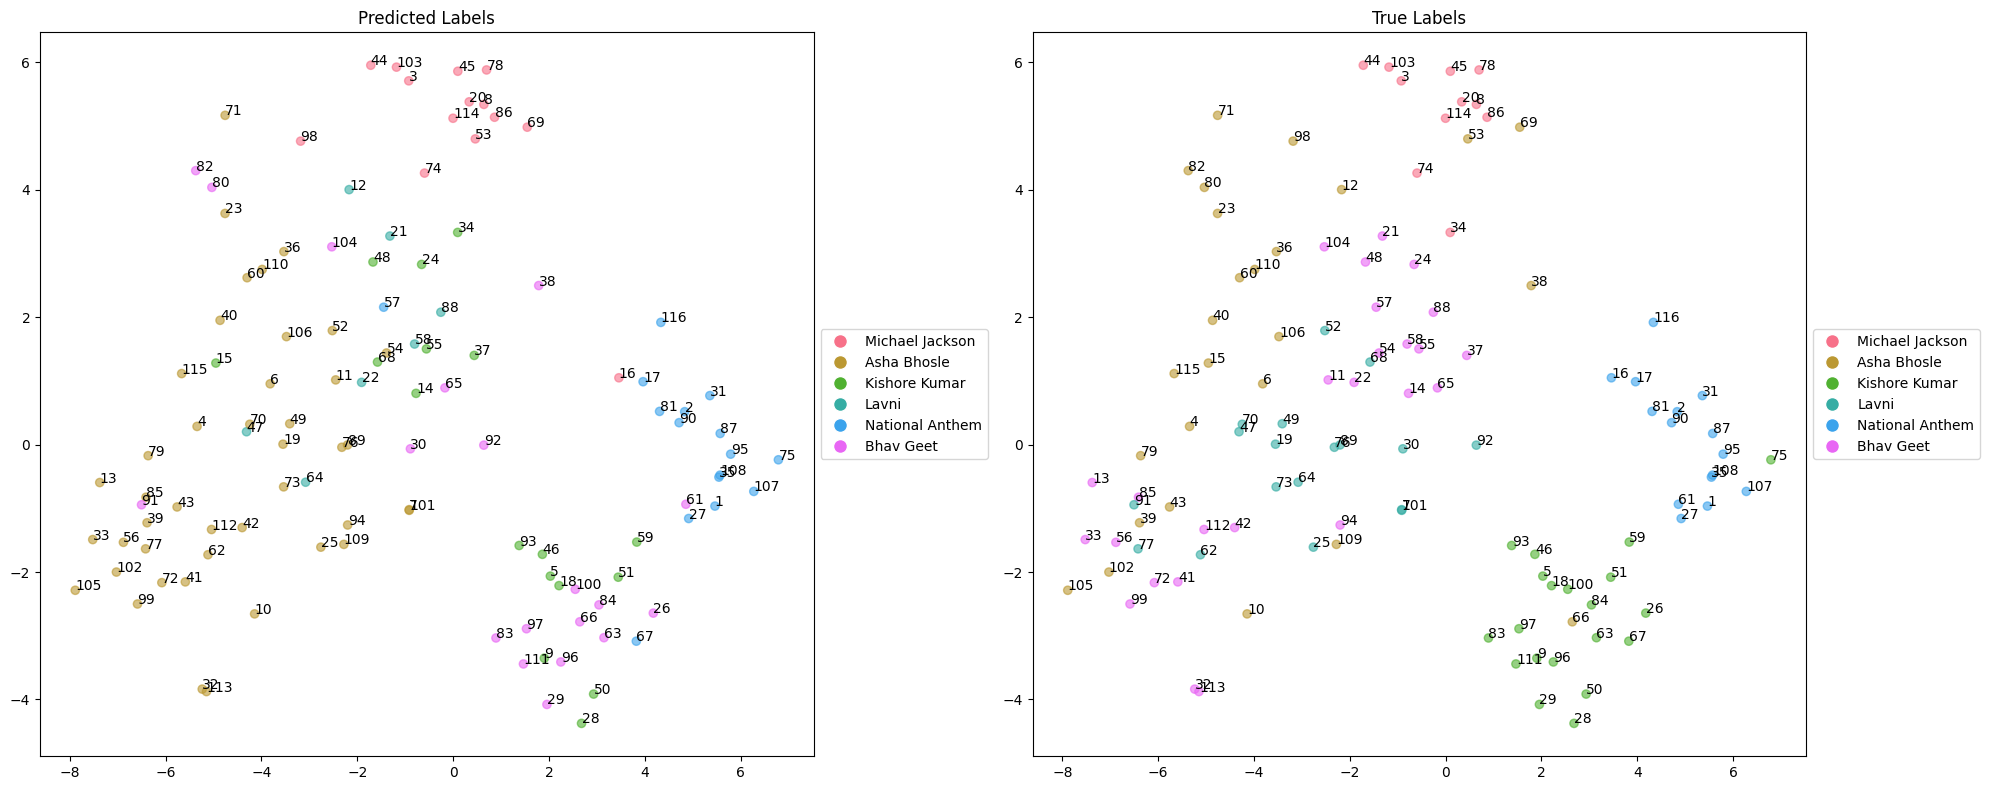

Overall Accuracy: 0.4569

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       0.71      0.91      0.80        11
    Asha Bhosle       0.40      0.65      0.49        26
  Kishore Kumar       0.53      0.45      0.49        20
          Lavni       0.29      0.11      0.16        18
National Anthem       0.81      0.87      0.84        15
      Bhav Geet       0.11      0.08      0.09        26

       accuracy                           0.46       116
      macro avg       0.47      0.51      0.48       116
   weighted avg       0.42      0.46      0.42       116



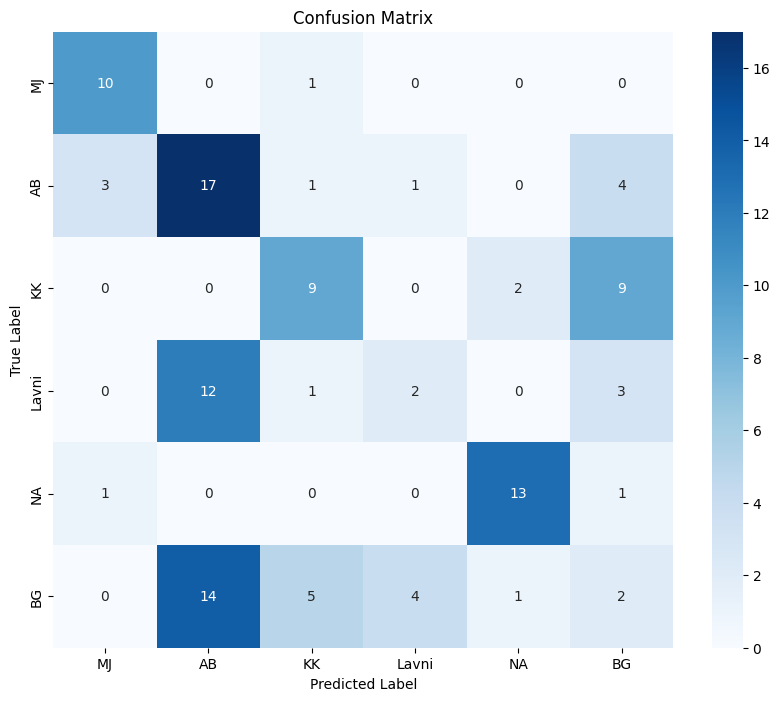

In [59]:
# Main execution function
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def main(metadata_csv, prediction_folder):
    """
    Main execution function
    """
    print("Loading and processing training data...")
    X, y = prepare_training_data(metadata_csv)

    print("\nTraining and evaluating models...")
    fitted_models = train_and_evaluate_models(X, y)

    # print(f"\nBest model: {best_model_name}")
    print("\n Loading Files to be Predicted")
    X_pred, mfcc_files = load_predicting_files(prediction_folder)

    print("\nMaking predictions on new files...")
    pred_dict = {}
    for n, (name, model, scaler) in fitted_models.items():
        print(f"\n{name}:")
        predictions = predict_new_files(model, scaler, X_pred, mfcc_files)

        # # Save predictions to CSV
        predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=['predicted_category'])
        predictions_df.index.name = 'file_name'
        # predictions_df.to_csv('predictions.csv')

        predicted_labels = predictions_df['predicted_category'].values

        # For evaluation
        evaluate_predictions(true_labels, predicted_labels)
        pred_dict[name] = predictions_df


    return pred_dict


# Usage example:
if __name__ == "__main__":
    metadata_csv = "DS203-Project/songs/songs_summary.csv"  # CSV with training data paths and labels
    prediction_folder = "DS203-Project/MFCC-files-v2"  # Folder containing files to predict
    predictions = main(metadata_csv, prediction_folder)


# Attempt 3
Now doing PCA, earlier no feature reduction was done, only scaling

This resulted in decreasing of accuracy of the model

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import glob
import os
from sklearn.decomposition import PCA
from tqdm import tqdm

def extract_mfcc_features(mfcc_data):
    """
    Extract statistical features from MFCC coefficients
    """
    features = []

    # Statistical features for each MFCC coefficient
    for i in range(20):  # 20 MFCC coefficients
        coef_data = mfcc_data[i]

        # Basic statistics
        mean = np.mean(coef_data)
        std = np.std(coef_data)
        minimum = np.min(coef_data)
        maximum = np.max(coef_data)

        # Quartiles and IQR
        q25 = np.percentile(coef_data, 25)
        q75 = np.percentile(coef_data, 75)
        iqr = q75 - q25

        # Shape statistics
        skewness = pd.Series(coef_data).skew()
        kurtosis = pd.Series(coef_data).kurtosis()

        # Zero crossing rate
        zero_crossings = np.sum(np.diff(np.signbit(coef_data).astype(int)) != 0)

        # RMS energy
        rms = np.sqrt(np.mean(np.square(coef_data)))

        features.extend([
            mean, std, minimum, maximum,
            q25, q75, iqr,
            skewness, kurtosis,
            zero_crossings, rms
        ])

    return features

def create_feature_names():
    """
    Create feature names for the extracted features
    """
    base_features = [
        'mean', 'std', 'min', 'max',
        'q25', 'q75', 'iqr',
        'skewness', 'kurtosis',
        'zero_crossings', 'rms'
    ]

    feature_names = []
    for i in range(20):
        feature_names.extend([f'mfcc{i+1}_{feat}' for feat in base_features])

    return feature_names

def load_and_process_data(csv_path, mode='test'):
    """
    Load and process a single MFCC CSV file
    """
    try:
        if mode == 'train':
          mfcc_data = np.loadtxt(csv_path, delimiter = ',', skiprows=1)
        else:
          mfcc_data = np.loadtxt(csv_path, delimiter=',')
        # features = extract_mfcc_features(mfcc_data)
        features = extract_new_features(mfcc_data)
        return features
    except Exception as e:
        print(f"Error processing {csv_path}: {str(e)}")
        return None

In [39]:
def prepare_training_data(metadata_csv):
    """
    Prepare training data from metadata CSV
    """
    # Read metadata
    metadata = pd.read_csv(metadata_csv)

    # Process each file and extract features
    X = []
    y = []

    for idx, row in tqdm(metadata.iterrows(), total=len(metadata)):
        features = load_and_process_data('DS203-Project/' + row['pathname'], 'train')
        if features is not None:
            X.append(features)
            y.append(row['label'])

    # feature_names = create_feature_names()
    # X = pd.DataFrame(X, columns=feature_names)
    X = pd.DataFrame(X)

    return X, y

def train_and_evaluate_models(X, y):
    """
    Train and evaluate multiple classification models
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    pca = PCA(n_components=0.95)
    X_train_dimred = pca.fit_transform(X_train_scaled)

    X_test_scaled = scaler.transform(X_test)
    X_test_dimred = pca.transform(X_test_scaled)

    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42),
        'LogisticRegression': LogisticRegression(random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }

    best_model = None
    best_score = 0

    fitted_models = {}

    # Train and evaluate each model
    for name, model in tqdm(models.items()):
        print(f"\nTraining {name}...\n")

        # Train the model
        # model.fit(X_train y_train)
        model.fit(X_train_dimred, y_train)

        # Cross-validation
        # cv_scores = cross_val_score(model, X_train y_train, cv=5)
        cv_scores = cross_val_score(model, X_train_dimred, y_train, cv=5)
        print(f"Cross-validation scores: {cv_scores}")
        print(f"Average CV score: {cv_scores.mean():.4f}")

        # Test set evaluation
        # y_pred = model.predict(X_test_scaled)
        # score = model.score(X_test y_test)
        y_pred = model.predict(X_test_dimred)
        score = model.score(X_test_dimred, y_test)
        print(f"Test set accuracy: {score:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        fitted_models[name] = (name, model, scaler)
        # Update best model if necessary
        if score > best_score:
            best_score = score
            best_model = (name, model, scaler)

        create_tsne_visualization(X_test_dimred, y_pred, y_test)

    return fitted_models, pca

def load_predicting_files(input_folder):
    X_scaled = []

    # Get all MFCC CSV files in the input folder
    mfcc_files = glob.glob(os.path.join(input_folder, "*-MFCC.csv"))
    mfcc_files = sorted(mfcc_files, key=lambda x: int(x.split('/')[-1].split('-')[0]))

    # Process each file and extract features
    X = []
    # y = []

    for file_path in tqdm(mfcc_files):
        features = load_and_process_data(file_path)
        if features is not None:
            X.append(features)

    # feature_names = create_feature_names()
    # X = pd.DataFrame(X, columns=feature_names)
    X = pd.DataFrame(X)

    return X, mfcc_files

def predict_new_files(model, scaler, pca, X, mfcc_files):
    """
    Predict categories for new files
    """
    X_scaled = scaler.transform(X)
    X_dimred = pca.transform(X_scaled)
    predictions = {}
    # X_scaled = []

    predictions = model.predict(X_dimred)
    file_names = [os.path.basename(file_path) for file_path in mfcc_files]

    create_tsne_visualization(X_scaled, predictions, true_labels)

    # Create a dictionary with file names as keys and predicted categories as values
    predictions = {file_name: category for file_name, category in zip(file_names, predictions)}

    return predictions

In [40]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


def create_tsne_visualization(features, predicted_labels, true_labels=None, perplexity=30):
    """
    Create t-SNE visualization of the features, colored by predicted and true labels

    Parameters:
    features: numpy array of features
    predicted_labels: array of predicted labels
    true_labels: array of true labels (optional)
    perplexity: perplexity parameter for t-SNE
    """
    perplexity = 30 if len(features)>300 else 10
    # Create t-SNE embedding
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(features)

    # Create color palette
    colors = sns.color_palette("husl", 6)

    # Set up the figure
    if true_labels is not None:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    else:
        fig, ax1 = plt.subplots(figsize=(10, 8))

    # Plot predicted labels
    scatter1 = ax1.scatter(tsne_results[:, 0], tsne_results[:, 1],
                          c=[colors[int(label)] for label in predicted_labels],
                          alpha=0.6)
    ax1.set_title('Predicted Labels')

    # Create legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                 markerfacecolor=colors[i], label=label, markersize=10)
                      for i, label in enumerate(['Michael Jackson', 'Asha Bhosle',
                                              'Kishore Kumar', 'Lavni',
                                              'National Anthem', 'Bhav Geet'])]
    ax1.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    # If true labels are provided, create second plot
    if true_labels is not None:
        scatter2 = ax2.scatter(tsne_results[:, 0], tsne_results[:, 1],
                             c=[colors[int(label)] for label in true_labels],
                             alpha=0.6)
        ax2.set_title('True Labels')
        ax2.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    for i, point in enumerate(tsne_results):
        ax1.annotate(i+1, (point[0], point[1]))
        if true_labels is not None:
            ax2.annotate(i+1, (point[0], point[1]))

    plt.tight_layout()
    plt.show()

def evaluate_predictions(true_labels, predicted_labels):
    """
    Evaluate the predictions against true labels
    """
    # Convert labels to strings if they aren't already
    true_labels = [str(label) for label in true_labels]
    predicted_labels = [str(label) for label in predicted_labels]

    # Calculate and print accuracy
    accuracy = np.mean(np.array(true_labels) == np.array(predicted_labels))
    print(f"Overall Accuracy: {accuracy:.4f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels,
                              target_names=['Michael Jackson', 'Asha Bhosle',
                                          'Kishore Kumar', 'Lavni',
                                          'National Anthem', 'Bhav Geet']))

    # Create confusion matrix visualization
    plt.figure(figsize=(10, 8))
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['MJ', 'AB', 'KK', 'Lavni', 'NA', 'BG'],
                yticklabels=['MJ', 'AB', 'KK', 'Lavni', 'NA', 'BG'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Loading and processing training data...


100%|██████████| 127/127 [00:12<00:00, 10.42it/s]



Training and evaluating models...


  0%|          | 0/5 [00:00<?, ?it/s]


Training Random Forest...

Cross-validation scores: [0.90909091 0.77272727 0.77272727 0.80952381 0.61904762]
Average CV score: 0.7766
Test set accuracy: 0.7308

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.25      0.50      0.33         2
           2       1.00      0.75      0.86         4
           3       1.00      0.40      0.57         5
           4       1.00      0.75      0.86         4
           5       0.62      1.00      0.77         5

    accuracy                           0.73        26
   macro avg       0.78      0.71      0.70        26
weighted avg       0.83      0.73      0.74        26



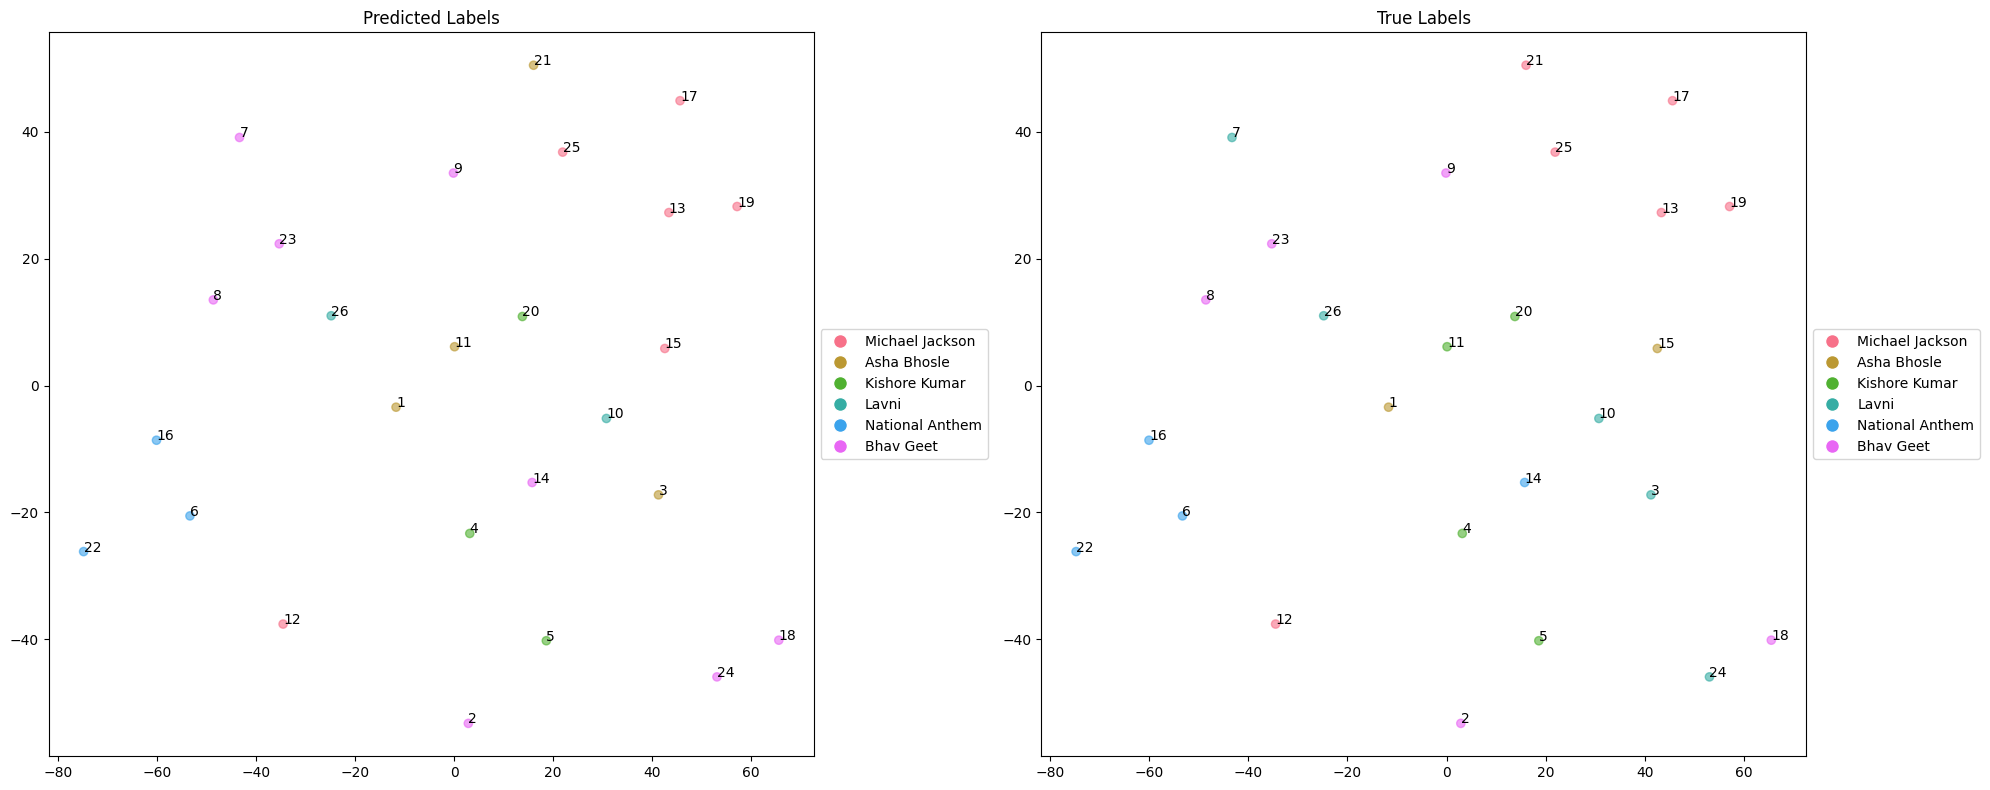

 20%|██        | 1/5 [00:02<00:08,  2.03s/it]


Training Gradient Boosting...

Cross-validation scores: [0.72727273 0.63636364 0.63636364 0.61904762 0.61904762]
Average CV score: 0.6476
Test set accuracy: 0.5385

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.00      0.00      0.00         2
           2       1.00      0.75      0.86         4
           3       1.00      0.20      0.33         5
           4       0.50      0.75      0.60         4
           5       0.40      0.40      0.40         5

    accuracy                           0.54        26
   macro avg       0.60      0.49      0.49        26
weighted avg       0.66      0.54      0.54        26



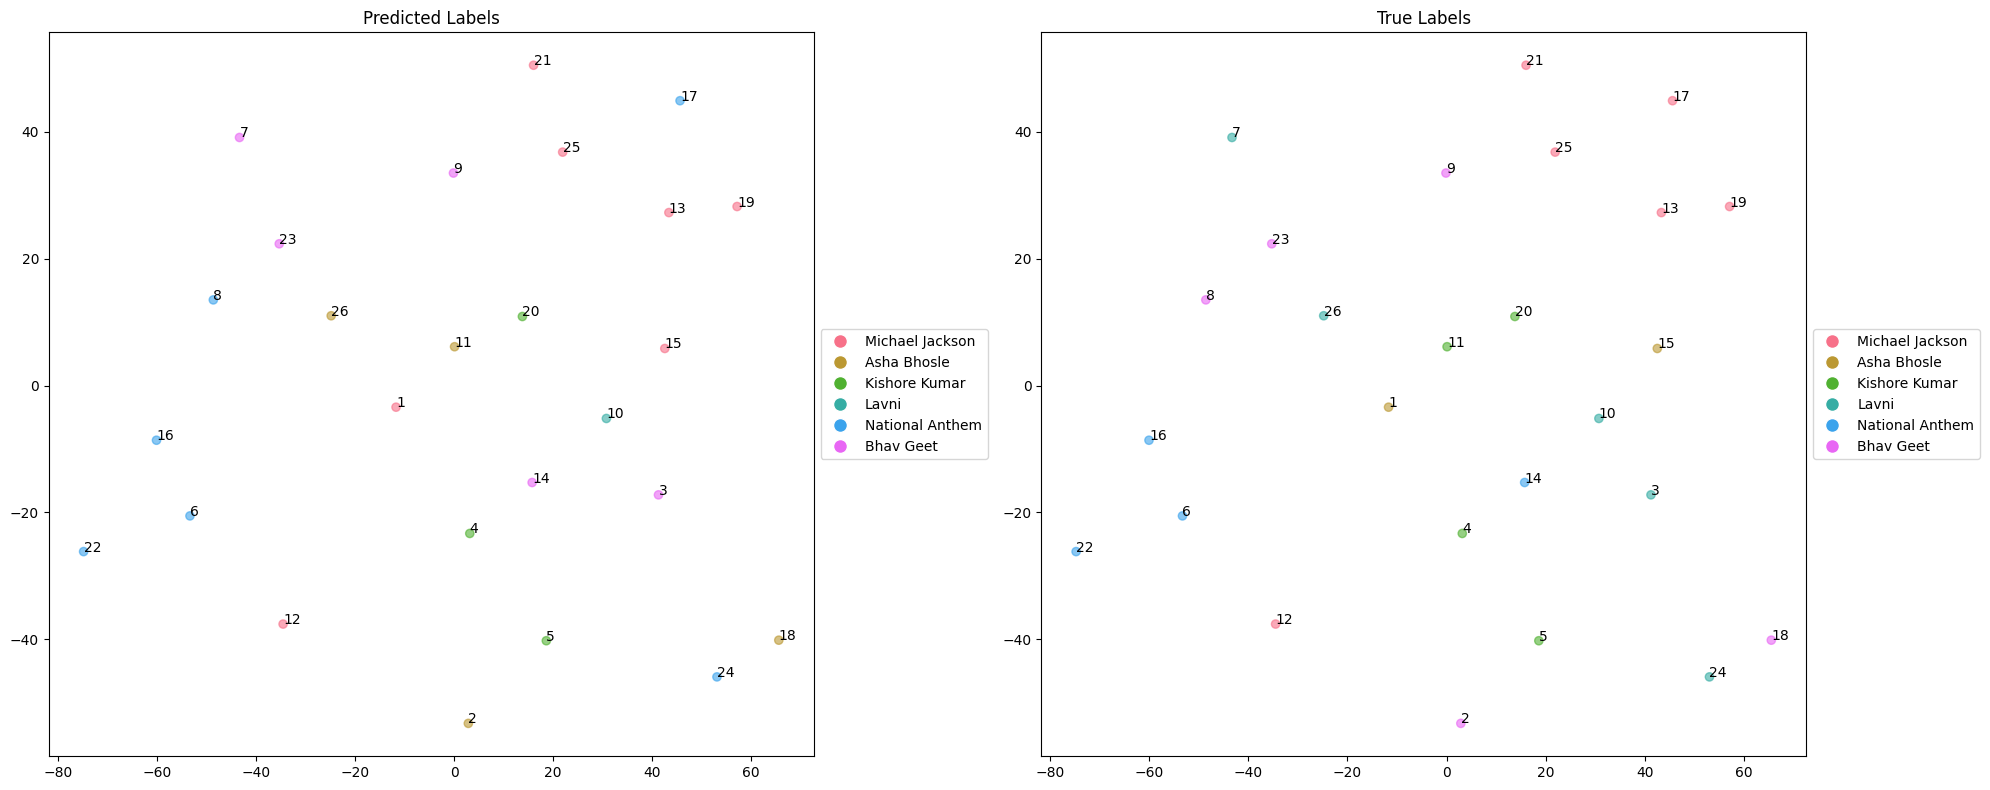

 40%|████      | 2/5 [00:13<00:22,  7.61s/it]


Training SVM...

Cross-validation scores: [0.90909091 0.86363636 0.59090909 0.71428571 0.61904762]
Average CV score: 0.7394
Test set accuracy: 0.6538

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.17      0.50      0.25         2
           2       0.75      0.75      0.75         4
           3       0.50      0.20      0.29         5
           4       1.00      0.75      0.86         4
           5       0.60      0.60      0.60         5

    accuracy                           0.65        26
   macro avg       0.67      0.63      0.62        26
weighted avg       0.72      0.65      0.67        26



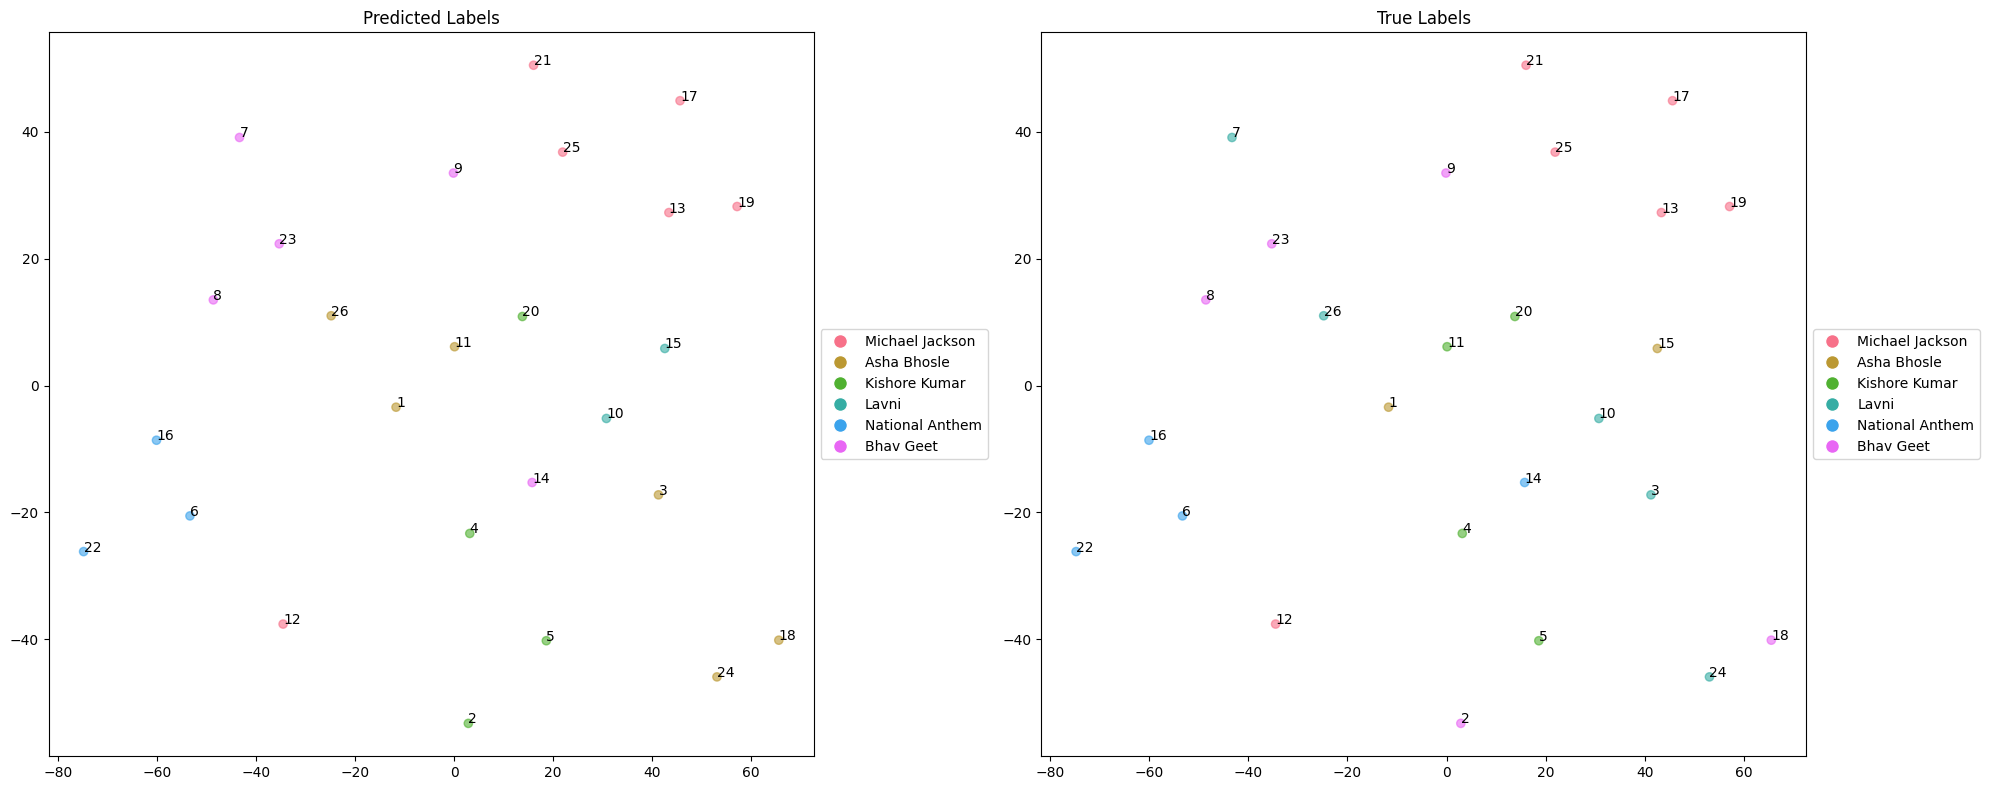

 60%|██████    | 3/5 [00:14<00:09,  4.59s/it]


Training LogisticRegression...

Cross-validation scores: [0.86363636 0.72727273 0.59090909 0.71428571 0.61904762]
Average CV score: 0.7030
Test set accuracy: 0.6154

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         2
           2       0.75      0.75      0.75         4
           3       0.33      0.20      0.25         5
           4       1.00      0.75      0.86         4
           5       0.50      0.60      0.55         5

    accuracy                           0.62        26
   macro avg       0.57      0.55      0.55        26
weighted avg       0.63      0.62      0.61        26



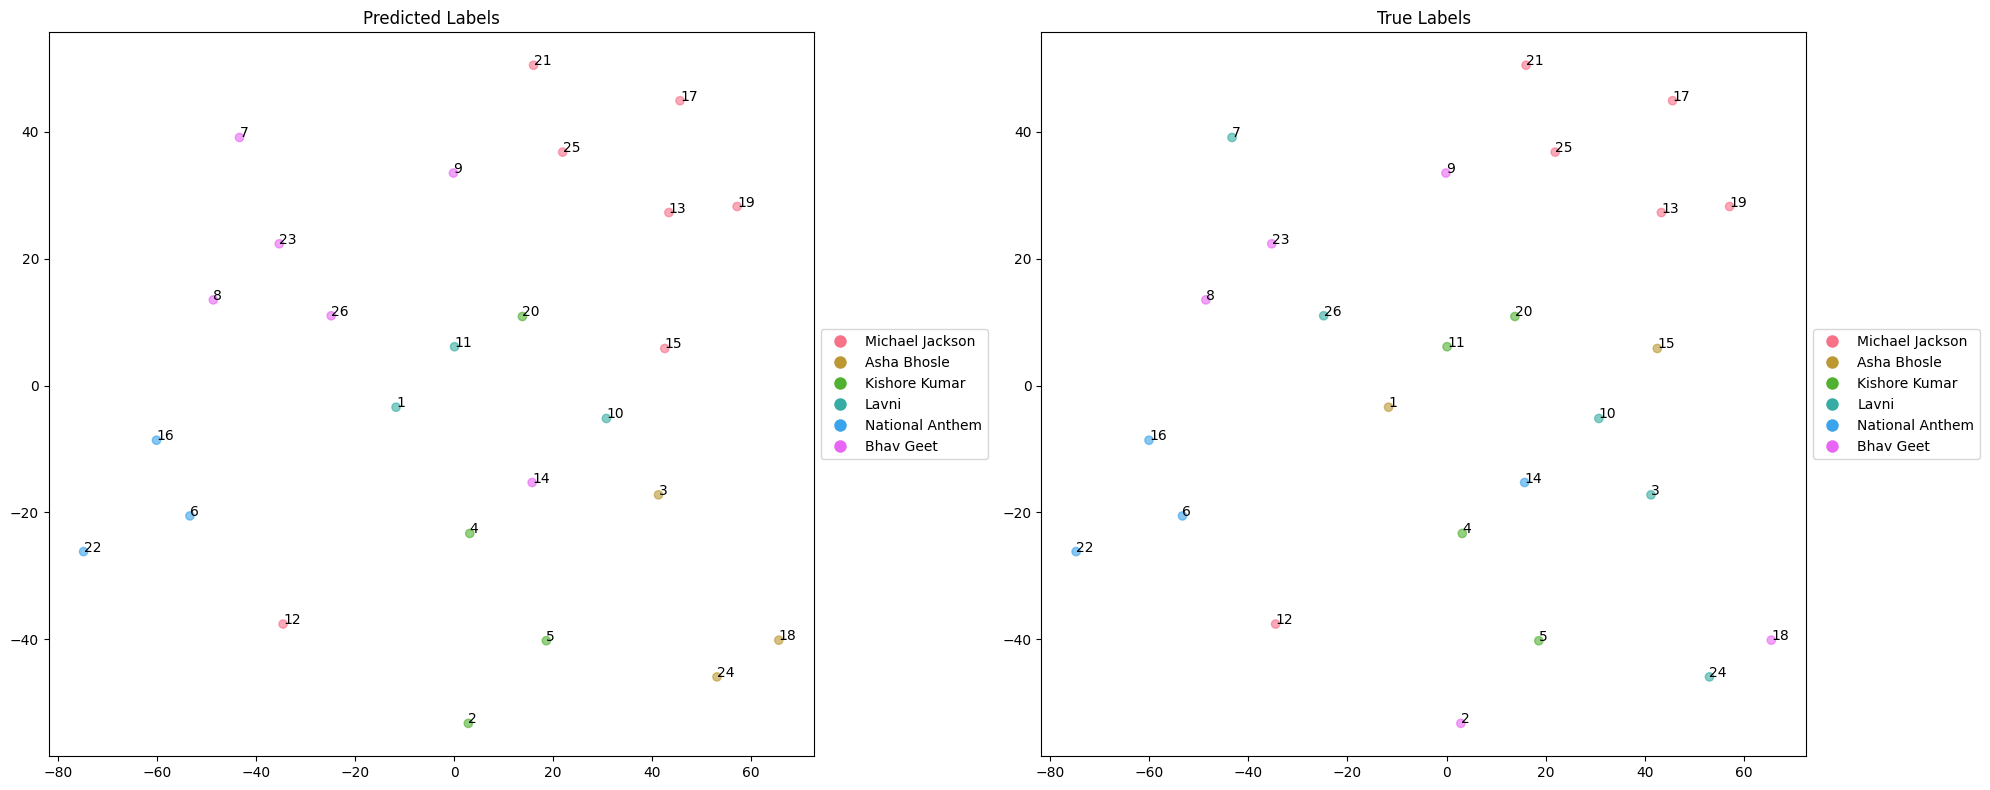

 80%|████████  | 4/5 [00:15<00:03,  3.20s/it]


Training KNN...

Cross-validation scores: [0.86363636 0.72727273 0.63636364 0.71428571 0.57142857]
Average CV score: 0.7026
Test set accuracy: 0.6538

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.00      0.00      0.00         2
           2       0.75      0.75      0.75         4
           3       0.67      0.40      0.50         5
           4       1.00      0.75      0.86         4
           5       0.75      0.60      0.67         5

    accuracy                           0.65        26
   macro avg       0.65      0.58      0.61        26
weighted avg       0.71      0.65      0.67        26



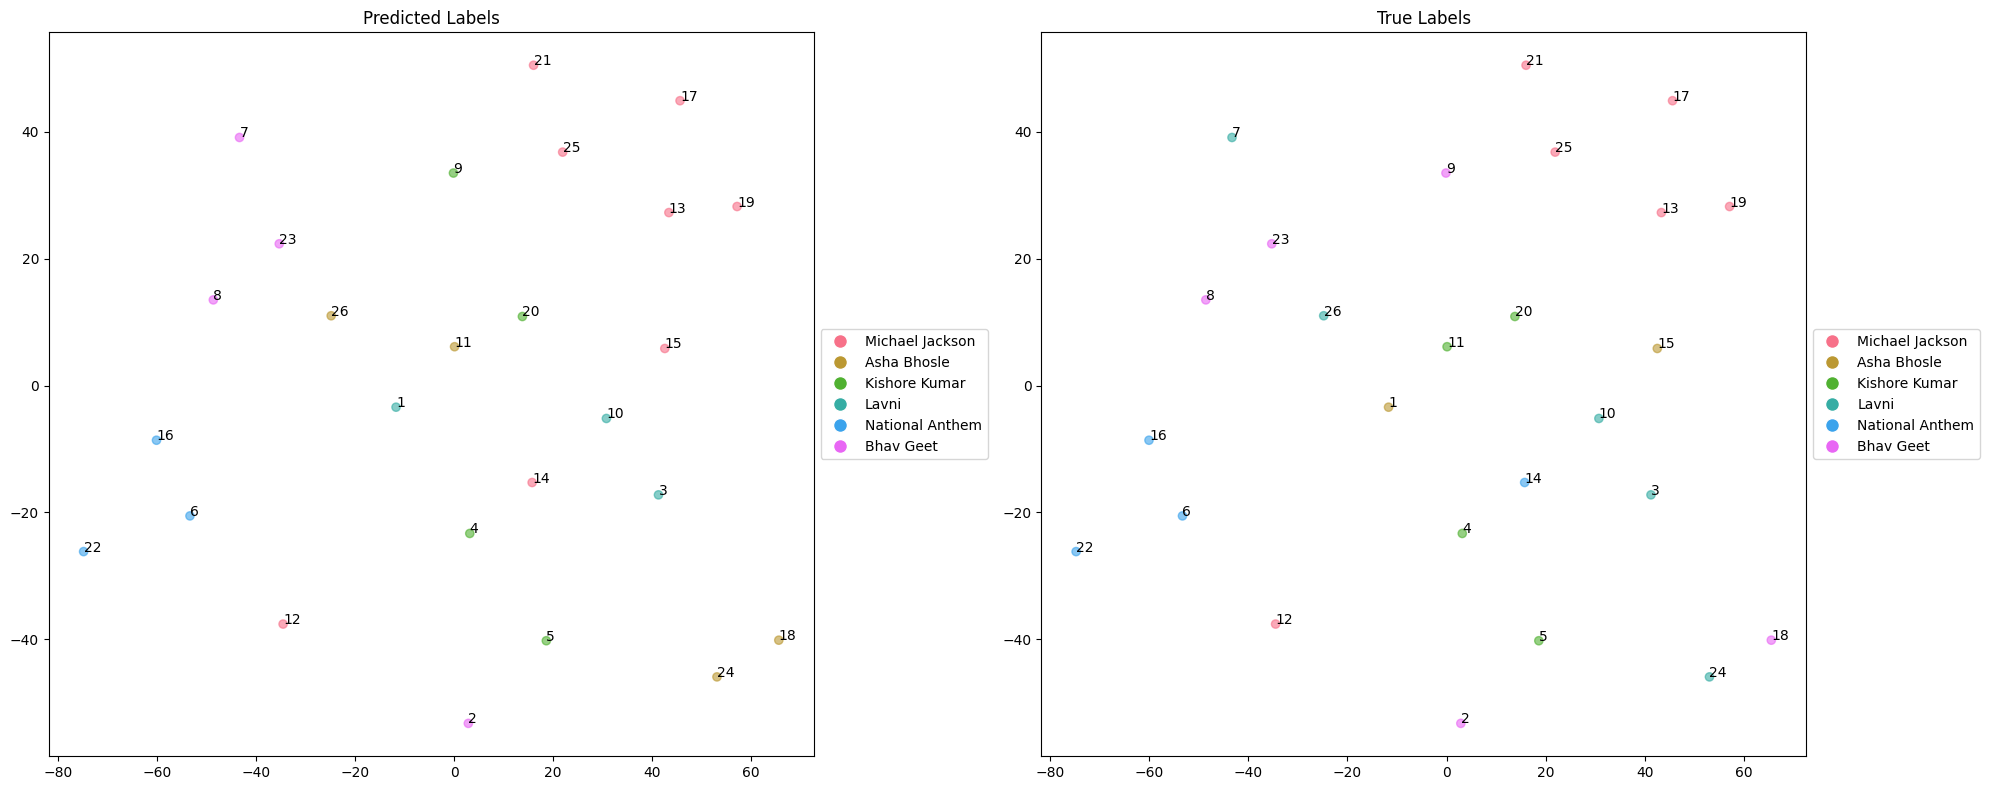

100%|██████████| 5/5 [00:17<00:00,  3.41s/it]



 Loading Files to be Predicted


100%|██████████| 116/116 [00:11<00:00,  9.73it/s]



Making predictions on new files...

Random Forest:


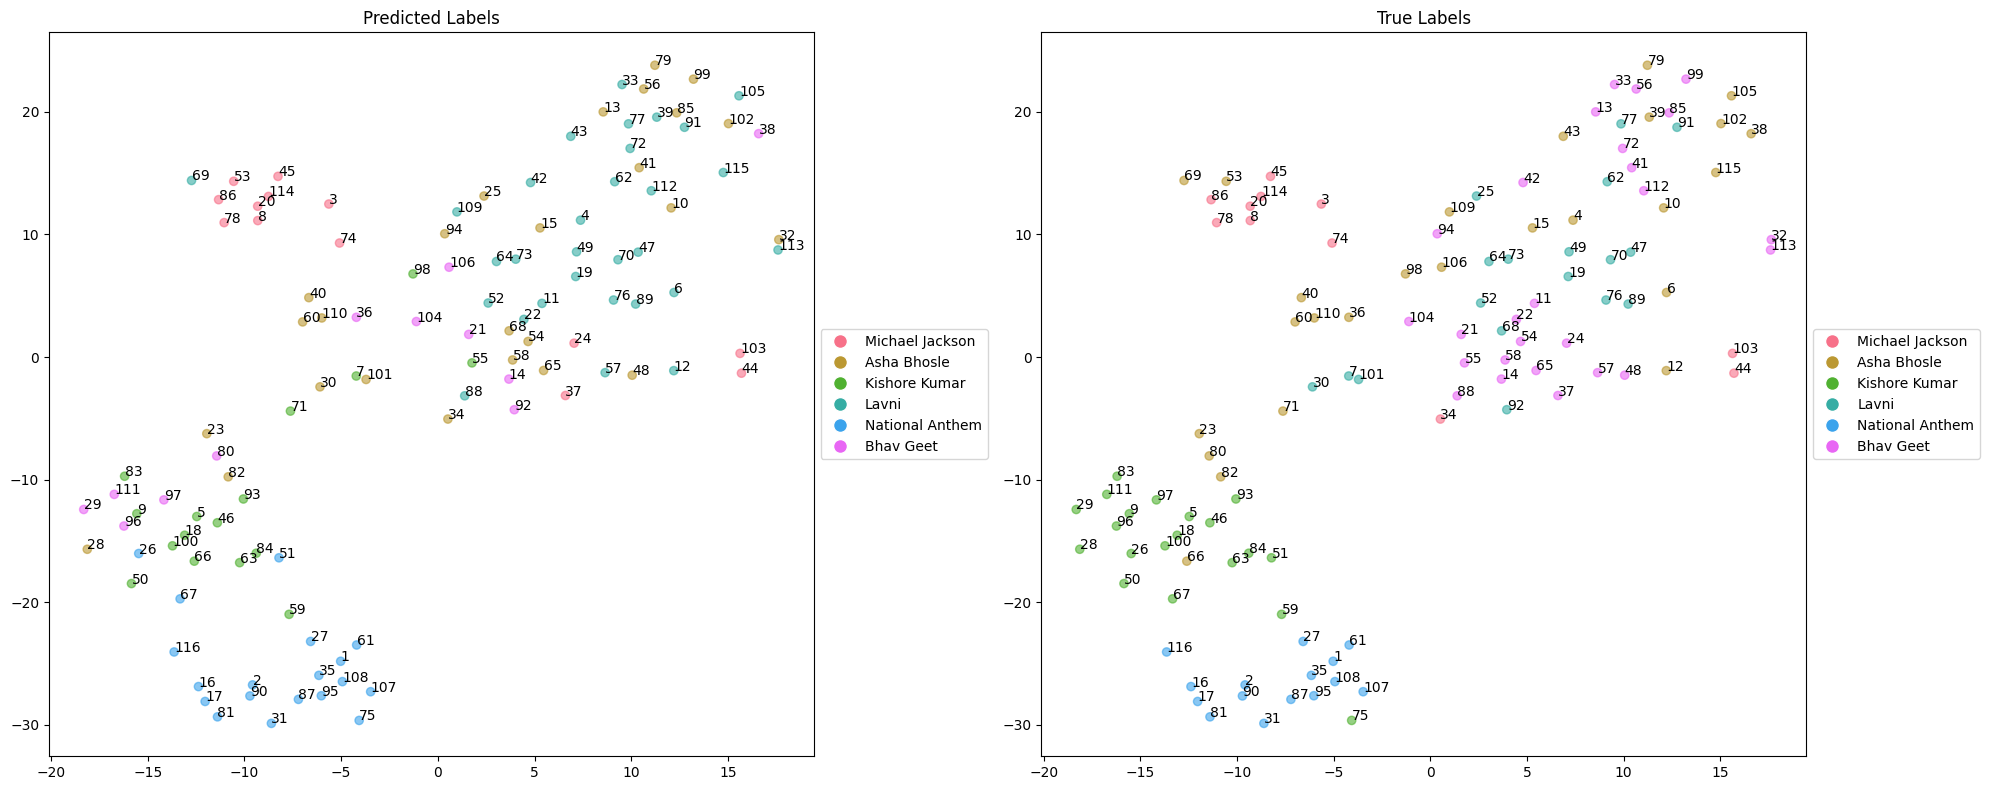

Overall Accuracy: 0.5172

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       0.77      0.91      0.83        11
    Asha Bhosle       0.35      0.35      0.35        26
  Kishore Kumar       0.69      0.55      0.61        20
          Lavni       0.40      0.67      0.50        18
National Anthem       0.79      1.00      0.88        15
      Bhav Geet       0.25      0.12      0.16        26

       accuracy                           0.52       116
      macro avg       0.54      0.60      0.56       116
   weighted avg       0.49      0.52      0.49       116



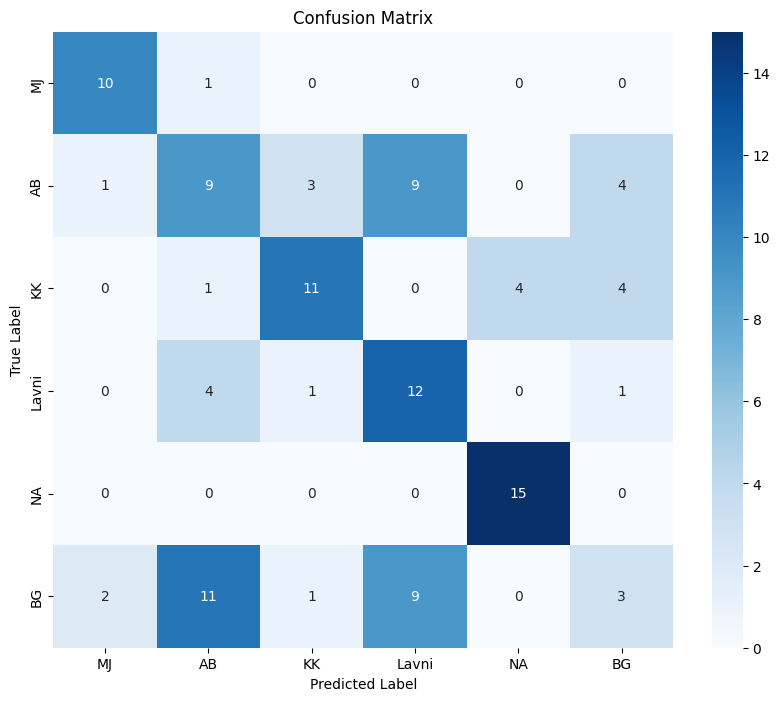


Gradient Boosting:


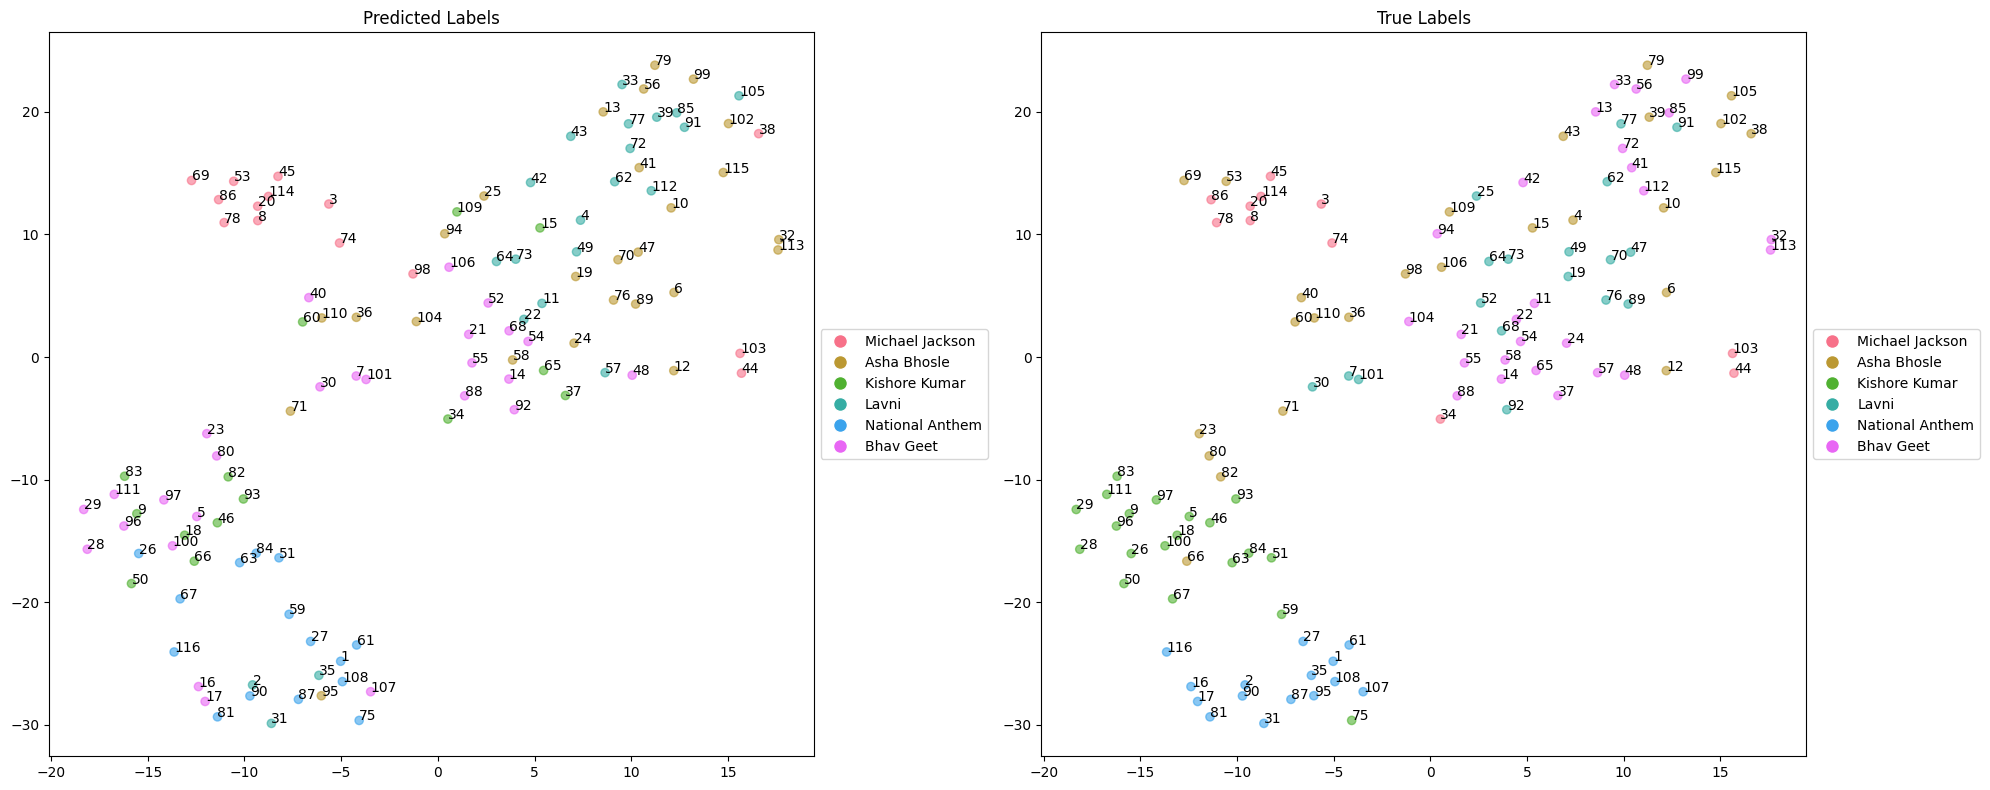

Overall Accuracy: 0.3879

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       0.71      0.91      0.80        11
    Asha Bhosle       0.35      0.35      0.35        26
  Kishore Kumar       0.43      0.30      0.35        20
          Lavni       0.29      0.33      0.31        18
National Anthem       0.53      0.53      0.53        15
      Bhav Geet       0.23      0.23      0.23        26

       accuracy                           0.39       116
      macro avg       0.42      0.44      0.43       116
   weighted avg       0.38      0.39      0.38       116



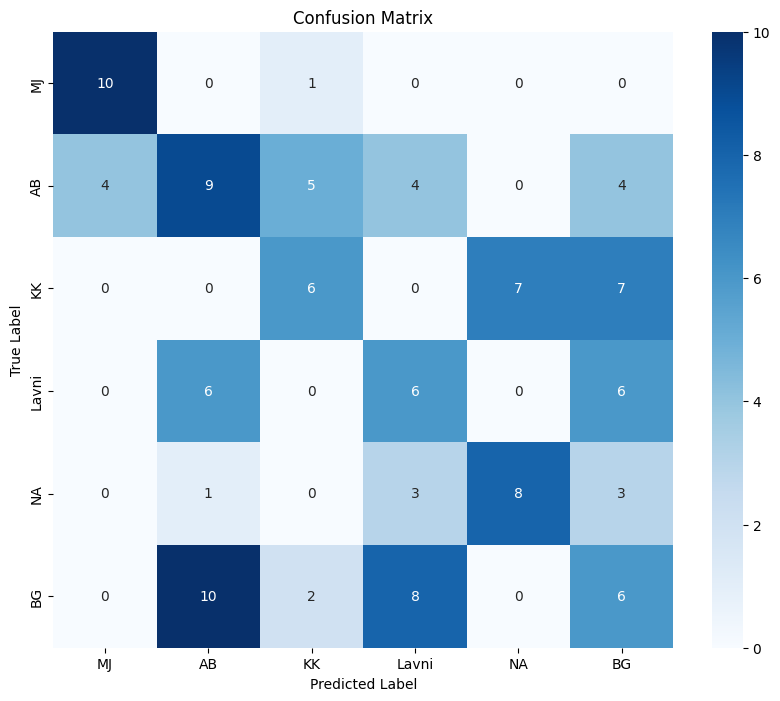


SVM:


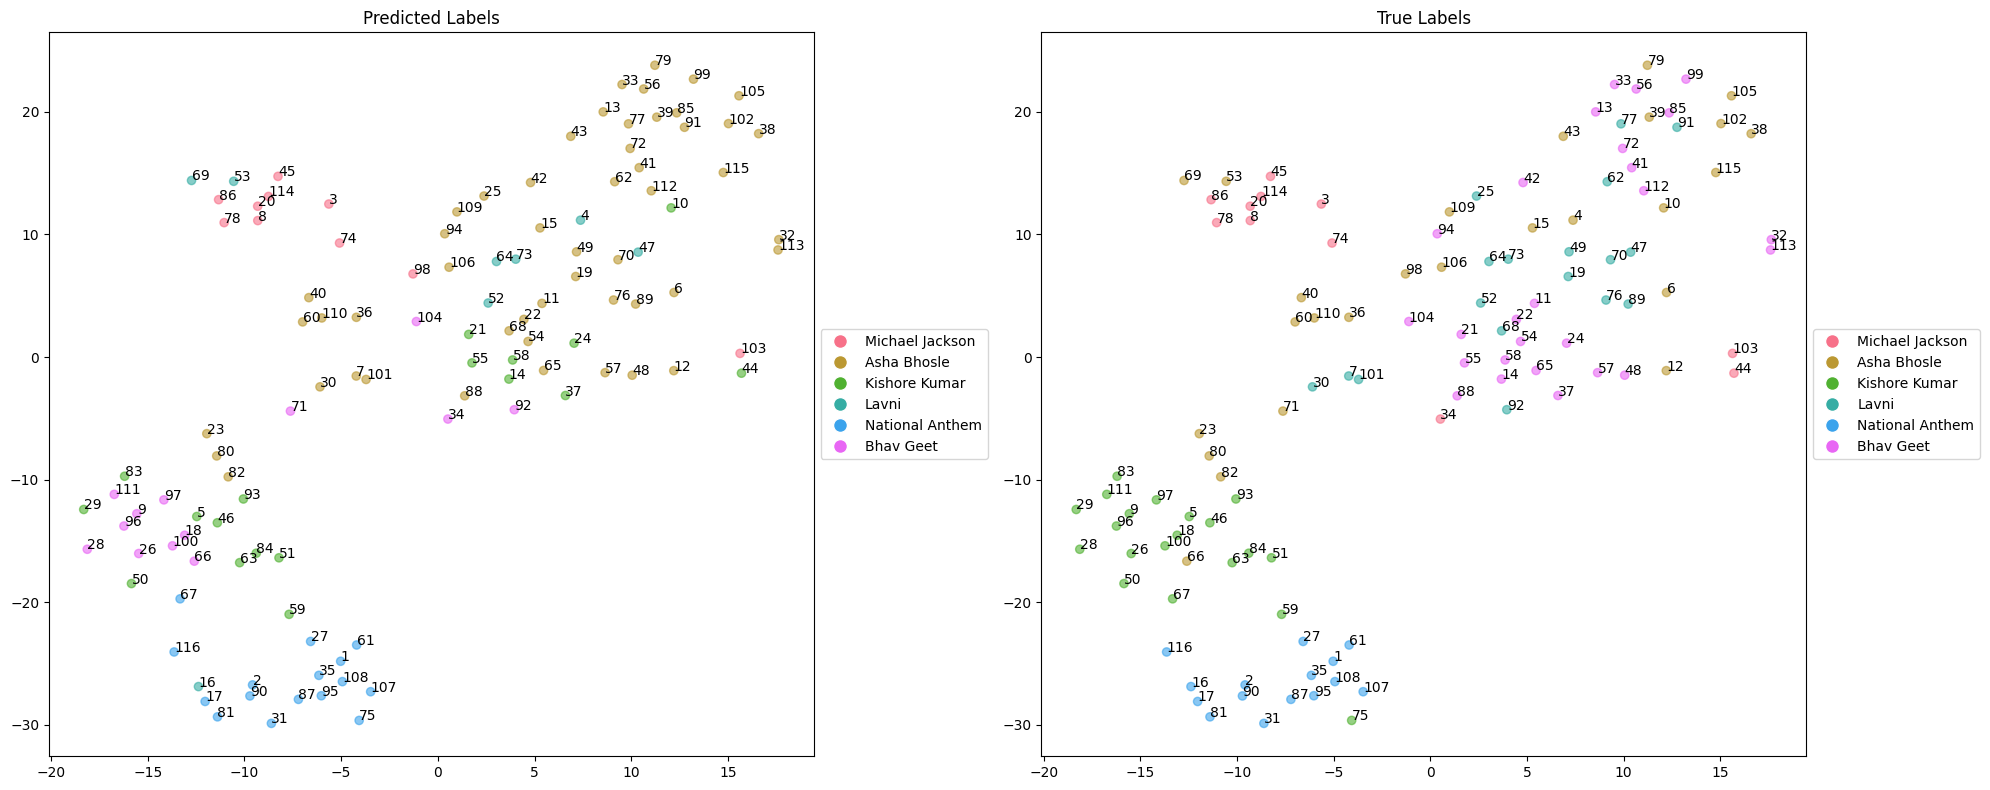

Overall Accuracy: 0.4914

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       0.90      0.82      0.86        11
    Asha Bhosle       0.37      0.73      0.49        26
  Kishore Kumar       0.56      0.50      0.53        20
          Lavni       0.50      0.22      0.31        18
National Anthem       0.88      0.93      0.90        15
      Bhav Geet       0.08      0.04      0.05        26

       accuracy                           0.49       116
      macro avg       0.55      0.54      0.52       116
   weighted avg       0.47      0.49      0.46       116



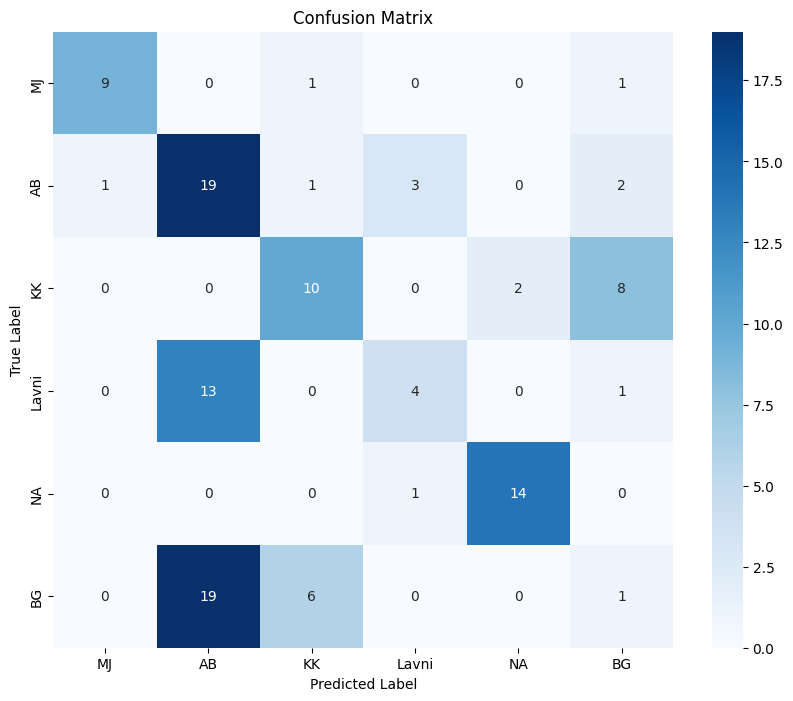


LogisticRegression:


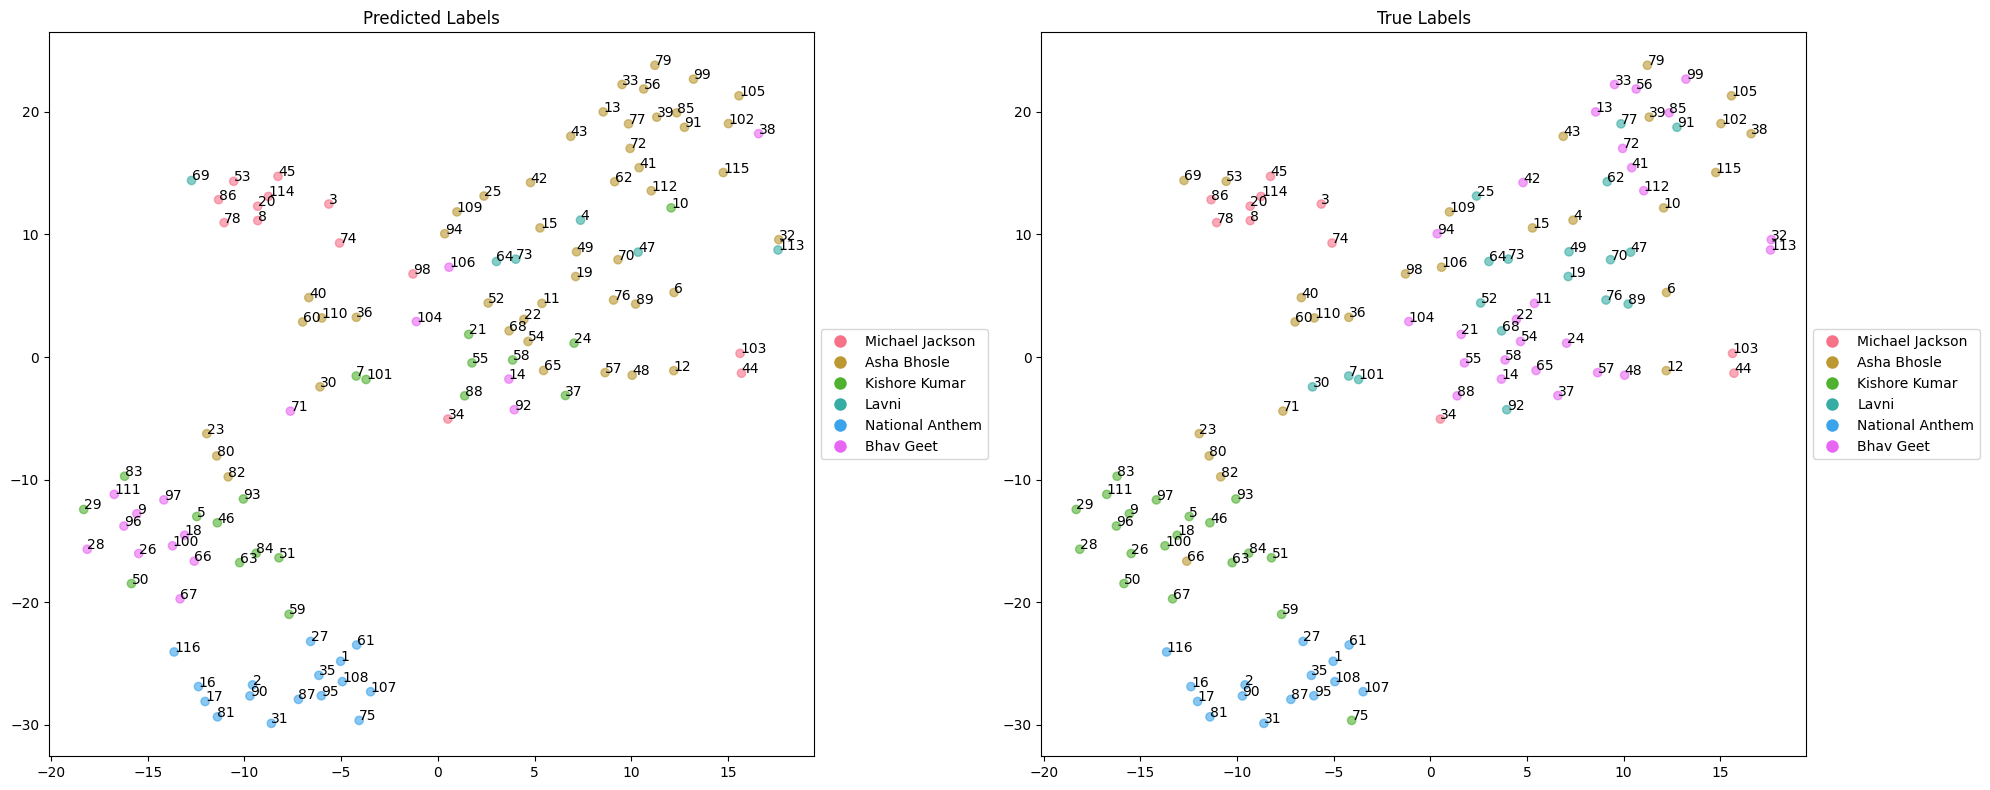

Overall Accuracy: 0.5000

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       0.85      1.00      0.92        11
    Asha Bhosle       0.37      0.65      0.47        26
  Kishore Kumar       0.53      0.50      0.51        20
          Lavni       0.50      0.17      0.25        18
National Anthem       0.94      1.00      0.97        15
      Bhav Geet       0.12      0.08      0.10        26

       accuracy                           0.50       116
      macro avg       0.55      0.57      0.54       116
   weighted avg       0.48      0.50      0.47       116



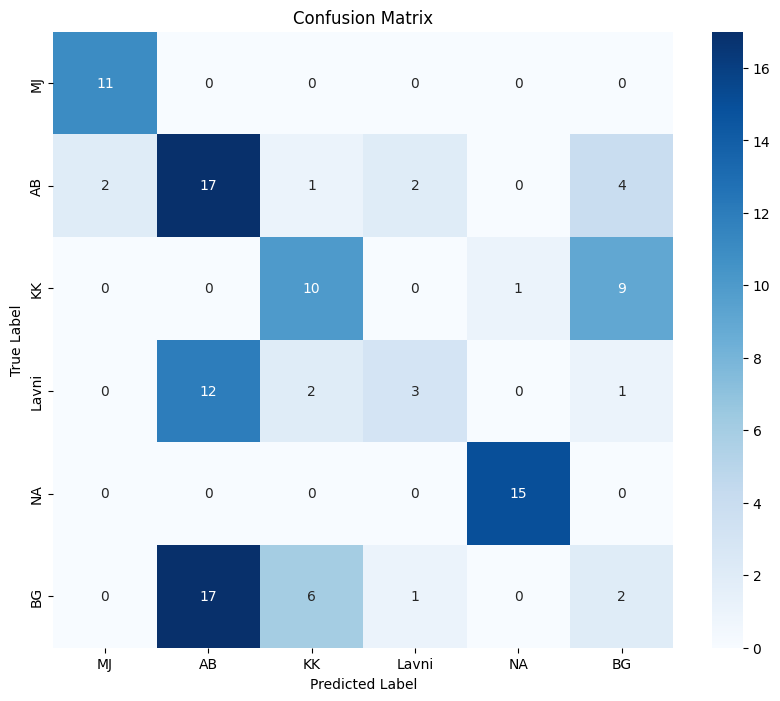


KNN:


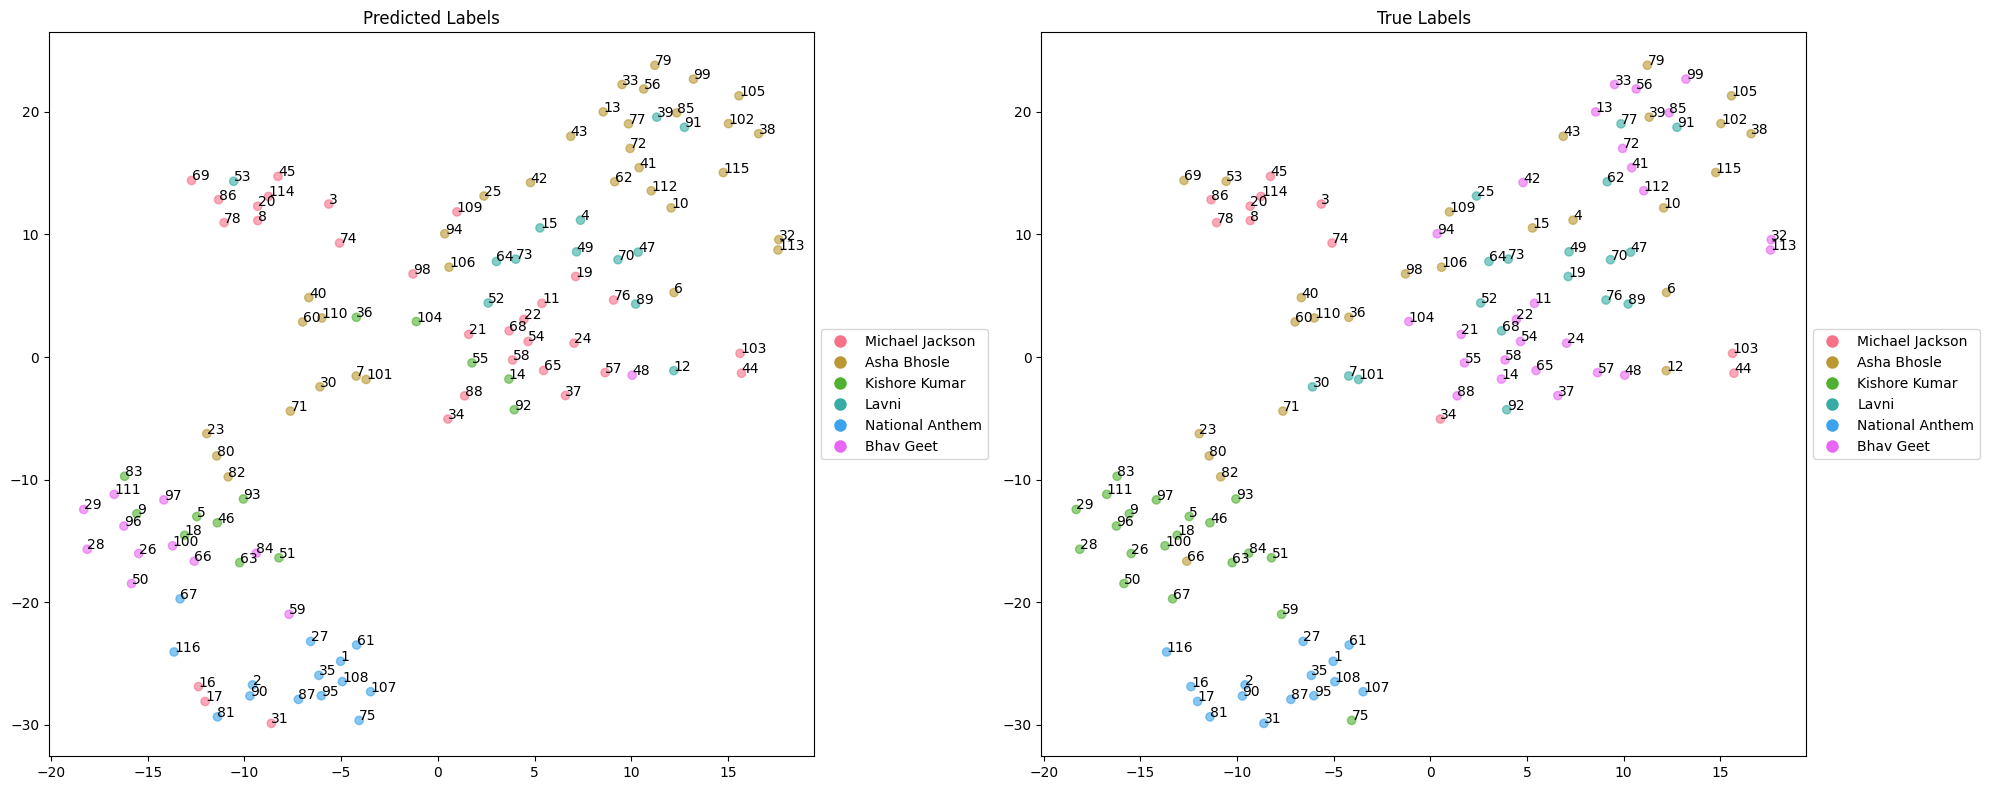

Overall Accuracy: 0.4828

Classification Report:
                 precision    recall  f1-score   support

Michael Jackson       0.37      1.00      0.54        11
    Asha Bhosle       0.47      0.62      0.53        26
  Kishore Kumar       0.62      0.40      0.48        20
          Lavni       0.62      0.44      0.52        18
National Anthem       0.86      0.80      0.83        15
      Bhav Geet       0.08      0.04      0.05        26

       accuracy                           0.48       116
      macro avg       0.50      0.55      0.49       116
   weighted avg       0.47      0.48      0.45       116



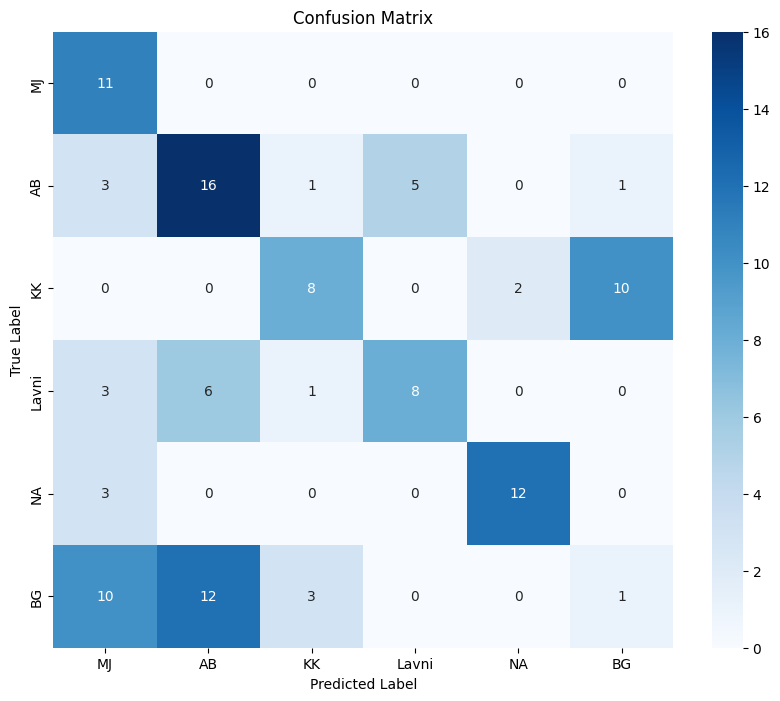

In [41]:
# Main execution function
def main(metadata_csv, prediction_folder):
    """
    Main execution function
    """
    print("Loading and processing training data...")
    X, y = prepare_training_data(metadata_csv)

    print("\nTraining and evaluating models...")
    fitted_models, pca = train_and_evaluate_models(X, y)

    # print(f"\nBest model: {best_model_name}")
    print("\n Loading Files to be Predicted")
    X_pred, mfcc_files = load_predicting_files(prediction_folder)

    print("\nMaking predictions on new files...")
    pred_dict = {}
    for n, (name, model, scaler) in fitted_models.items():
        print(f"\n{name}:")
        predictions = predict_new_files(model, scaler, pca, X_pred, mfcc_files)

        # # Save predictions to CSV
        predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=['predicted_category'])
        predictions_df.index.name = 'file_name'
        # predictions_df.to_csv('predictions.csv')

        predicted_labels = predictions_df['predicted_category'].values

        # For evaluation
        evaluate_predictions(true_labels, predicted_labels)
        pred_dict[name] = predictions_df

    return pred_dict


# Usage example:
if __name__ == "__main__":
    metadata_csv = "DS203-Project/songs/songs_summary.csv"  # CSV with training data paths and labels
    prediction_folder = "DS203-Project/MFCC-files-v2"  # Folder containing files to predict
    predictions = main(metadata_csv, prediction_folder)
